# <center style='background-color:navy'>LuxeDrive Insurance: Customer Lifetime Value Regression </center>
---
<center>Muhammad Difagama Ivanka</center>

# 1. Business Background

## Problems

Customer Lifetime Value Optimization for Luxury Vehicle Insurance

At LuxeDrive Insurance, we specialize in providing premium car insurance tailored to the unique needs of luxury car, luxury SUV, and sports car owners. In the high-end vehicle insurance market, accurately predicting Customer Lifetime Value (CLV) is essential for driving profitable growth and delivering exceptional customer experiences. However, the distinct characteristics and usage patterns of luxury vehicles pose a significant challenge in predicting CLV with precision. This hampers our ability to effectively allocate marketing resources, design personalized insurance products, and implement targeted retention strategies.

According to industry research, luxury vehicle owners exhibit different driving behaviors and maintenance patterns compared to ordinary car owners. For instance, they tend to invest more in vehicle upkeep and safety features, which can influence insurance claims and overall risk profiles. Additionally, luxury vehicles often have higher repair costs, which affects claim frequency and severity.

Furthermore, we focuses on enhancing the accuracy of CLV predictions specifically for luxury car, luxury SUV, and sports car segments, where the CLV threshold is set at $20,000 and below. These vehicle types represent high-value customers with substantial revenue potential, but also come with unique risk profiles. By refining our CLV prediction models to better capture the nuances of these luxury vehicle types, LuxeDrive Insurance can strategically prioritize high-value customers, optimize pricing, and tailor marketing efforts. This targeted approach will not only increase customer satisfaction and loyalty but also drive profitability by ensuring that resources are aligned with our most lucrative customer segments.

## Goals

- **Enhance CLV Prediction Accuracy:**
  - Develop and refine predictive models to accurately estimate the Customer Lifetime Value (CLV) especially for customer that own luxury car, luxury SUV, and sports car segments.
  
- **Segment-Specific Strategies:**
  - Tailor marketing, retention, and pricing strategies specifically for luxury car, luxury SUV, and sports car owners based on the refined CLV predictions.
  
- **Improve Customer Acquisition and Retention:**
  - Identify and prioritize high-value customers within the luxury vehicle segments to optimize acquisition and retention efforts.
  
- **Personalize Insurance Products:**
  - Design and offer personalized insurance products that cater to the unique needs and risk profiles of luxury car, luxury SUV, and sports car owners.
  
- **Optimize Resource Allocation:**
  - Efficiently allocate marketing and operational resources towards the most profitable customer segments to maximize ROI.
  
- **Increase Customer Satisfaction and Loyalty:**
  - Enhance customer satisfaction by providing tailored services and products, leading to improved customer loyalty and long-term relationships.
  
- **Boost Profitability:**
  - Drive profitability by aligning business strategies with high-value customer segments, ensuring a balanced approach to risk and revenue.

## Limitations

- Only customer that have Customer Lifetime Value less than $20,000 will be included.

- There is no feature to show the number of transaction of each Customer.

- There is no feature of Cost Acquisition for each Customer.

# 2. Data Understanding

| Feature Name | Description | Type | Role |
| --- | --- | --- | --- |
Customer Lifetime Value (CLV) | Total revenue expected from a customer insurance (USD) | Numeric | Target variable
Number of Policies | Number of insurance policies held by the customer | Numeric | Feature
Monthly Premium Auto | Monthly premium amount paid for auto insurance | Numeric	| Feature
Total Claim Amount | Total amount claimed over the insurance period (USD) | Numeric	| Feature
Income | Annual income of the customer (USD) | Numeric | Feature
Vehicle Class | Type of the customer's vehicle <br>(Two-Door Car, Four-Door Car SUV, Luxury SUV, <br>Sports Car, or Luxury Car) | Categorical | Feature
Coverage | Type of coverage (e.g., Basic, Extended, Premium) | Categorical | Feature
Renew Offer Type | Type of renewal offer made to the customer <br>(Offer 1, Offer 2, Offer 3 and Offer 4) | Categorical	| Feature
EmploymentStatus | Employment status of the customer <br>(Employed, Unemployed, Medical Leave, Disabled, or Retired) | Categorical	| Feature
Marital Status | Marital status of the customer (Married, Divorced, or Single) | Categorical | Feature
Education | Highest level of education attained by the customer <br>(High School or Below, Bachelor, College, Master, or Doctor) | Categorical | Feature

[Source Data](https://rpubs.com/adindaherawati/classificationproject)

## Import Packages

In [19]:
# libraries
RANDOM_STATE = 233

# basic analysis & viz
import numpy as np
np.random.seed(RANDOM_STATE)

import pandas as pd
import seaborn as sns
import missingno as msn
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.style.use('ggplot')
sns.set_style('darkgrid', {'grid.background': 'blue'})

# statistics
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor

# from sklearn.datasets import load_boston
# from fairlearn.datasets import fetch_boston

# split & metrics
from sklearn.model_selection import (
    cross_validate, cross_val_score,
    GridSearchCV, KFold, RandomizedSearchCV, 
    train_test_split, StratifiedKFold 
)
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    mean_absolute_percentage_error, make_scorer,
    root_mean_squared_error, PredictionErrorDisplay
)
from sklearn.metrics._scorer import _SCORERS

# preprocessing
import smogn
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.preprocessing import (
    OneHotEncoder, KBinsDiscretizer, MinMaxScaler,
    OrdinalEncoder, RobustScaler, StandardScaler,
    PolynomialFeatures, 
)
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import RFE, RFECV

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer
from category_encoders import BinaryEncoder

# models
import shap
shap.initjs()

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import (
    LinearRegression, Lasso, Ridge,
    HuberRegressor, TheilSenRegressor,
    QuantileRegressor, RANSACRegressor
)

from sklearn.ensemble import (
    AdaBoostRegressor, GradientBoostingRegressor,
    VotingRegressor, RandomForestRegressor
)
from sklearn.neural_network import MLPRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor

# others
import os
import sys
import time
import pickle
from collections import Counter

from helpers.functions_python import(
    check_nullity_uniqueness,
    show_uniqueness_value,
    plot_distribution_outliers,
    calculate_outliers,
    scatter_numerical_vs_target,
    stripplot_categorical_vs_target
)

import warnings
warnings.filterwarnings('ignore')

## Data Preview

In [20]:
# read the data as dataframe

car_clv_insurance = pd.read_csv('data_customer_lifetime_value.csv')
car_clv_insurance

Vehicle Class  Coverage Renew Offer Type EmploymentStatus  \
0     Four-Door Car  Extended           Offer1          Retired   
1     Four-Door Car     Basic           Offer1         Employed   
2      Two-Door Car     Basic           Offer1          Retired   
3     Four-Door Car   Premium           Offer3         Disabled   
4      Two-Door Car     Basic           Offer3    Medical Leave   
...             ...       ...              ...              ...   
5664  Four-Door Car     Basic           Offer4       Unemployed   
5665  Four-Door Car   Premium           Offer1         Employed   
5666  Four-Door Car     Basic           Offer1         Employed   
5667     Luxury SUV  Extended           Offer2         Employed   
5668     Luxury SUV     Basic           Offer2         Employed   

     Marital Status             Education  Number of Policies  \
0          Divorced  High School or Below                 2.0   
1           Married               College                 6.0   
2           Married                Master                 2.0   
3           Married  High School or Below                 1.0   
4           Married  High School or Below                 1.0   
...             ...                   ...                 ...   
5664         Single  High School or Below                 1.0   
5665       Divorced              Bachelor                 2.0   
5666         Single              Bachelor                 1.0   
5667       Divorced                Master                 7.0   
5668       Divorced               College                 1.0   

      Monthly Premium Auto  Total Claim Amount   Income  \
0                     90.0          571.479602  11828.0   
1                     62.0          114.514440  44762.0   
2                     62.0          257.248789  21514.0   
3                    116.0          556.800000  17913.0   
4                     62.0          355.820799  19030.0   
...                    ...                 ...      ...   
5664                  74.0          532.800000      0.0   
5665                 109.0          523.200000  27778.0   
5666                  62.0           44.780402  84658.0   
5667                 239.0         1294.700423  22705.0   
5668                 199.0          161.615740  60184.0   

      Customer Lifetime Value  
0                10083.486880  
1                 4943.386117  
2                11981.984810  
3                 4550.856045  
4                 2372.155492  
...                       ...  
5664              2442.216651  
5665             12904.943360  
5666              2447.053134  
5667             19160.989940  
5668              7664.219255  

[5669 rows x 11 columns]

In [21]:
# Check data nullity, unique value
    
check_nullity_uniqueness(car_clv_insurance)

feature data_type  null  negative  n_unique  \
0             Vehicle Class    object   0.0     False         6   
1                  Coverage    object   0.0     False         3   
2          Renew Offer Type    object   0.0     False         4   
3          EmploymentStatus    object   0.0     False         5   
4            Marital Status    object   0.0     False         3   
5                 Education    object   0.0     False         5   
6        Number of Policies   float64   0.0     False         9   
7      Monthly Premium Auto   float64   0.0     False       191   
8        Total Claim Amount   float64   0.0     False      3274   
9                    Income   float64   0.0     False      3625   
10  Customer Lifetime Value   float64   0.0     False      5049   

                                        sample_unique  
0   [Four-Door Car, Two-Door Car, SUV, Sports Car,...  
1                          [Extended, Basic, Premium]  
2                    [Offer1, Offer3, Offer2, Offer4]  
3   [Retired, Employed, Disabled, Medical Leave, U...  
4                         [Divorced, Married, Single]  
5   [High School or Below, College, Master, Bachel...  
6       [2.0, 6.0, 1.0, 8.0, 5.0, 3.0, 7.0, 4.0, 9.0]  
7   [90.0, 62.0, 116.0, 107.0, 101.0, 66.0, 65.0, ...  
8   [571.479602, 114.51444, 257.248789, 556.8, 355...  
9   [11828.0, 44762.0, 21514.0, 17913.0, 19030.0, ...  
10  [10083.48688, 4943.386117, 11981.98481, 4550.8...

## Descriptive Statistics

In [6]:
# statistics of numerical features

car_clv_insurance.describe().T

count          mean           std          min  \
Number of Policies       5669.0      2.979361      2.393187     1.000000   
Monthly Premium Auto     5669.0     93.026989     34.551795    61.000000   
Total Claim Amount       5669.0    431.407103    287.558038     0.423310   
Income                   5669.0  37868.188569  30490.490723     0.000000   
Customer Lifetime Value  5669.0   8029.874592   6916.708246  1898.007675   

                                 25%           50%           75%           max  
Number of Policies          1.000000      2.000000      4.000000      9.000000  
Monthly Premium Auto       68.000000     82.000000    109.000000    297.000000  
Total Claim Amount        266.932542    379.200000    549.986128   2759.794354  
Income                      0.000000  34322.000000  62464.000000  99934.000000  
Customer Lifetime Value  3954.344534   5800.188903   9031.214859  83325.381190

> There is no anomaly value for numerical features, like negative value.

In [5]:
# statistics of categorical features

car_clv_insurance.describe(include='O').T

count unique            top  freq
Vehicle Class     5669      6  Four-Door Car  2858
Coverage          5669      3          Basic  3477
Renew Offer Type  5669      4         Offer1  2292
EmploymentStatus  5669      5       Employed  3541
Marital Status    5669      3        Married  3305
Education         5669      5       Bachelor  1703

In [6]:
# categorical uniqueness value

show_uniqueness_value(car_clv_insurance)

Vehicle Class
Four-Door Car    2858
Two-Door Car     1186
SUV              1096
Sports Car        307
Luxury SUV        115
Luxury Car        107
Name: count, dtype: int64

Coverage
Basic       3477
Extended    1704
Premium      488
Name: count, dtype: int64

EmploymentStatus
Employed         3541
Unemployed       1429
Medical Leave     267
Disabled          252
Retired           180
Name: count, dtype: int64

Marital Status
Married     3305
Single      1514
Divorced     850
Name: count, dtype: int64

Education
Bachelor                1703
College                 1660
High School or Below    1620
Master                   460
Doctor                   226
Name: count, dtype: int64

# 3. Data Cleansing

## Duplicated Data

In [22]:
# check the proportion of duplicates value

print(f'duplicated data\t\t: {car_clv_insurance.duplicated().sum()}')
print(f'duplicated data (%)\t: {car_clv_insurance.duplicated().sum() / len(car_clv_insurance) * 100:.2f}%')

duplicated data		: 618
duplicated data (%)	: 10.90%


In [23]:
# remove the duplicates value (5669 rows --> 5051 rows [after removal])

car_clv_insurance = car_clv_insurance.drop_duplicates(ignore_index=True)
car_clv_insurance

Vehicle Class  Coverage Renew Offer Type EmploymentStatus  \
0     Four-Door Car  Extended           Offer1          Retired   
1     Four-Door Car     Basic           Offer1         Employed   
2      Two-Door Car     Basic           Offer1          Retired   
3     Four-Door Car   Premium           Offer3         Disabled   
4      Two-Door Car     Basic           Offer3    Medical Leave   
...             ...       ...              ...              ...   
5046  Four-Door Car     Basic           Offer1         Employed   
5047  Four-Door Car     Basic           Offer4       Unemployed   
5048  Four-Door Car   Premium           Offer1         Employed   
5049  Four-Door Car     Basic           Offer1         Employed   
5050     Luxury SUV     Basic           Offer2         Employed   

     Marital Status             Education  Number of Policies  \
0          Divorced  High School or Below                 2.0   
1           Married               College                 6.0   
2           Married                Master                 2.0   
3           Married  High School or Below                 1.0   
4           Married  High School or Below                 1.0   
...             ...                   ...                 ...   
5046        Married  High School or Below                 2.0   
5047         Single  High School or Below                 1.0   
5048       Divorced              Bachelor                 2.0   
5049         Single              Bachelor                 1.0   
5050       Divorced               College                 1.0   

      Monthly Premium Auto  Total Claim Amount   Income  \
0                     90.0          571.479602  11828.0   
1                     62.0          114.514440  44762.0   
2                     62.0          257.248789  21514.0   
3                    116.0          556.800000  17913.0   
4                     62.0          355.820799  19030.0   
...                    ...                 ...      ...   
5046                  69.0          446.084760  30595.0   
5047                  74.0          532.800000      0.0   
5048                 109.0          523.200000  27778.0   
5049                  62.0           44.780402  84658.0   
5050                 199.0          161.615740  60184.0   

      Customer Lifetime Value  
0                10083.486880  
1                 4943.386117  
2                11981.984810  
3                 4550.856045  
4                 2372.155492  
...                       ...  
5046              8114.409136  
5047              2442.216651  
5048             12904.943360  
5049              2447.053134  
5050              7664.219255  

[5051 rows x 11 columns]

## Missing Values

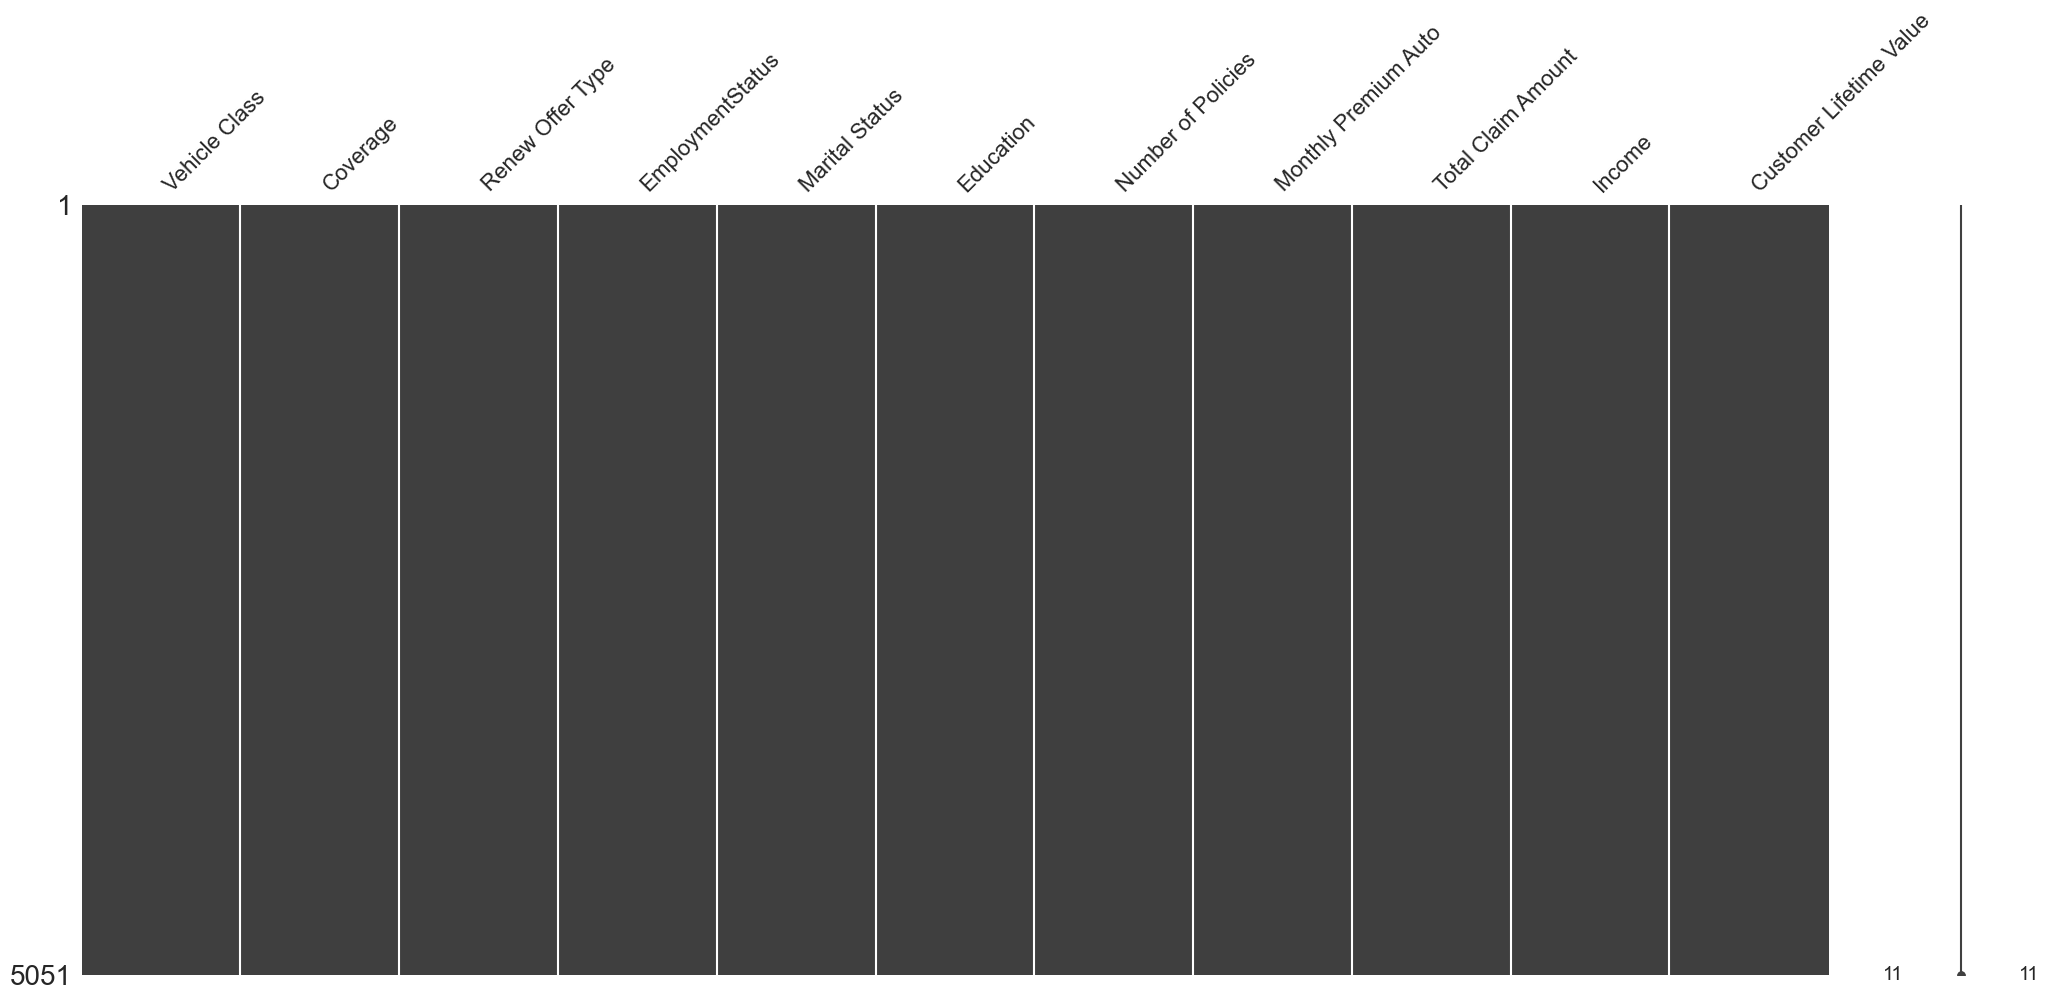

In [10]:
# missing values (NO at ALL)

msn.matrix(car_clv_insurance);

> Clearly no missing values at all, but we should still include it for the preprocess part, which anticipated of occurred values on the real data (unseen data).

## Distribution & Extreme Values (Potential Outliers)

In [11]:
ori_df = car_clv_insurance.copy()

In [20]:
car_clv_insurance = ori_df.copy()

In [21]:
# car_clv_insurance = car_clv_insurance[car_clv_insurance['Monthly Premium Auto'] <= 170.500000]
# car_clv_insurance = car_clv_insurance[car_clv_insurance['Total Claim Amount'] <= 992.643348]

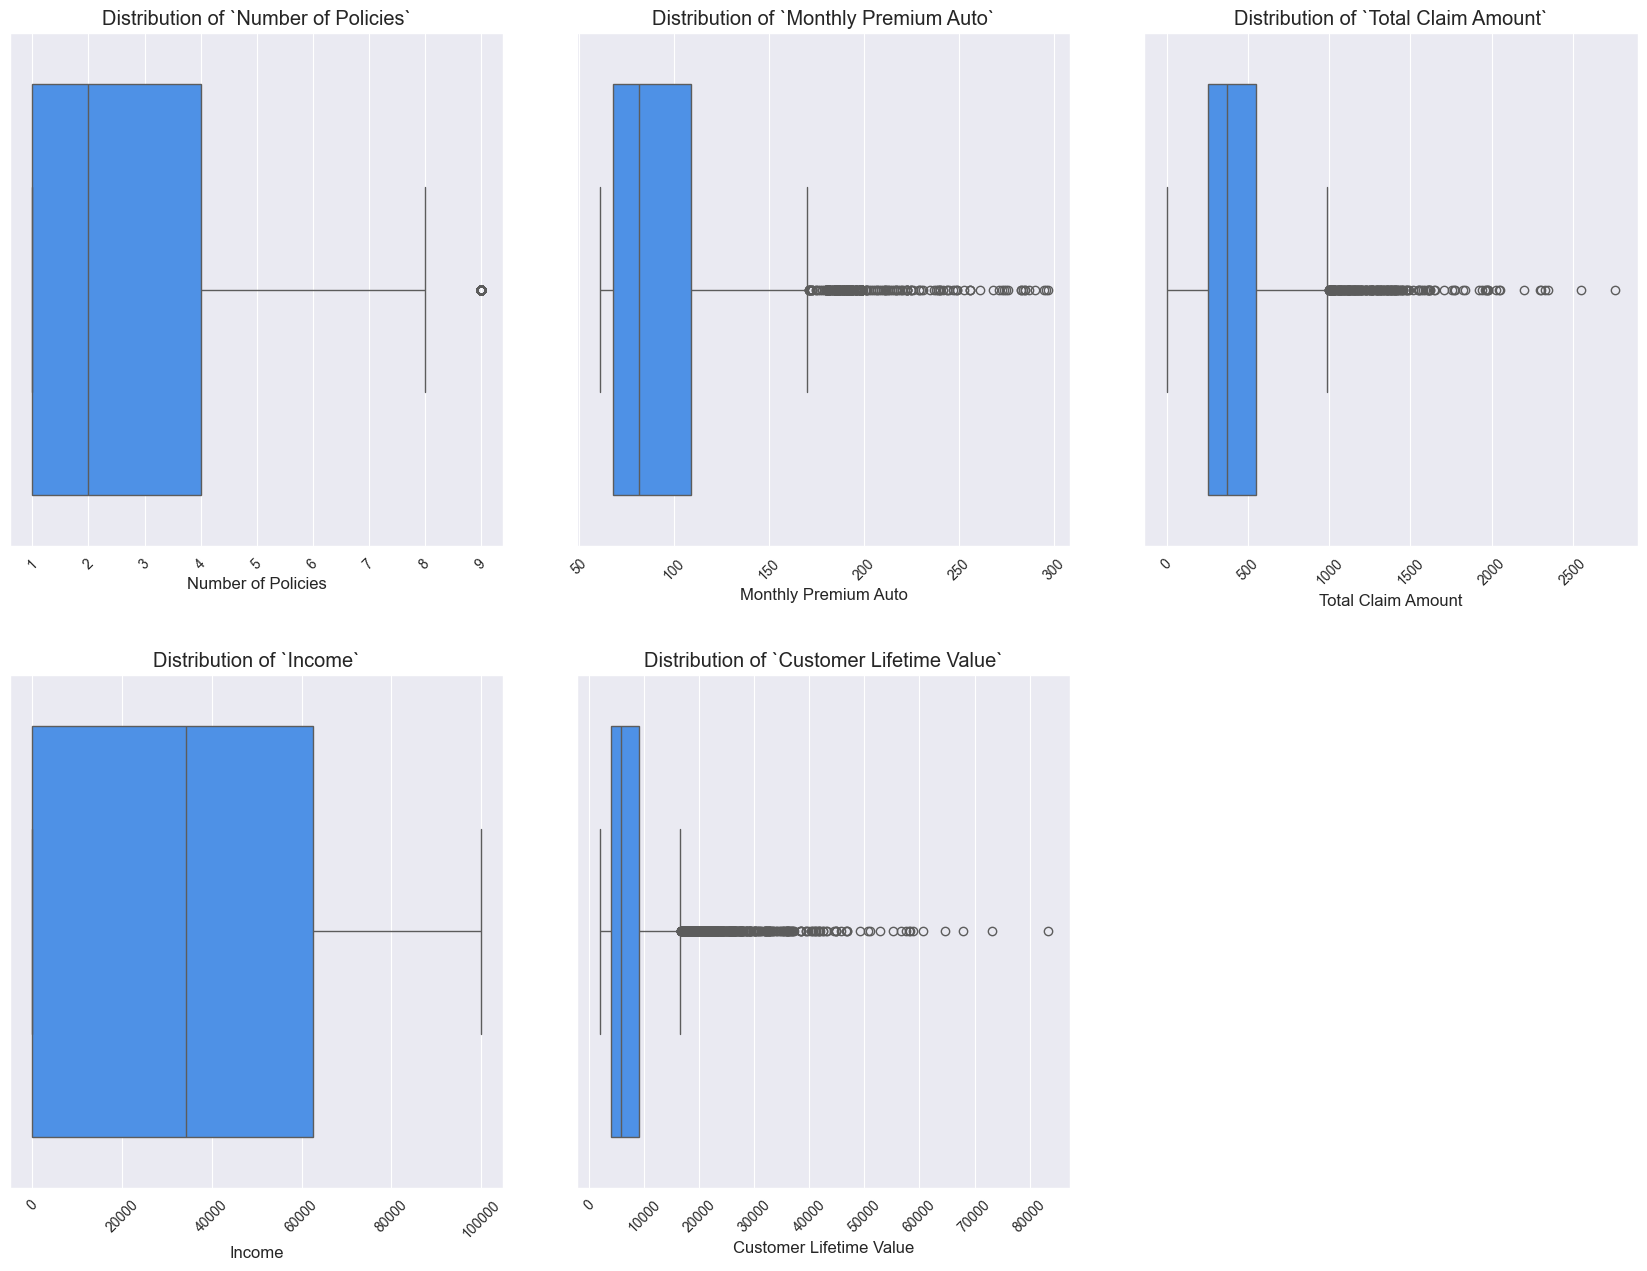

In [24]:
# Potential Outliers on Numerical Features

plot_distribution_outliers(car_clv_insurance)

In [25]:
# statistics about the potential outliers
# (for numerical we certainly keep the lower bound not at negative but Zero <> 0)
numerical_features = [
    'Number of Policies',
    'Monthly Premium Auto',
    'Total Claim Amount',
    'Income',
    'Customer Lifetime Value'
    ]

numerical = numerical_features.copy()

outlier_data = []

for i in numerical:
    outliers_result, lower_bound, upper_bound = calculate_outliers(car_clv_insurance, i)
    total_outlier = len(outliers_result)
    outlier_percentage = round(total_outlier / len(car_clv_insurance[i]) * 100, 2)
    outlier_data.append([i, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_data, columns=[
    'Feature', 'Total Outliers', 'Percentage (%)', 'Lower Bound (IQR)', 'Upper Bound (IQR)'
])

outlier_df

Feature  Total Outliers  Percentage (%)  Lower Bound (IQR)  \
0       Number of Policies             228            4.51          -3.500000   
1     Monthly Premium Auto             252            4.99           6.500000   
2       Total Claim Amount             217            4.30        -192.743922   
3                   Income               0            0.00      -93707.250000   
4  Customer Lifetime Value             449            8.89       -3631.744439   

   Upper Bound (IQR)  
0           8.500000  
1         170.500000  
2         992.643348  
3      156178.750000  
4       16624.750075

### Before Removal Outliers

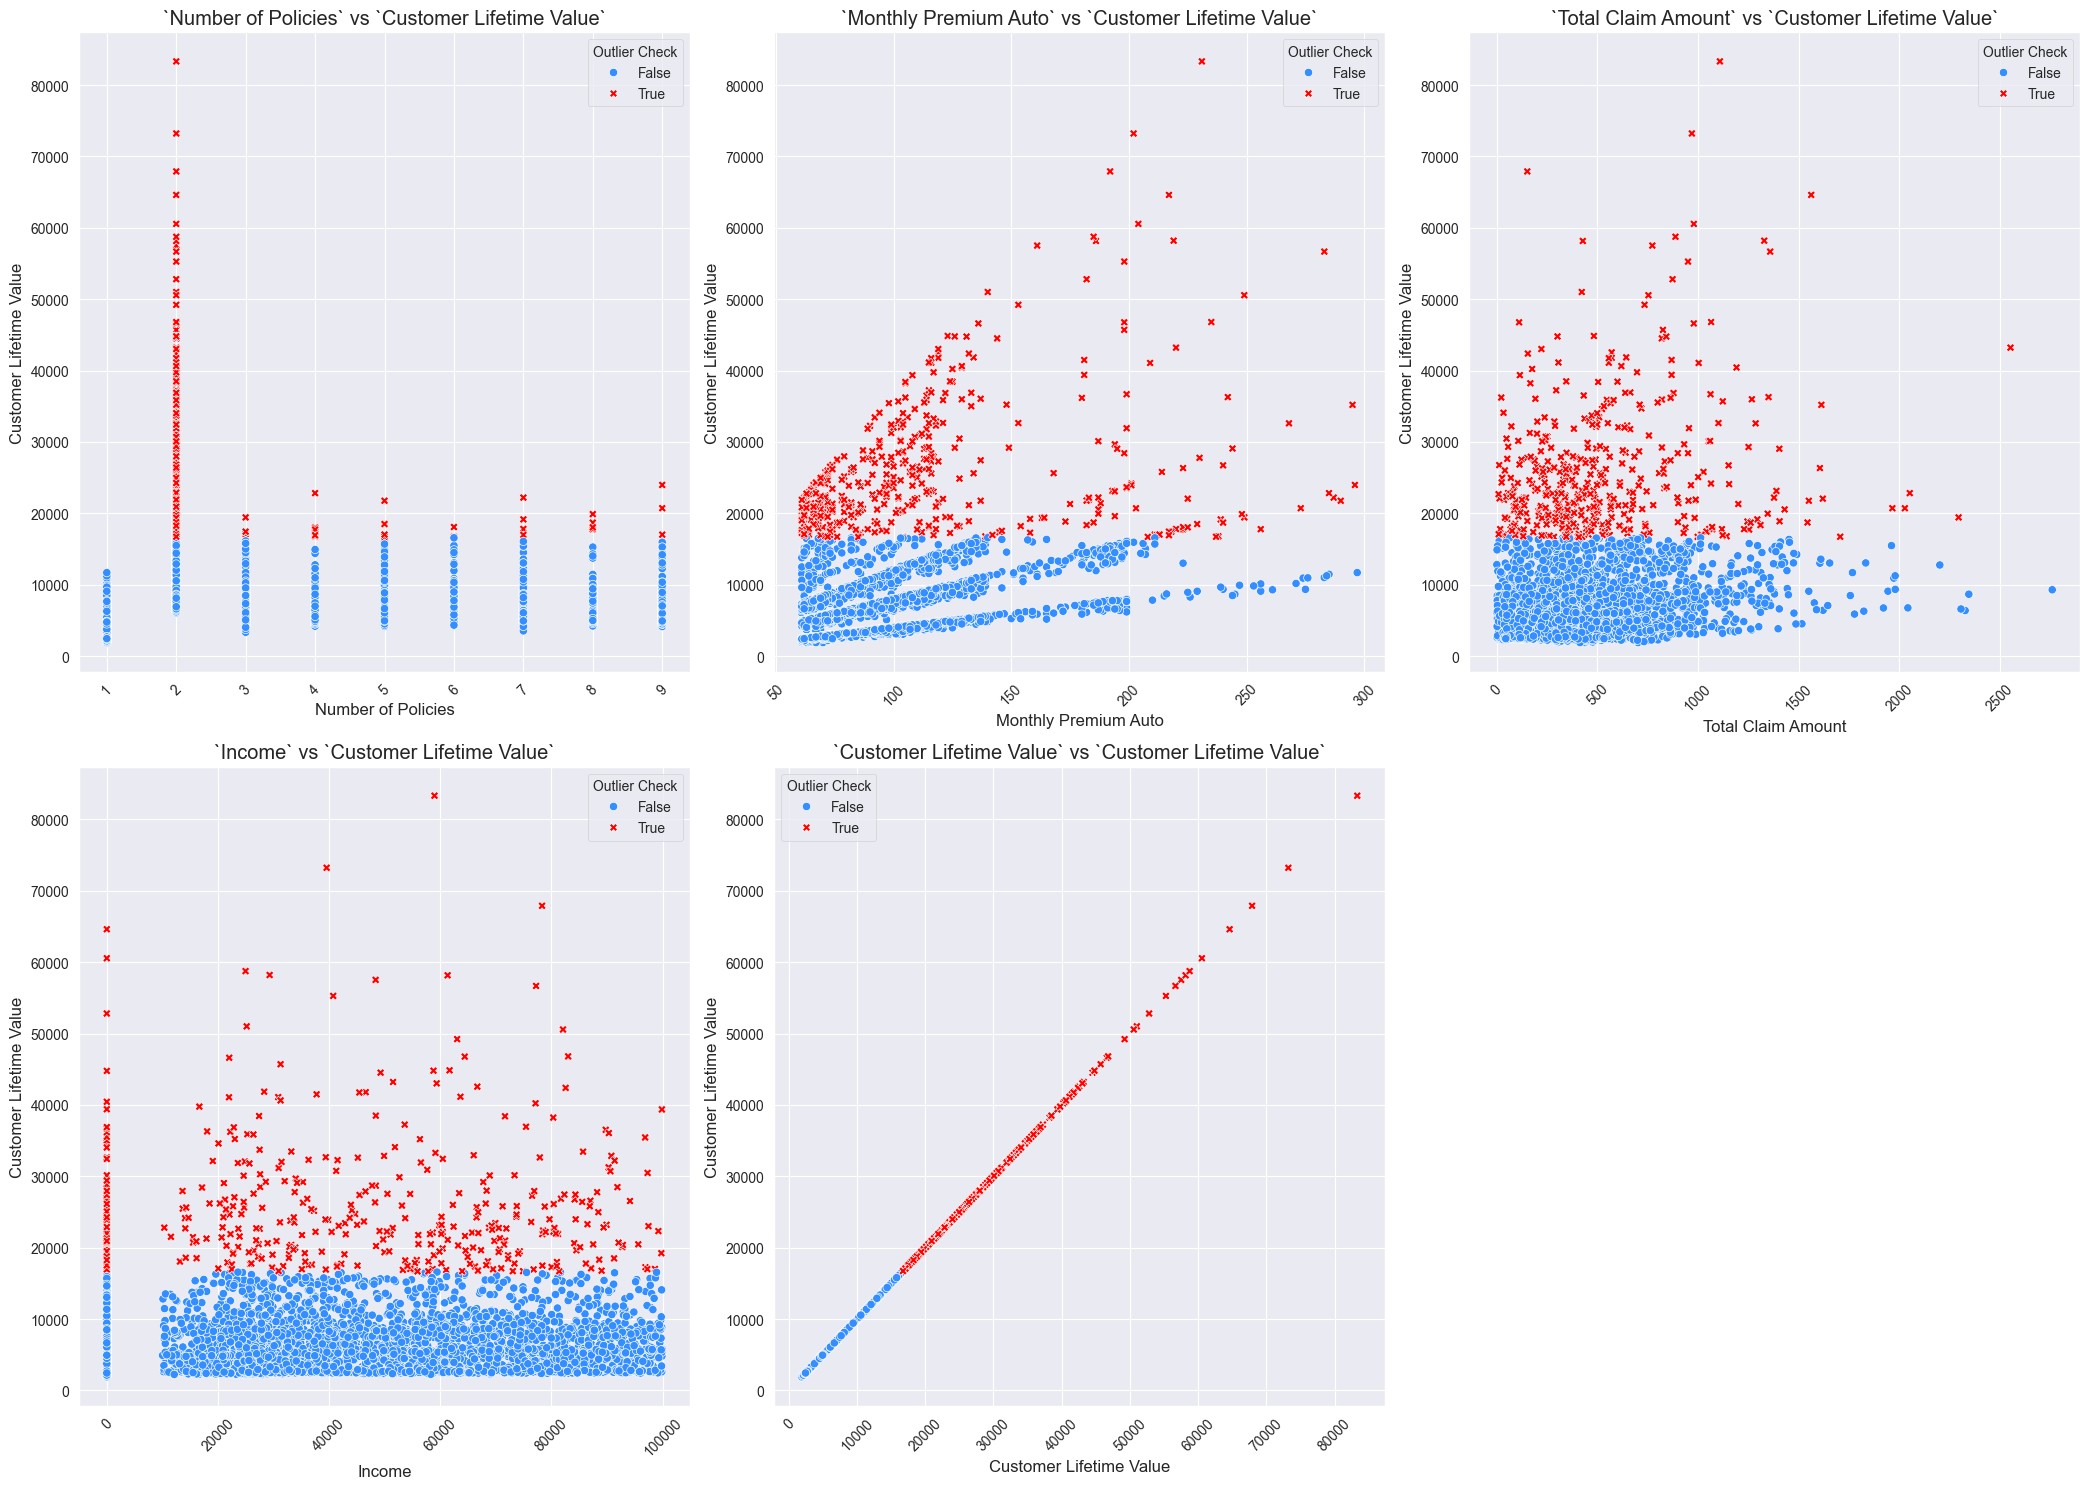

In [26]:
# Potential Outliers Numerical vs Numerical (Target)

# Give the value based on the upper_bound before = 16624.750075
clv_car_out = car_clv_insurance.copy()
clv_car_out['Outlier Check'] = clv_car_out['Customer Lifetime Value'] > 16624.750075

# List of features to plot
numerical_features = [
    'Number of Policies', 'Monthly Premium Auto',
    'Total Claim Amount', 'Income',
    'Customer Lifetime Value'
    ]

categorical_features = [
    'Vehicle Class', 'Coverage', 'Renew Offer Type',
    'EmploymentStatus', 'Marital Status', 'Education'
    ]

scatter_numerical_vs_target(
        data = clv_car_out, numerical_features = numerical_features,
        target = 'Customer Lifetime Value', hue='Outlier Check'
)

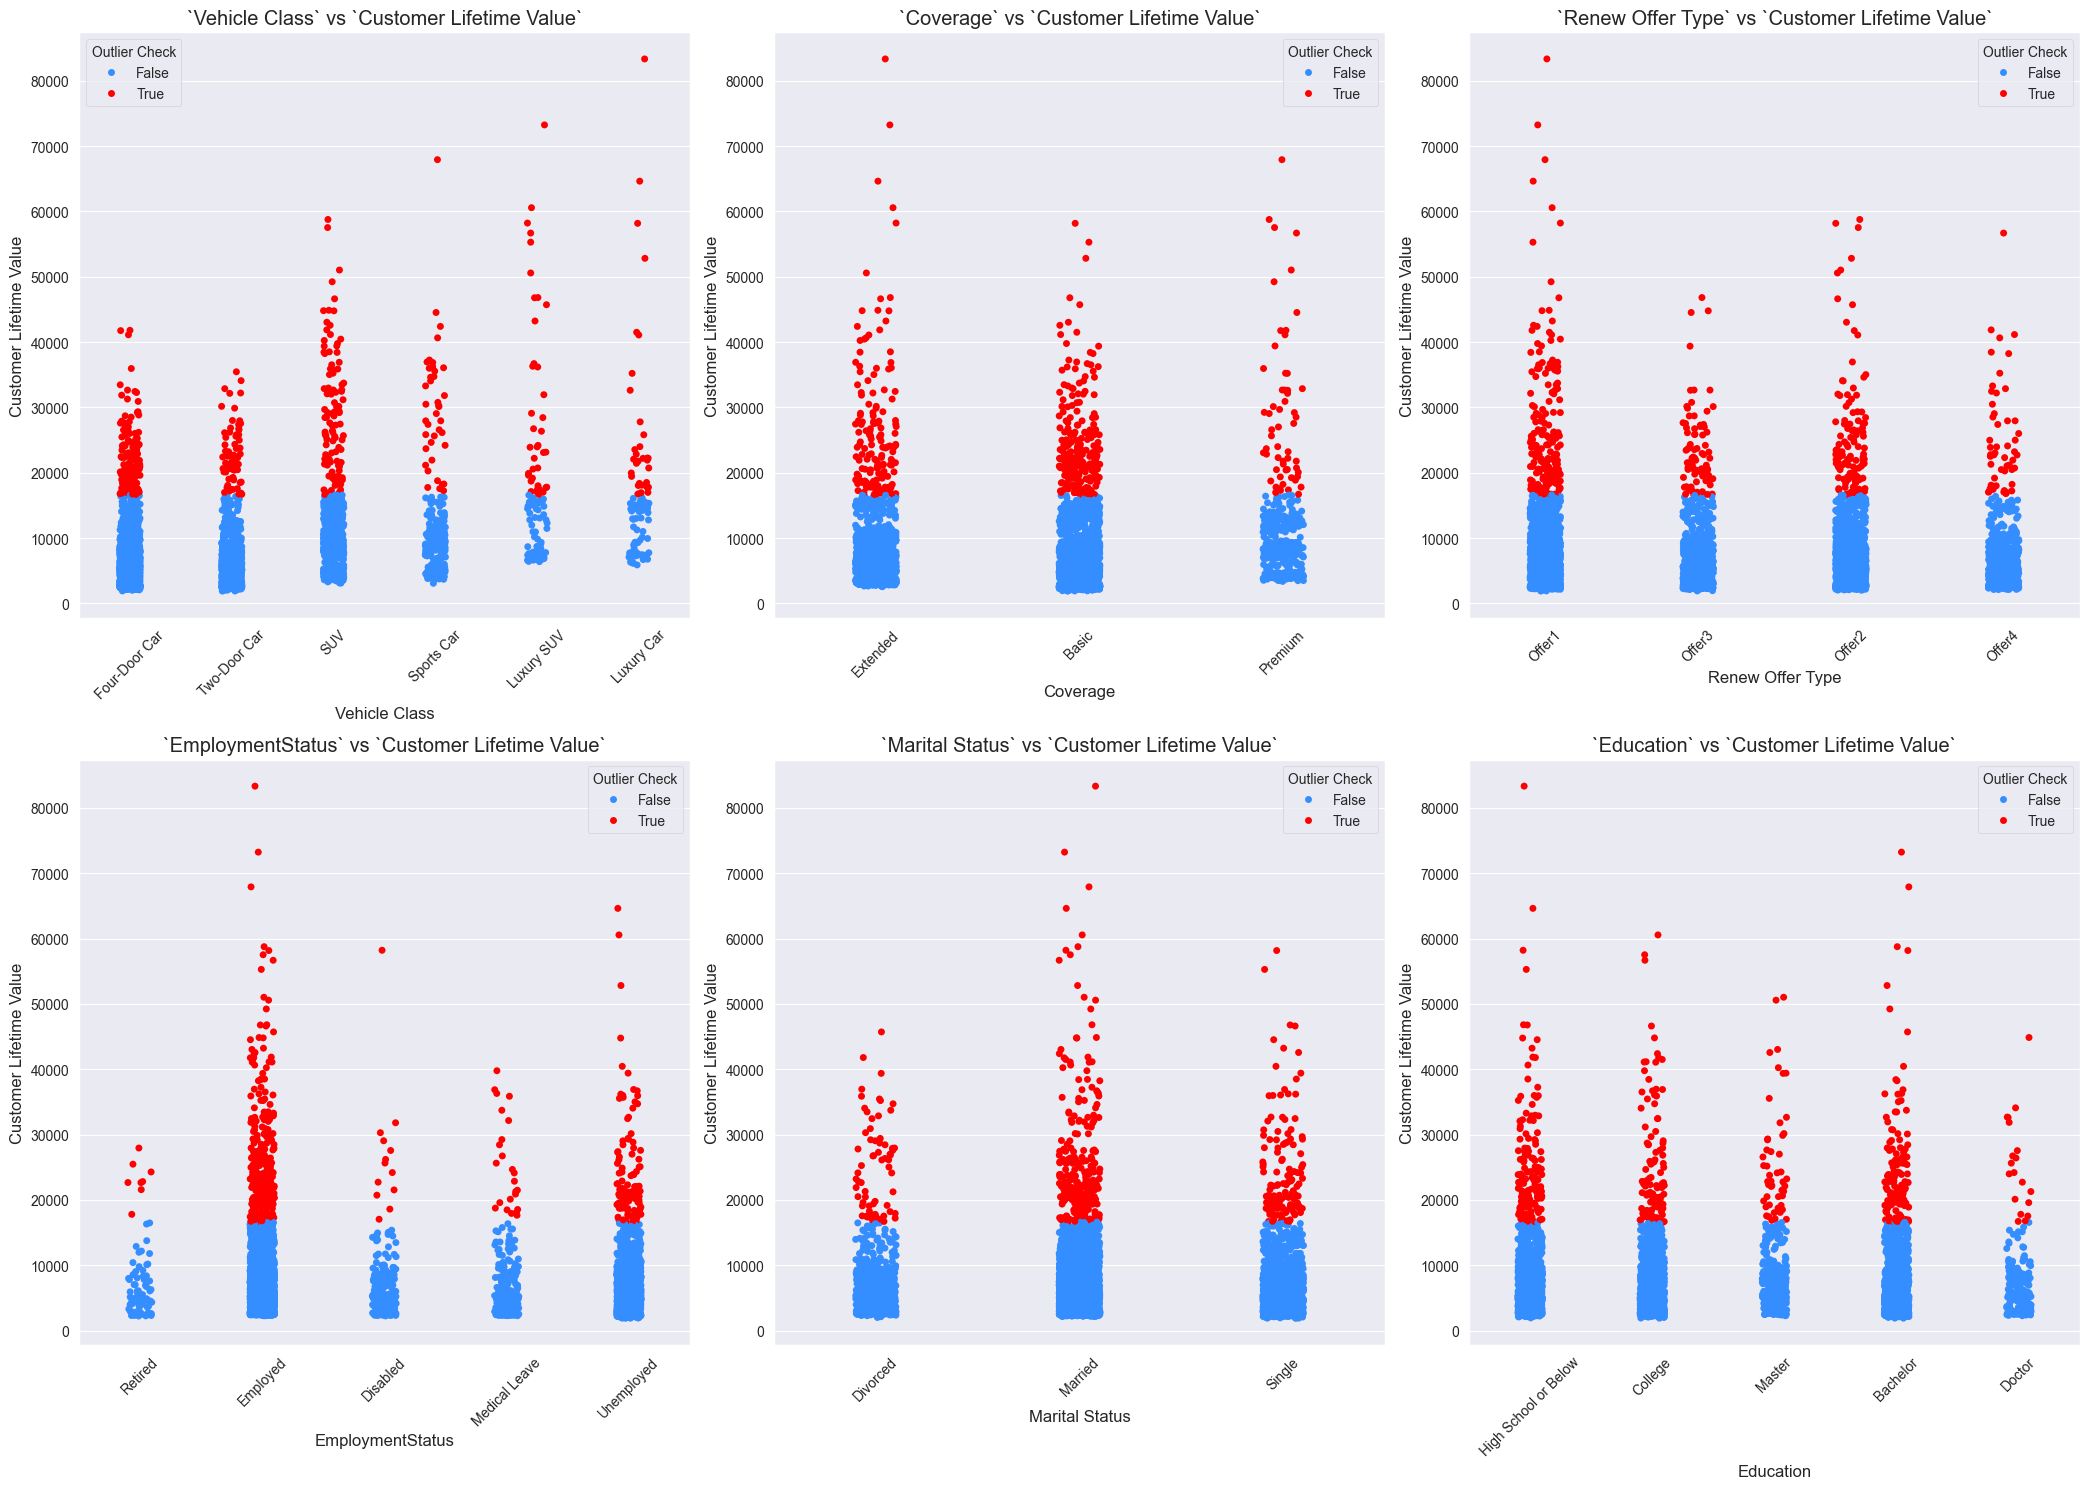

In [27]:
stripplot_categorical_vs_target(data = clv_car_out, categorical_features = categorical_features)

> Based on these information, we would consider the target (Customer Lifetime Value) below 21,000 so that it make the visualization along each numerical or categorical feature looks evenly, especially for `Number of Policies` which customer have 2 Policies (quite equal with other Policies Number).

In [13]:
car_clv_insurance['Customer Lifetime Value'].quantile(.94)

20492.7355

### After Removal Outliers

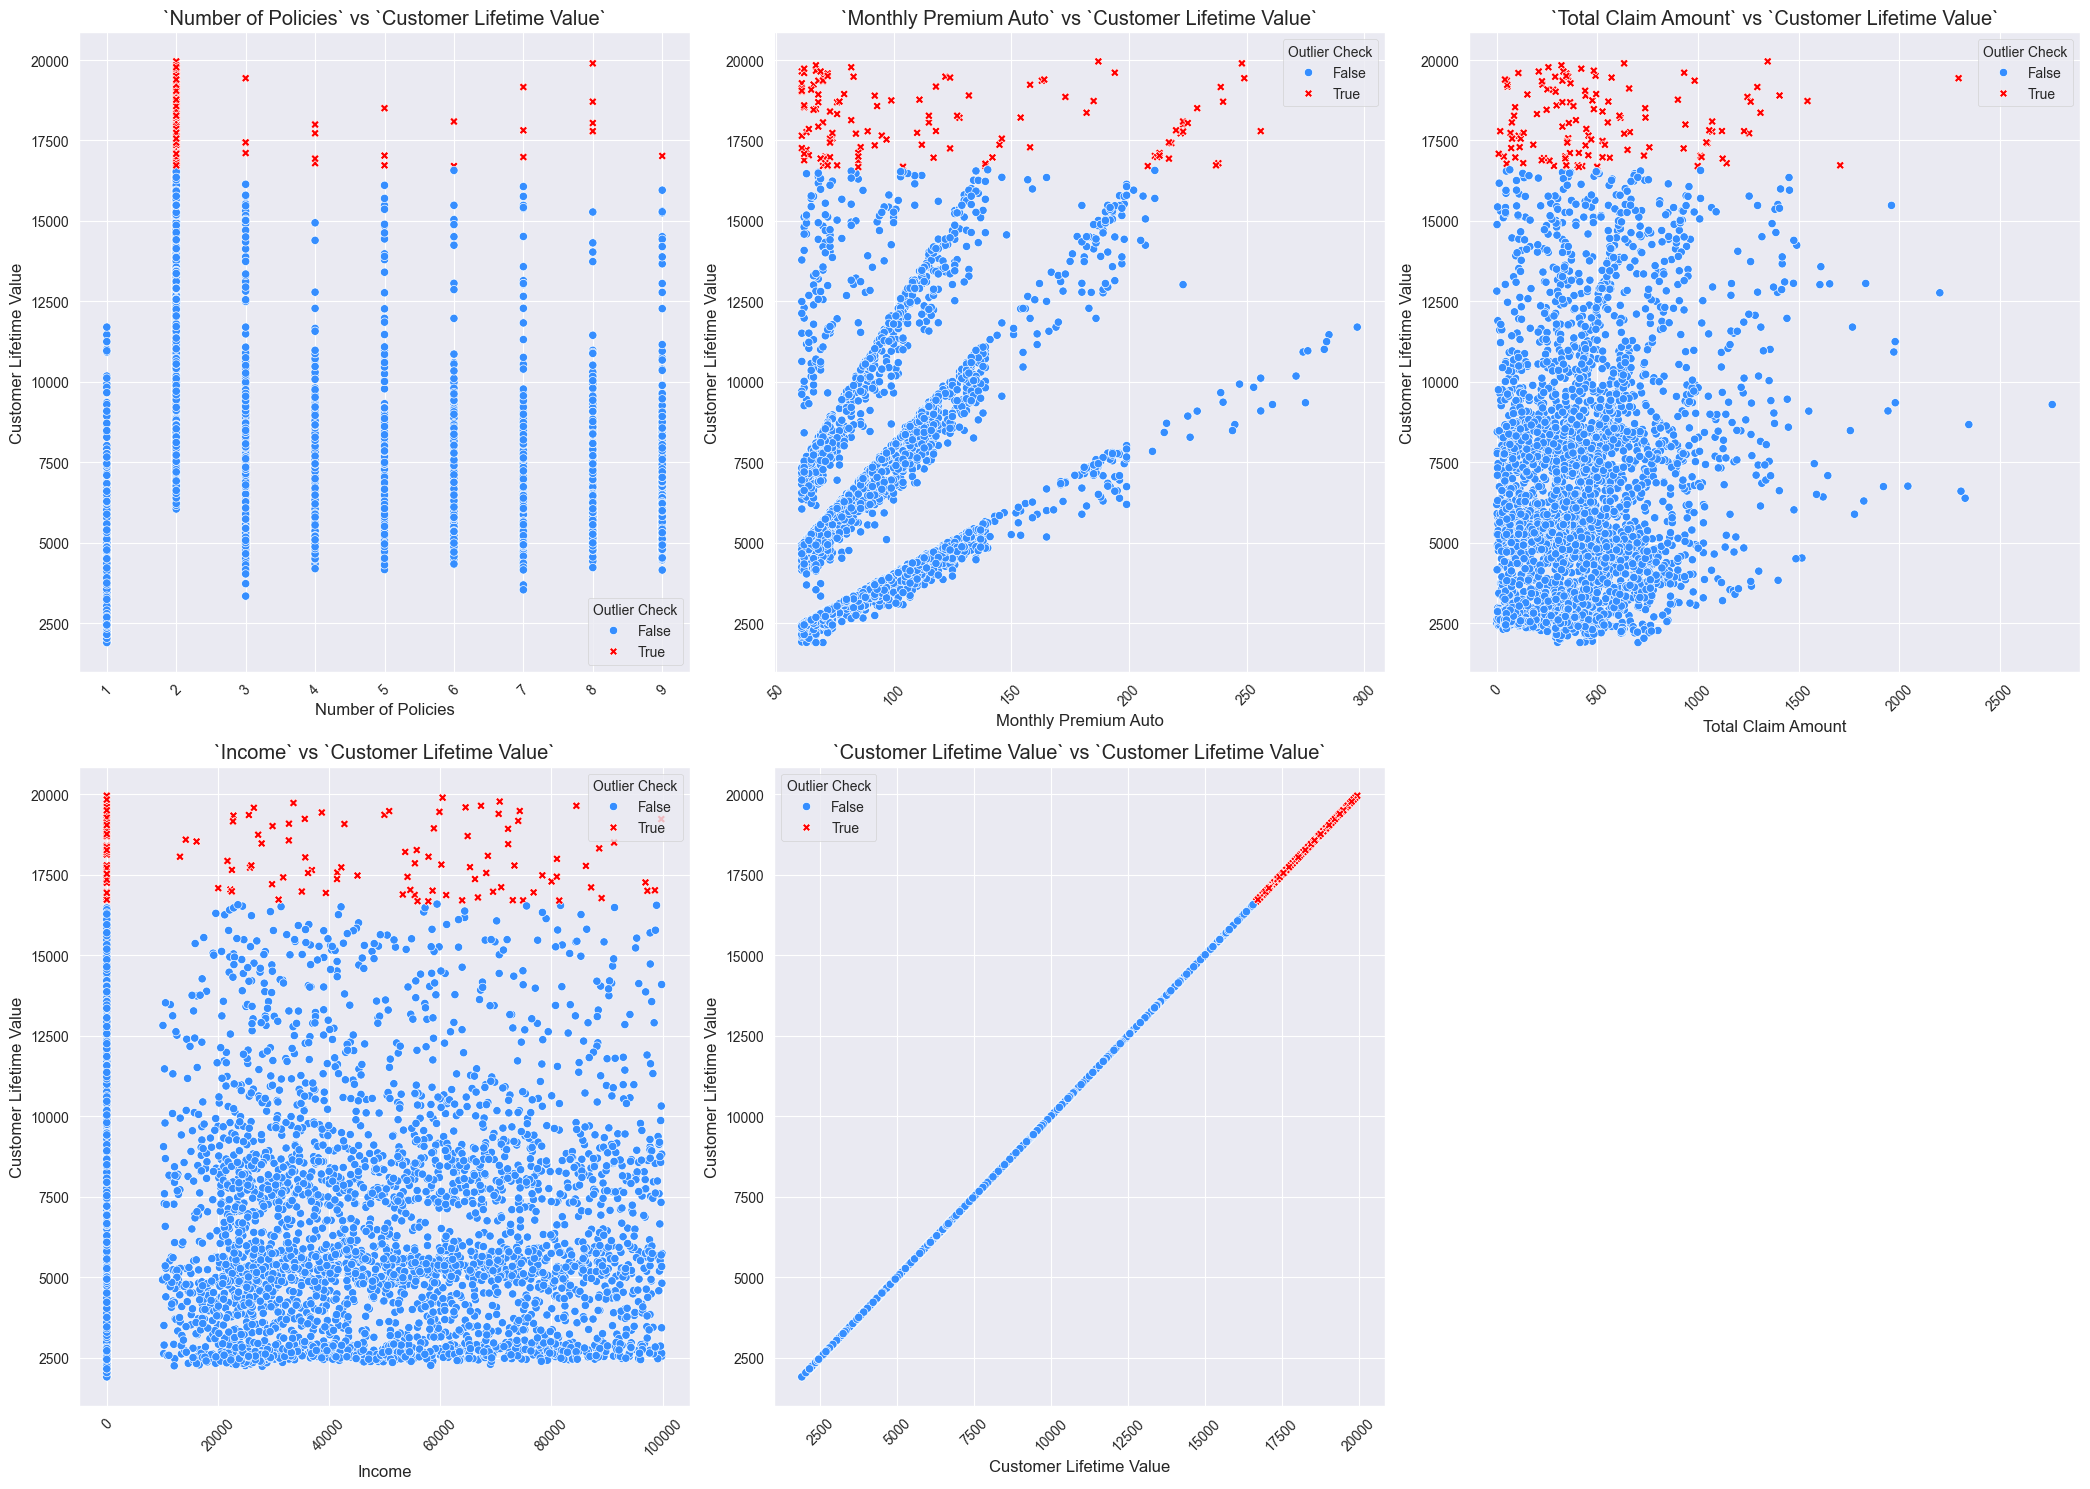

In [28]:
# removal of the potential outliers

life_out = car_clv_insurance[car_clv_insurance['Customer Lifetime Value'] >  20_000]
car_clv_insurance = car_clv_insurance[car_clv_insurance['Customer Lifetime Value'] <=  20_000]

clv_car_out_after = car_clv_insurance.copy()
clv_car_out_after['Outlier Check'] = clv_car_out_after['Customer Lifetime Value'] > 16624.750075

# out_life_rep = lifetimeval.iloc[lifetimeval[lifetimeval['Customer Lifetime Value'] > 16624.750075].index.repeat(repeats=5),:]
# lifetimeval = lifetimeval[lifetimeval['Customer Lifetime Value'] <=  16_624.750075]
# lifetimeval = pd.concat([lifetimeval, out_life_rep], axis=0).reset_index(drop=True)
# lifetimeval

# Visualization Scatter after removal
scatter_numerical_vs_target(clv_car_out_after, numerical_features)

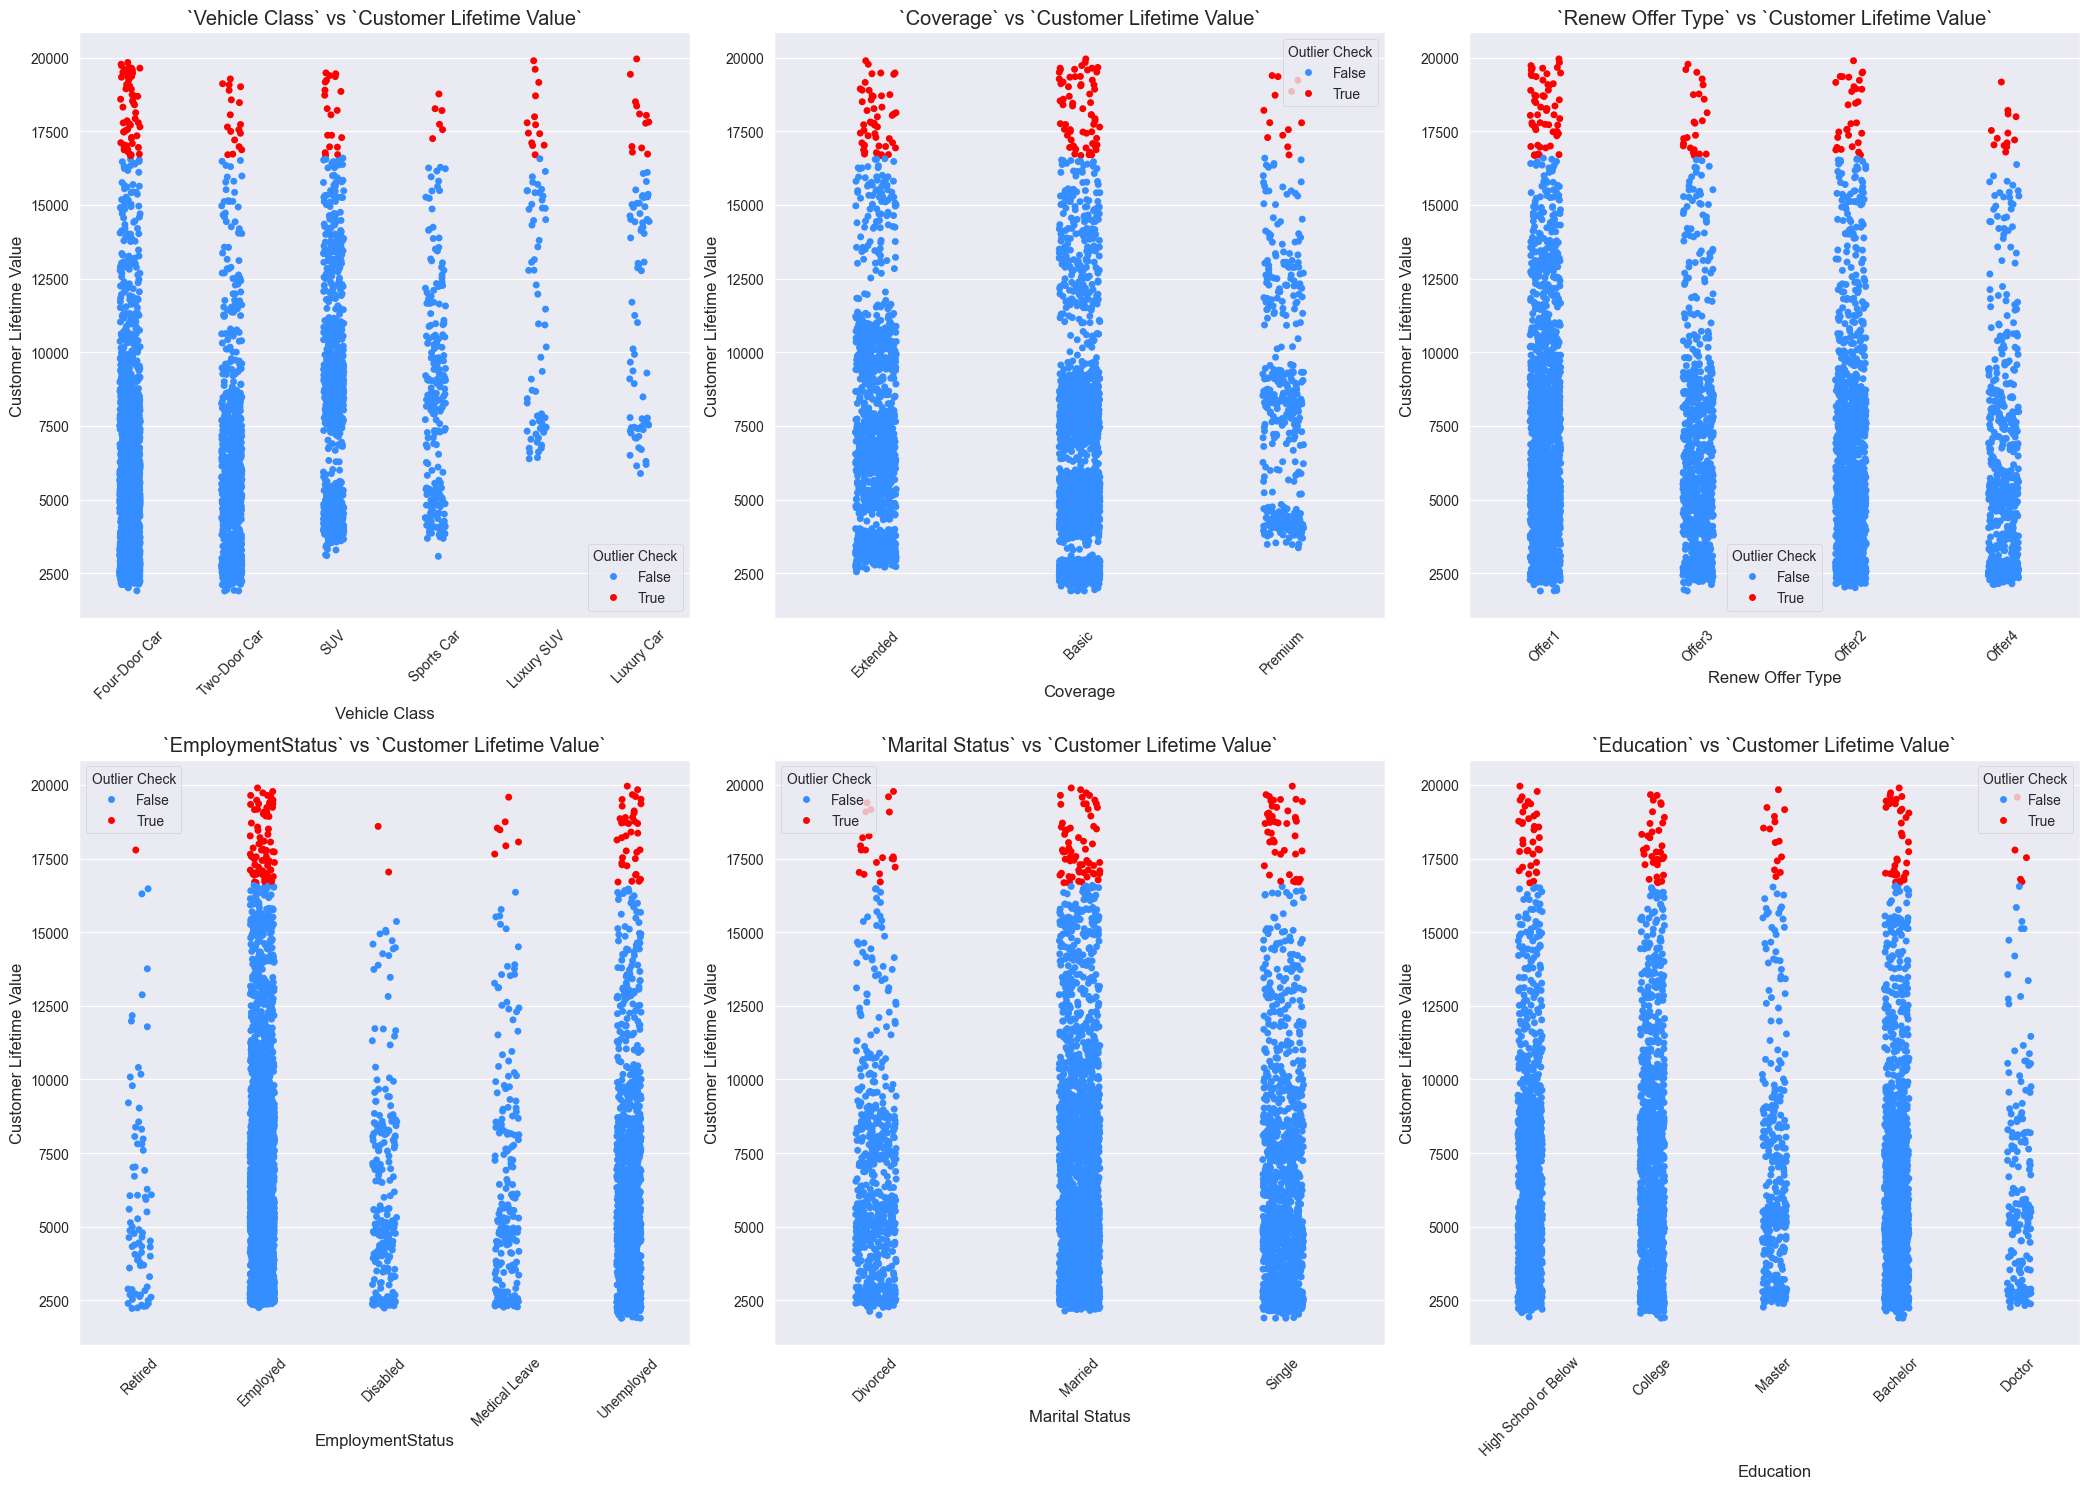

In [29]:
# visualize after removal for categorical vs target
stripplot_categorical_vs_target(clv_car_out_after, categorical_features)

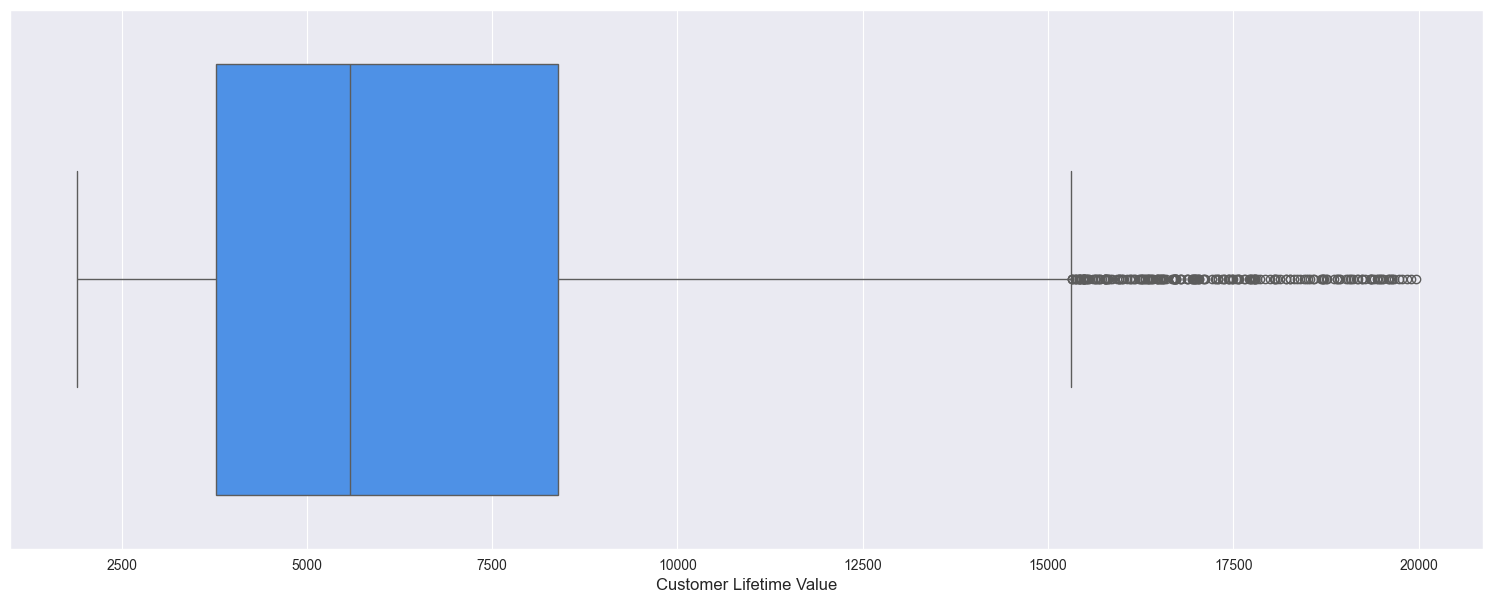

In [30]:
plt.figure(figsize= (19,7))
sns.boxplot(car_clv_insurance['Customer Lifetime Value'], orient = 'h', color = '#358EFF');

> The result of outlier's removal seems make the data more balanced along all features.

# 4. EDA 📊

## Correlation Matrix between Numerical Features

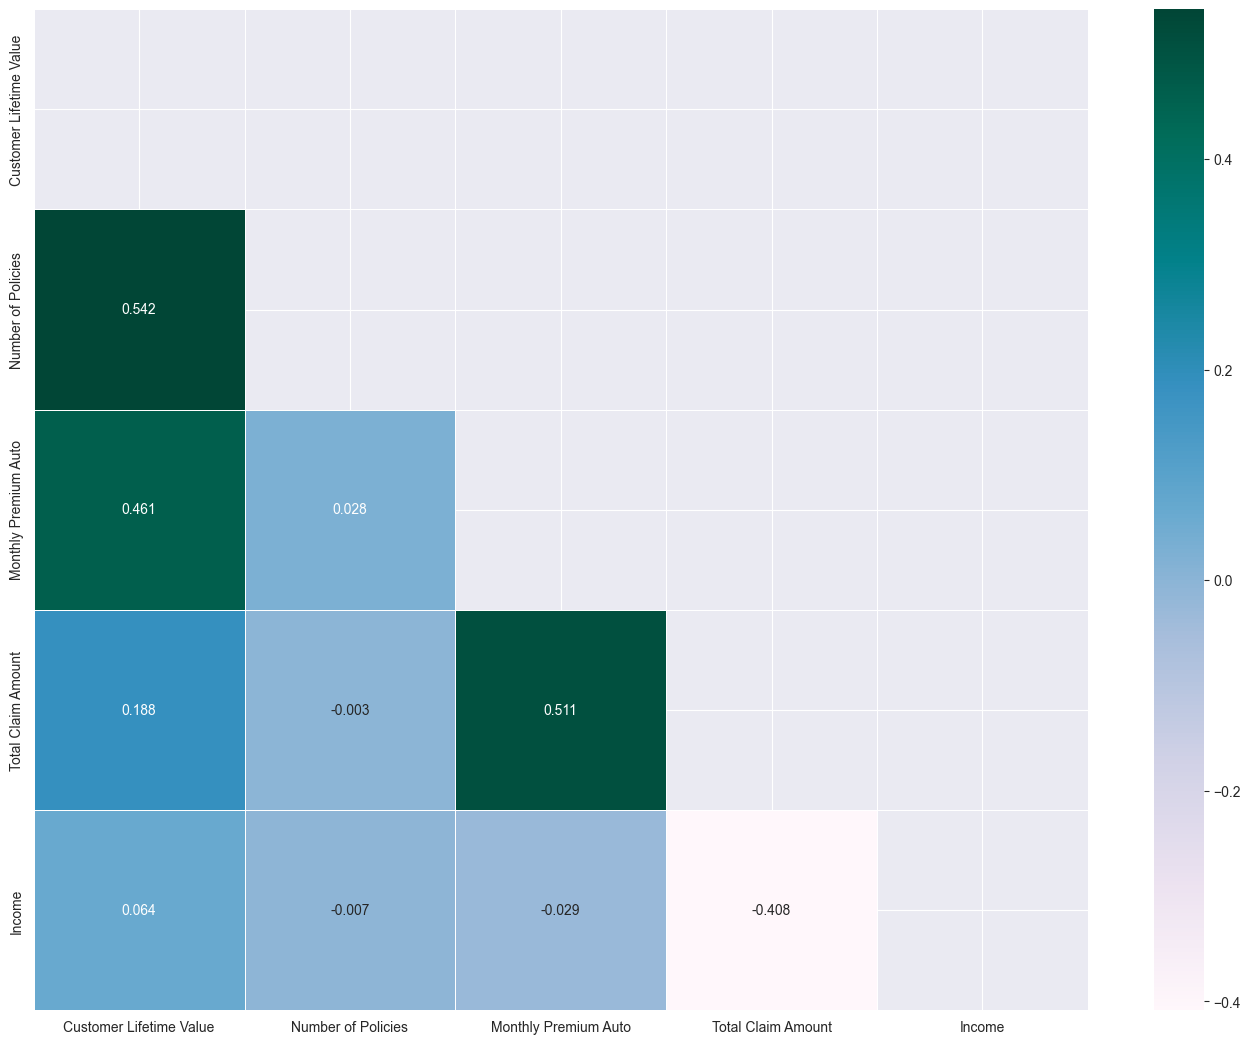

In [31]:
# check whether it might be there is some correlation between features (using spearman method because the distribution seems not normal)

numerical_features = [
    'Number of Policies',
    'Monthly Premium Auto',
    'Total Claim Amount',
    'Income',
    'Customer Lifetime Value'
    ]

corr_matrix = car_clv_insurance[numerical_features].corr(method='spearman')
matrix = np.triu(corr_matrix)

plt.figure(figsize=(17,13))
sns.heatmap(corr_matrix.sort_values(by='Customer Lifetime Value', ascending=False).sort_values(by='Customer Lifetime Value', ascending=False, axis=1), 
            cmap='PuBuGn', annot=True, linewidths= .5, fmt='.3f', mask=matrix);

# corr_matrix['Price'].sort_values(ascending=False);

> There is medium positive effect for each `Monthly Premium Auto` to `Customer Lifetime Value (CLV)` (the target) and `Total Claim Amount` to `Customer Lifetime Value` (the target), based on these if each the value on those two features increase will likely have a higher `CLV` too.

## Categorical and Customer Lifetime Value Bar

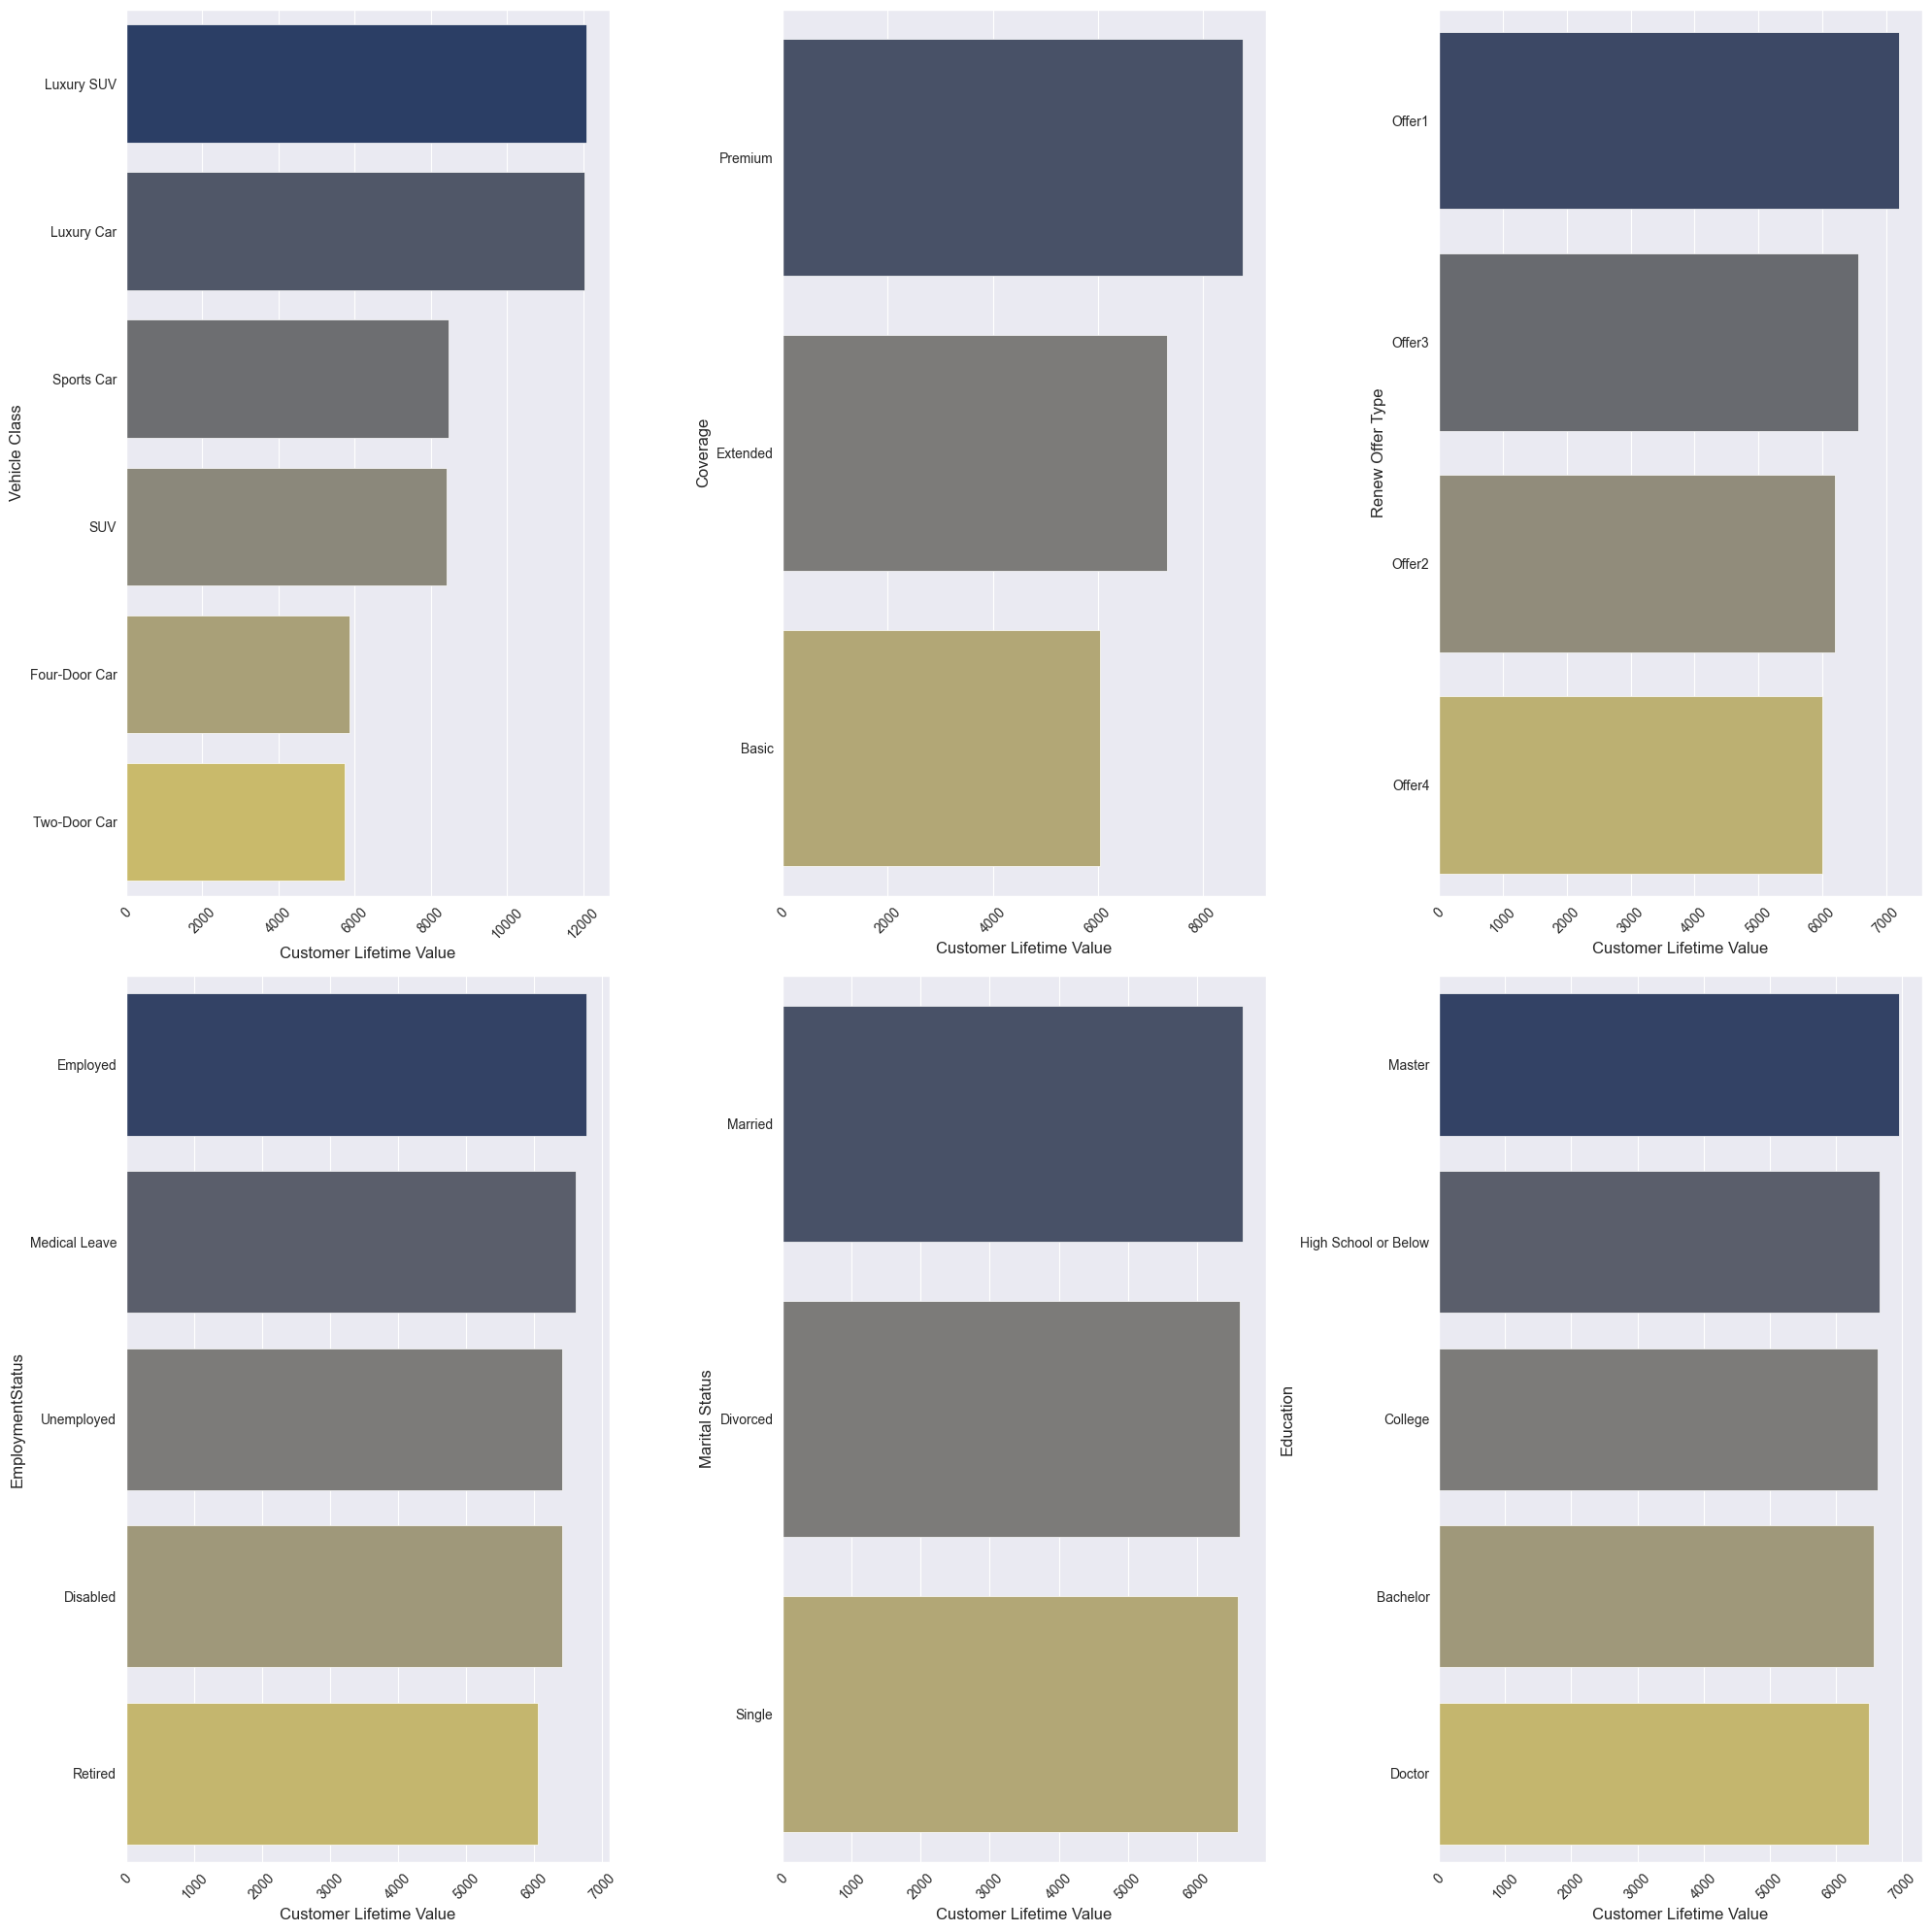

In [32]:
categorical_features  = [
        'Vehicle Class',
        'Coverage',
        'Renew Offer Type',
        'EmploymentStatus',
        'Marital Status',
        'Education'
]

fig, axes = plt.subplots(round(len(categorical_features) / 4), 3, figsize=(20, 20))

# looping to show the bar graph
for i, ax in enumerate(fig.axes):
    if i < len(categorical_features):
        # Calculate the mean Customer Lifetime Value for each category
        order = car_clv_insurance.groupby(categorical_features[i])['Customer Lifetime Value'].mean().sort_values(ascending=False).index

        # bar plot for categorical
        sns.barplot(
            data = car_clv_insurance,
            y = categorical_features[i],
            x = 'Customer Lifetime Value',
            ax = ax,
            palette = 'cividis',
            errorbar = None,
            orient = 'h',
            estimator = 'mean',
            order = order
            )
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)

# remove unnecessary canvas
for i in range(len(categorical_features), 6):
    fig.delaxes(axes.flatten()[i])

fig.tight_layout()

* Both of Luxury Type (Car & SUV) range on top based on `CLV` average, it might be indicate the customers that have each of these types will contribute to higher `CLV`.
* It also happened for the completed coverage package of car insurance --> (Premium, Extended, Basic).
* The Offer1 contribute to the highest average `CLV` on the `Renew Offer Type` for each customer.
* The Employed contribute to the highest average `CLV` on the `Employment Status` for each customer.
* Although the Married Customer contribute to the highest average `CLV` on the `Marital Status` for each customer, but there is no quite significant difference with other customer status.
* The Customer whom hold Master Degree contribute to the highest average `CLV` on the `Employment Status` for each customer.

# 5. Splitting Data

In [33]:
# show all features (total: 11)

car_clv_insurance.columns.to_list(), len(car_clv_insurance.columns.to_list())

(['Vehicle Class',
  'Coverage',
  'Renew Offer Type',
  'EmploymentStatus',
  'Marital Status',
  'Education',
  'Number of Policies',
  'Monthly Premium Auto',
  'Total Claim Amount',
  'Income',
  'Customer Lifetime Value'],
 11)

In [34]:
RANDOM_STATE

233

In [35]:
# feature selection and splitting

X = car_clv_insurance.drop(columns='Customer Lifetime Value')
y = car_clv_insurance['Customer Lifetime Value']

# split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = .2,
    random_state = RANDOM_STATE
)

X_train.shape, X_test.shape

((3782, 10), (946, 10))

# 6. Feature Engineering

In [105]:
car_clv_insurance.head(1)

Vehicle Class  Coverage Renew Offer Type EmploymentStatus Marital Status  \
0  Four-Door Car  Extended           Offer1          Retired       Divorced   

              Education  Number of Policies  Monthly Premium Auto  \
0  High School or Below                 2.0                  90.0   

   Total Claim Amount   Income  Customer Lifetime Value  
0          571.479602  11828.0              10083.48688

In [106]:
car_clv_insurance['Education'].unique()

array(['High School or Below', 'College', 'Master', 'Bachelor', 'Doctor'],
      dtype=object)

## Transformed Process

* SimpleImputer: Handles missing values by imputing them with a specified strategy (e.g., mean, median, mode).
* OneHotEncoder: Converts categorical features into a one-hot numeric array.
* OrdinalEncoder: Converts categorical features to numerical values based on their ordinal position.
* RobustScaler: Scales features using statistics that are robust to outliers (i.e., using the median and the interquartile range).

In [58]:
# defining the features
nominal_features = ['Vehicle Class', 'EmploymentStatus', 'Marital Status']
ordinal_features = ['Education', 'Coverage']
edu_ordered_cat = ['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor']
coverage_ordered_cat = ['Basic', 'Extended', 'Premium']
numerical_features = ['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income']

# define some pipelines
pipeline_nominal = Pipeline([
        ('imputer_mode', SimpleImputer(strategy = 'most_frequent', add_indicator = True)), # impute if any missng values
        ('onehot_encoding', OneHotEncoder(drop = 'first', dtype = int)) # encoding 
    ])

pipeline_ordinal = Pipeline([
        ('imputer_mode', SimpleImputer(strategy = 'most_frequent', add_indicator = True)), # impute if any missng values
        ('ordinal_encoding', OrdinalEncoder(categories=[edu_ordered_cat, coverage_ordered_cat])) # encoding 
    ])

pipeline_numerical = Pipeline([
        ('imputer_median', SimpleImputer(strategy = 'median', add_indicator = True)), # impute if any missng values
         # ('poly', PolynomialFeatures(degree=2, include_bias=False)), # poly
        ('numerical_scaling', RobustScaler()) # encoding 
    ])

# define pipeline for some thing to do
transformer = ColumnTransformer([
    ('nominal_preprocess', pipeline_nominal, nominal_features),
    ('ordinal_preprocess', pipeline_ordinal, ordinal_features),
    ('numerical_preprocess', pipeline_numerical, numerical_features)
])

transformer_tree = ColumnTransformer([
    ('nominal_preprocess', pipeline_nominal, nominal_features),
    ('ordinal_preprocess', pipeline_ordinal, ordinal_features),
    ('numerical_preprocess', SimpleImputer(strategy = 'median', add_indicator = True), numerical_features)
])

transformer.fit(X_train)
transformer_tree.fit(X_train)

# clean result formatting feature's name
features = list(transformer.get_feature_names_out())

list_features = []
for feature in features:
    list_features.append(''.join(feature.split('__')[-1]))

# show the result of transformation
transform_results_df = pd.DataFrame(
    transformer.transform(X_train),
    columns = list_features,
    # columns = features
    )

transform_results_tree_df = pd.DataFrame(
    transformer_tree.transform(X_train),
    columns = list_features,
    # columns = features
    )

display(
    transform_results_df,
    transform_results_tree_df
)

Vehicle Class_Luxury Car  Vehicle Class_Luxury SUV  Vehicle Class_SUV  \
0                          0.0                       0.0                0.0   
1                          0.0                       0.0                0.0   
2                          0.0                       0.0                0.0   
3                          0.0                       0.0                0.0   
4                          0.0                       0.0                0.0   
...                        ...                       ...                ...   
3777                       0.0                       0.0                0.0   
3778                       0.0                       0.0                0.0   
3779                       0.0                       0.0                0.0   
3780                       0.0                       0.0                1.0   
3781                       0.0                       0.0                0.0   

      Vehicle Class_Sports Car  Vehicle Class_Two-Door Car  \
0                          0.0                         1.0   
1                          0.0                         0.0   
2                          0.0                         0.0   
3                          0.0                         1.0   
4                          0.0                         0.0   
...                        ...                         ...   
3777                       0.0                         0.0   
3778                       0.0                         1.0   
3779                       0.0                         0.0   
3780                       0.0                         0.0   
3781                       0.0                         0.0   

      EmploymentStatus_Employed  EmploymentStatus_Medical Leave  \
0                           1.0                             0.0   
1                           1.0                             0.0   
2                           1.0                             0.0   
3                           1.0                             0.0   
4                           1.0                             0.0   
...                         ...                             ...   
3777                        1.0                             0.0   
3778                        1.0                             0.0   
3779                        1.0                             0.0   
3780                        1.0                             0.0   
3781                        1.0                             0.0   

      EmploymentStatus_Retired  EmploymentStatus_Unemployed  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   
...                        ...                          ...   
3777                       0.0                          0.0   
3778                       0.0                          0.0   
3779                       0.0                          0.0   
3780                       0.0                          0.0   
3781                       0.0                          0.0   

      Marital Status_Married  Marital Status_Single  Education  Coverage  \
0                        0.0                    0.0        0.0       0.0   
1                        0.0                    1.0        1.0       0.0   
2                        0.0                    0.0        1.0       0.0   
3                        1.0                    0.0        3.0       0.0   
4                        1.0                    0.0        3.0       2.0   
...                      ...                    ...        ...       ...   
3777                     1.0                    0.0        2.0       1.0   
3778                     0.0                    1.0        1.0       0.0   
3779                     1.0                    0.0        4.0    

Vehicle Class_Luxury Car  Vehicle Class_Luxury SUV  Vehicle Class_SUV  \
0                          0.0                       0.0                0.0   
1                          0.0                       0.0                0.0   
2                          0.0                       0.0                0.0   
3                          0.0                       0.0                0.0   
4                          0.0                       0.0                0.0   
...                        ...                       ...                ...   
3777                       0.0                       0.0                0.0   
3778                       0.0                       0.0                0.0   
3779                       0.0                       0.0                0.0   
3780                       0.0                       0.0                1.0   
3781                       0.0                       0.0                0.0   

      Vehicle Class_Sports Car  Vehicle Class_Two-Door Car  \
0                          0.0                         1.0   
1                          0.0                         0.0   
2                          0.0                         0.0   
3                          0.0                         1.0   
4                          0.0                         0.0   
...                        ...                         ...   
3777                       0.0                         0.0   
3778                       0.0                         1.0   
3779                       0.0                         0.0   
3780                       0.0                         0.0   
3781                       0.0                         0.0   

      EmploymentStatus_Employed  EmploymentStatus_Medical Leave  \
0                           1.0                             0.0   
1                           1.0                             0.0   
2                           1.0                             0.0   
3                           1.0                             0.0   
4                           1.0                             0.0   
...                         ...                             ...   
3777                        1.0                             0.0   
3778                        1.0                             0.0   
3779                        1.0                             0.0   
3780                        1.0                             0.0   
3781                        1.0                             0.0   

      EmploymentStatus_Retired  EmploymentStatus_Unemployed  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   
...                        ...                          ...   
3777                       0.0                          0.0   
3778                       0.0                          0.0   
3779                       0.0                          0.0   
3780                       0.0                          0.0   
3781                       0.0                          0.0   

      Marital Status_Married  Marital Status_Single  Education  Coverage  \
0                        0.0                    0.0        0.0       0.0   
1                        0.0                    1.0        1.0       0.0   
2                        0.0                    0.0        1.0       0.0   
3                        1.0                    0.0        3.0       0.0   
4                        1.0                    0.0        3.0       2.0   
...                      ...                    ...        ...       ...   
3777                     1.0                    0.0        2.0       1.0   
3778                     0.0                    1.0        1.0       0.0   
3779                     1.0                    0.0        4.0    

## Preprocessed Data

In [59]:
# result of transformed train data
transform_X_train_df = pd.DataFrame(
    transformer.transform(X_train),
    columns = list_features
    )

transform_X_train_tree_df = pd.DataFrame(
    transformer_tree.transform(X_train),
    columns = list_features
    )

# result of transformed test data
transform_X_test_df = pd.DataFrame(
    transformer.transform(X_test),
    columns = list_features
    )

transform_X_test_tree_df = pd.DataFrame(
    transformer_tree.transform(X_test),
    columns = list_features
    )

display(
    transform_X_train_df.shape, transform_X_train_tree_df.shape,
    transform_X_test_df.shape, transform_X_test_tree_df.shape
)

(3782, 17)

(3782, 17)

(946, 17)

(946, 17)

## Feature Selection (RFECV)

In [38]:
# fold for cross valitadion
kfold_cv = KFold(n_splits = 5, shuffle = True, random_state = RANDOM_STATE) #stratified for classification
# StratifiedKFold()
# RFE to select features number based on feature importance
selector_features = RFECV(
    estimator = XGBRegressor(random_state=RANDOM_STATE, n_jobs = -1),
    # estimator = RandomForestRegressor(criterion = 'absolute_error', random_state = RANDOM_STATE),
    cv = kfold_cv,
    scoring = 'r2',
    min_features_to_select=9,
    step = 1
)
selector_features = selector_features.fit(transform_X_train_tree_df, y_train)

In [60]:
pd.DataFrame(selector_features.cv_results_).sort_values(by='mean_test_score', ascending=False).iloc[:6]

mean_test_score  std_test_score  split0_test_score  split1_test_score  \
2         0.816225        0.015517           0.824937           0.839713   
8         0.813011        0.014029           0.820670           0.836256   
4         0.811210        0.015140           0.826018           0.826717   
3         0.810284        0.013594           0.814764           0.827982   
1         0.810074        0.015073           0.818525           0.830657   
7         0.809574        0.014255           0.806598           0.834824   

   split2_test_score  split3_test_score  split4_test_score  n_features  
2           0.795706           0.803787           0.816981          11  
8           0.797833           0.801201           0.809098          17  
4           0.794135           0.792199           0.816981          13  
3           0.787716           0.804104           0.816857          12  
1           0.789078           0.796896           0.815213          10  
7           0.793566           0.799596           0.813285          16

In [61]:
# the selected features to show
rfe_result = pd.DataFrame({
    'Feature': transform_X_train_df.columns,
    'Selected': selector_features.support_,
    'Ranking': selector_features.ranking_
}).sort_values(by='Ranking')

df_selected = rfe_result[rfe_result['Selected']]
features_selected = df_selected['Feature'].values
df_selected

Feature  Selected  Ranking
8      EmploymentStatus_Unemployed      True        1
14            Monthly Premium Auto      True        1
13              Number of Policies      True        1
11                       Education      True        1
10           Marital Status_Single      True        1
9           Marital Status_Married      True        1
15              Total Claim Amount      True        1
16                          Income      True        1
6   EmploymentStatus_Medical Leave      True        1
5        EmploymentStatus_Employed      True        1
4       Vehicle Class_Two-Door Car      True        1

> Based on this information, ONLY 11 features (mainly after preprocessed) will be used for the model.

## New Transformation After Selection

In [293]:
features_selected, len(features_selected)

(array(['EmploymentStatus_Unemployed', 'Monthly Premium Auto',
        'Number of Policies', 'Education', 'Marital Status_Single',
        'Marital Status_Married', 'Total Claim Amount', 'Income',
        'EmploymentStatus_Medical Leave', 'EmploymentStatus_Employed',
        'Vehicle Class_Two-Door Car'], dtype=object),
 11)

In [62]:
# Custom transformer to select certain columns after preprocessing
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        # clean result formatting feature's name
        features = list(transformer.get_feature_names_out())
        
        list_features = []
        for feature in features:
            list_features.append(''.join(feature.split('__')[-1]))
            
        self.feature_names_ = list_features
    
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Ensure X is a DataFrame to facilitate column selection
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X, columns=self.feature_names_)
        return X[self.columns]

# Combined pipeline with ColumnSelector
pipe_transformer = Pipeline(steps=[
    ('transformer', transformer),
    ('selector', ColumnSelector(columns = features_selected))  # Select columns after preprocessing
])

pipe_transformer_tree = Pipeline(steps=[
    ('transformer', transformer_tree),
    ('selector', ColumnSelector(columns = features_selected))  # Select columns after preprocessing
])

# clean result formatting feature's name
features = list(transformer.get_feature_names_out())

list_features = []
for feature in features:
    list_features.append(''.join(feature.split('__')[-1]))

# assign feature name after transformation preprocess
# pipe_transformer.named_steps['selector'].set_feature_names(list_features)
# pipe_transformer_tree.named_steps['selector'].set_feature_names(list_features)

# fit the new transformer
pipe_transformer.fit(X_train)
pipe_transformer_tree.fit(X_train)

# show the result of transformation
transform_results_df = pd.DataFrame(
    pipe_transformer.transform(X_train)
    )

transform_results_tree_df = pd.DataFrame(
    pipe_transformer_tree.transform(X_train)
    )

display(
    transform_results_df,
    transform_results_tree_df
)

EmploymentStatus_Unemployed  Monthly Premium Auto  Number of Policies  \
0                             0.0             -0.153846            0.000000   
1                             0.0             -0.282051           -0.333333   
2                             0.0             -0.487179           -0.333333   
3                             0.0             -0.153846            0.333333   
4                             0.0              0.589744           -0.333333   
...                           ...                   ...                 ...   
3777                          0.0              0.307692           -0.333333   
3778                          0.0             -0.410256            0.000000   
3779                          0.0             -0.358974           -0.333333   
3780                          0.0              0.846154            2.000000   
3781                          0.0             -0.205128            1.666667   

      Education  Marital Status_Single  Marital Status_Married  \
0           0.0                    0.0                     0.0   
1           1.0                    1.0                     0.0   
2           1.0                    0.0                     0.0   
3           3.0                    0.0                     1.0   
4           3.0                    0.0                     1.0   
...         ...                    ...                     ...   
3777        2.0                    0.0                     1.0   
3778        1.0                    1.0                     0.0   
3779        4.0                    0.0                     1.0   
3780        3.0                    1.0                     0.0   
3781        2.0                    0.0                     1.0   

      Total Claim Amount    Income  EmploymentStatus_Medical Leave  \
0              -0.310625  0.534888                             0.0   
1              -0.227897  0.060444                             0.0   
2              -1.214204  1.001679                             0.0   
3              -0.808630  0.223371                             0.0   
4               0.429736  0.418595                             0.0   
...                  ...       ...                             ...   
3777           -0.390540  0.491167                             0.0   
3778           -0.460891  0.433320                             0.0   
3779           -0.592824 -0.003131                             0.0   
3780           -0.397958  0.455278                             0.0   
3781           -0.157779 -0.128081                             0.0   

      EmploymentStatus_Employed  Vehicle Class_Two-Door Car  
0                           1.0                         1.0  
1                           1.0                         0.0  
2                           1.0                         0.0  
3                           1.0                         1.0  
4                           1.0                         0.0  
...                         ...                         ...  
3777                        1.0                         0.0  
3778                        1.0                         1.0  
3779                        1.0                         0.0  
3780                        1.0                         0.0  
3781                        1.0                         0.0  

[3782 rows x 11 columns]

EmploymentStatus_Unemployed  Monthly Premium Auto  Number of Policies  \
0                             0.0                  74.0                 2.0   
1                             0.0                  69.0                 1.0   
2                             0.0                  61.0                 1.0   
3                             0.0                  74.0                 3.0   
4                             0.0                 103.0                 1.0   
...                           ...                   ...                 ...   
3777                          0.0                  92.0                 1.0   
3778                          0.0                  64.0                 2.0   
3779                          0.0                  66.0                 1.0   
3780                          0.0                 113.0                 8.0   
3781                          0.0                  72.0                 7.0   

      Education  Marital Status_Single  Marital Status_Married  \
0           0.0                    0.0                     0.0   
1           1.0                    1.0                     0.0   
2           1.0                    0.0                     0.0   
3           3.0                    0.0                     1.0   
4           3.0                    0.0                     1.0   
...         ...                    ...                     ...   
3777        2.0                    0.0                     1.0   
3778        1.0                    1.0                     0.0   
3779        4.0                    0.0                     1.0   
3780        3.0                    1.0                     0.0   
3781        2.0                    0.0                     1.0   

      Total Claim Amount   Income  EmploymentStatus_Medical Leave  \
0             275.608537  67197.0                             0.0   
1             300.056383  37876.0                             0.0   
2               8.582971  96045.0                             0.0   
3             128.438230  47945.0                             0.0   
4             494.400000  60010.0                             0.0   
...                  ...      ...                             ...   
3777          251.992083  64495.0                             0.0   
3778          231.201886  60920.0                             0.0   
3779          192.213037  33947.0                             0.0   
3780          249.799752  62277.0                             0.0   
3781          320.777404  26225.0                             0.0   

      EmploymentStatus_Employed  Vehicle Class_Two-Door Car  
0                           1.0                         1.0  
1                           1.0                         0.0  
2                           1.0                         0.0  
3                           1.0                         1.0  
4                           1.0                         0.0  
...                         ...                         ...  
3777                        1.0                         0.0  
3778                        1.0                         1.0  
3779                        1.0                         0.0  
3780                        1.0                         0.0  
3781                        1.0                         0.0  

[3782 rows x 11 columns]

## Preprocessed After Selection

In [63]:
# result of transformed train data
transform_X_train_df = pd.DataFrame(
    pipe_transformer.transform(X_train)
    )

transform_X_train_tree_df = pd.DataFrame(
    pipe_transformer_tree.transform(X_train)
    )

# result of transformed test data
transform_X_test_df = pd.DataFrame(
    pipe_transformer.transform(X_test)
    )

transform_X_test_tree_df = pd.DataFrame(
    pipe_transformer_tree.transform(X_test)
    )

display(
    transform_X_train_df.shape, transform_X_train_tree_df.shape,
    transform_X_test_df.shape, transform_X_test_tree_df.shape
)

(3782, 11)

(3782, 11)

(946, 11)

(946, 11)

# 7. Modelling (Multiple Regression)

## Define New Metrics

| Metric Name | Function | Description |
| --- | --- | --- |
| Adjusted R² Score  | How well the model fits the data, adjusting for the number of predictors to prevent overfitting. | A statistical measure that indicates how well a regression model explains the variability of the dependent variable (y) by the independent variables (x), adjusting for the number of predictors in the model. Unlike R², which can only increase when more predictors are added, Adjusted R² can decrease if the additional predictors do not improve the model sufficiently. This adjustment prevents overfitting and provides a more accurate assessment of the model’s performance. |
| Mean Absolute Percentage Error (MAPE) | How accurate the model’s predictions are on average, relative to the actual values. | It represents the average absolute percentage difference between actual values and predicted values. MAPE is expressed as a percentage, making it easy to interpret the magnitude of prediction errors relative to the actual values. |

In [65]:
# Calculate Adjusted R² score
def adjusted_r2_score(y_true, y_pred, X):
    r2 = r2_score(y_true, y_pred)
    n = X.shape[0]
    p = X.shape[1]
    if n <= p + 1:
        return np.nan  # Avoid division by zero or negative values in the denominator
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return adjusted_r2

# Wrapper function for make_scorer
def adjusted_r2_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    return adjusted_r2_score(y, y_pred, X)

# Create the cus?scorer(adjusted_r2_scorer, greater_is_better=True)

# adjusted_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x_transformed_df.shape[1] - 1)

# r2 = r2_score(Y, ols_pred_results)

# Define the adjusted R² score class
class AdjustedR2Score:
    def __init__(self, n, p):
        self.n = n
        self.p = p
    
    def __call__(self, y_true, y_pred):
        r2 = r2_score(y_true, y_pred)
        adjusted_r2 = 1 - (1 - r2) * (self.n - 1) / (self.n - self.p - 1)
        return adjusted_r2
    
    def __name__(self):
        return 'adjusted_r2_score'

# Initialize the custom adjusted R² score with the number of samples and features
n_samples, n_features = X_train.shape
adjusted_r2_scorer = AdjustedR2Score(n_samples, n_features)

# Create the scorer
adjusted_r2 = make_scorer(adjusted_r2_scorer, greater_is_better=True)

## Linear Models

### OLS Linear Regression

In [373]:
# transformed the dataset
df_X_transformed = pd.DataFrame(
    pipe_transformer.transform(car_clv_insurance.drop(columns='Customer Lifetime Value')),
    # columns = list_features
    )

# define the x and y
Y = car_clv_insurance['Customer Lifetime Value'].reset_index(drop=True)
X = sm.add_constant(df_X_transformed.reset_index(drop=True))

# execute
sm_lm_ols = sm.OLS(Y, X)
result_ols = sm_lm_ols.fit()

# the prediction result
ols_pred_results = result_ols.fittedvalues

# show the summary
print(result_ols.summary())

                               OLS Regression Results                              
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.244
Model:                                 OLS   Adj. R-squared:                  0.243
Method:                      Least Squares   F-statistic:                     138.7
Date:                     Sun, 14 Jul 2024   Prob (F-statistic):          5.58e-277
Time:                             08:47:54   Log-Likelihood:                -45004.
No. Observations:                     4728   AIC:                         9.003e+04
Df Residuals:                         4716   BIC:                         9.011e+04
Df Model:                               11                                         
Covariance Type:                 nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [374]:
display(
    mean_absolute_error(Y, ols_pred_results),
    root_mean_squared_error(Y, ols_pred_results),
    mean_absolute_percentage_error(Y, ols_pred_results),
    r2_score(Y, ols_pred_results),
    adjusted_r2_score(Y, ols_pred_results, X)
)

2394.649093952091

3293.087239093519

0.4274353603149362

0.24438116017432387

0.24245805814295418

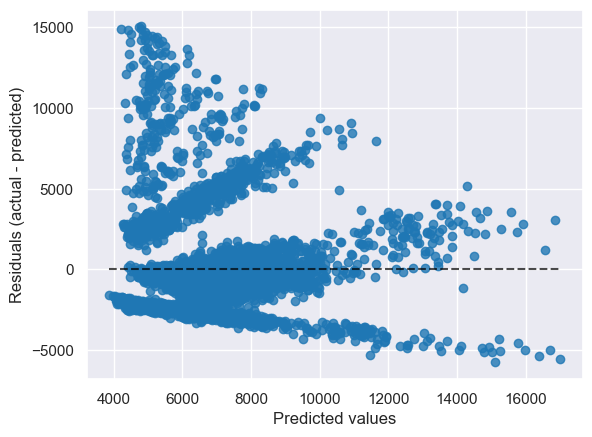

In [375]:
PredictionErrorDisplay(y_true = Y, y_pred = ols_pred_results).plot();

### Check Assumptions

#### Residual Analysis (should be normal distributed)

In [333]:
from scipy.stats import kstest
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import shapiro
from scipy.stats import normaltest

residual_linear_res = result_ols.resid

ks_statistic, ks_pvalue = kstest(residual_linear_res, 'norm')

if ks_pvalue > 0.05:
    print(f'P-Value: {ks_pvalue}. So, we assume a normal distribution')
else: 
    print(f'P-Value: {ks_pvalue}. So, we do not assume a normal distribution ❌')

lf_statistic, lf_pvalue = lilliefors(residual_linear_res)

if lf_pvalue > 0.05:
    print(f'P-Value: {lf_pvalue}. So, we assume a normal distribution')
else: 
    print(f'P-Value: {lf_pvalue}. So, we do not assume a normal distribution ❌')

sw_statistic, sw_pvalue = shapiro(residual_linear_res)

if sw_pvalue > 0.05:
    print(f'P-Value: {sw_pvalue}. So, we assume a normal distribution')
else: 
    print(f'P-Value: {sw_pvalue}. So, we do not assume a normal distribution ❌')

dp_statistic, df_pvalue = normaltest(residual_linear_res)

if df_pvalue > 0.05:
    print(f'P-Value: {df_pvalue}. So, we assume a normal distribution')
else: 
    print(f'P-Value: {df_pvalue}. So, we do not assume a normal distribution ❌')

skew_value = residual_linear_res.skew()
if skew_value > 0:
    print(f'skewness: {skew_value} - Right Skew -->')
else:
    print(f'skewness: {skew_value} - Left Skew <--')

P-Value: 0.0. So, we do not assume a normal distribution ❌
P-Value: 0.0009999999999998899. So, we do not assume a normal distribution ❌
P-Value: 7.338390063340404e-58. So, we do not assume a normal distribution ❌
P-Value: 0.0. So, we do not assume a normal distribution ❌
skewness: 1.7725020508397293 - Right Skew -->


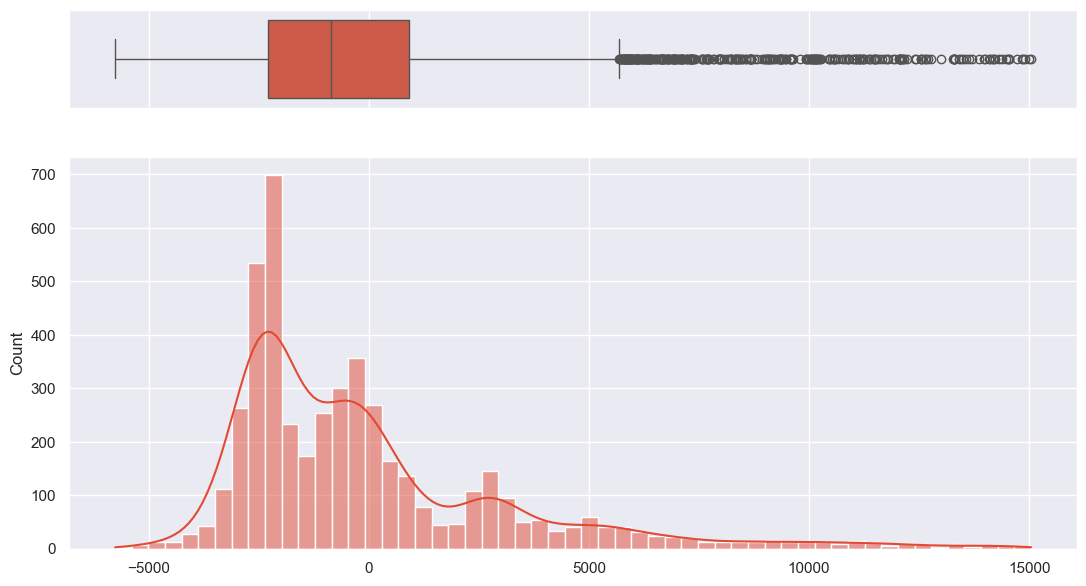

In [334]:
# normality assumption

# Set up the figure and axis
fig, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 0.8)}, figsize = (13,7))
# plt.figure(figsize = (7,7))

sns.set_context('notebook', font_scale=1)

# Add a boxplot on the top axis
sns.boxplot(x=result_ols.resid, ax=ax_box, orient='h')

# Add a histogram on the bottom axis
sns.histplot(result_ols.resid, kde=True, ax=ax_hist)
# plt.xlabel('Residual', fontsize=20);

# Remove x-axis labels from the boxplot for clarity
ax_box.set(xlabel='Residual')

# Show the plot
plt.show()

# plt.figure(figsize = (7,7))

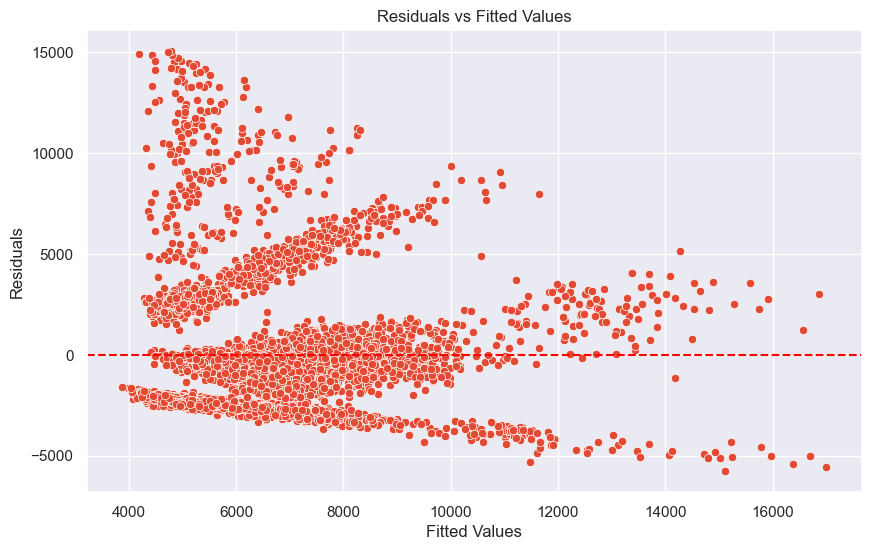

In [335]:
# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=result_ols.fittedvalues, y=result_ols.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

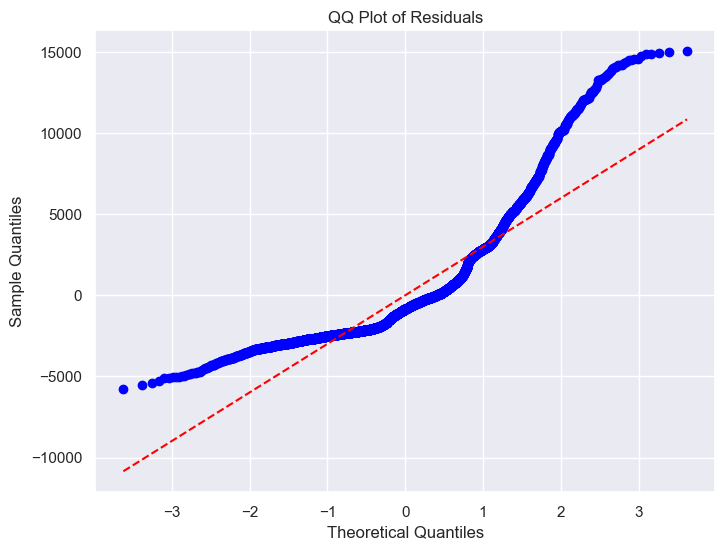

In [336]:
# # QQPlot

# sm.qqplot(result_ols.resid, line='45')
# plt.title('QQ Plot of Residuals')

# # Set the limits to zoom in
# plt.xlim(-4, 4)  # Zoom in on the x-axis (theoretical quantiles)
# # plt.ylim(12000, -24000) # Zoom in on the y-axis (sample quantiles)

# plt.show()

from scipy import stats

fig, ax = plt.subplots(figsize=(8, 6))

res = stats.probplot(result_ols.resid, dist="norm", plot=ax)

# Customizing the plot
ax.get_lines()[0].set_markerfacecolor('b')  # Change the color of the points
ax.get_lines()[1].set_color('r')            # Change the color of the line
ax.get_lines()[1].set_linestyle('--')       # Change the line style

ax.set_title('QQ Plot of Residuals')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Sample Quantiles')

plt.grid(True)
plt.show();

#### Multicollinearity check ✅

In [337]:
transform_results_df.columns

Index(['EmploymentStatus_Unemployed', 'Monthly Premium Auto',
       'Number of Policies', 'Education', 'Marital Status_Single',
       'Marital Status_Married', 'Total Claim Amount', 'Income',
       'EmploymentStatus_Medical Leave', 'EmploymentStatus_Employed',
       'Vehicle Class_Two-Door Car'],
      dtype='object')

In [167]:
# Multicollinearity check ✅

def calc_vif(X):
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

# num_processed = transform_results_df[['Number of Policies',
#        'Monthly Premium Auto', 'Total Claim Amount', 'Income',
#        'Number of Policies^2', 'Number of Policies Monthly Premium Auto',
#        'Number of Policies Total Claim Amount', 'Number of Policies Income',
#        'Monthly Premium Auto^2', 'Monthly Premium Auto Total Claim Amount',
#        'Monthly Premium Auto Income', 'Total Claim Amount^2',
#        'Total Claim Amount Income', 'Income^2']]
# calc_vif(num_processed)

calc_vif(transform_results_df[[
    'Number of Policies','Monthly Premium Auto', 'Total Claim Amount', 'Income'
]])

variables       VIF
0    Number of Policies  1.020455
1  Monthly Premium Auto  1.820411
2    Total Claim Amount  2.042783
3                Income  1.249924

In [168]:
calc_vif(transform_results_df)

variables        VIF
0         Vehicle Class_Luxury Car   6.853875
1         Vehicle Class_Luxury SUV   5.838071
2                Vehicle Class_SUV   8.288946
3         Vehicle Class_Sports Car   2.814273
4       Vehicle Class_Two-Door Car   1.389071
5        EmploymentStatus_Employed   7.996225
6   EmploymentStatus_Medical Leave   1.379389
7         EmploymentStatus_Retired   1.121545
8      EmploymentStatus_Unemployed   4.385820
9           Marital Status_Married   4.672065
10           Marital Status_Single   3.081299
11                       Education   2.428538
12                        Coverage   7.403107
13              Number of Policies   1.178820
14            Monthly Premium Auto  24.150845
15              Total Claim Amount   2.274355
16                          Income   3.085786

In [169]:
calc_vif(transform_results_df.drop(columns=[
    'EmploymentStatus_Retired', 'EmploymentStatus_Medical Leave',
    'EmploymentStatus_Unemployed','Vehicle Class_Luxury Car',
    'Marital Status_Single']))

variables       VIF
0     Vehicle Class_Luxury SUV  1.679769
1            Vehicle Class_SUV  2.085241
2     Vehicle Class_Sports Car  1.273286
3   Vehicle Class_Two-Door Car  1.333780
4    EmploymentStatus_Employed  4.721533
5       Marital Status_Married  2.473419
6                    Education  2.186958
7                     Coverage  2.238211
8           Number of Policies  1.161947
9         Monthly Premium Auto  4.336546
10          Total Claim Amount  2.098793
11                      Income  2.255865

### Insights on Linear Models

Based on the OLS method above we got the Adjusted R² score of below 50%, and it does not pass the assumptions to be using the linear models. Moreover, the linear models possibly not the best one to be used on this case, but later on, these models would still be compared to each other for evidence that it performs worst on this data.

### The List of Linear Models

| Model Name | Description | Point to Consider |
| --- | --- | --- |
| Linear Regression | A simple and widely used statistical method for predicting the value of a dependent variable (y) based on the value of one or more independent variables (x). The model assumes a linear relationship between the input variables and the output variable. | * Assumptions: Linearity, independence, homoscedasticity, normality of errors. <br>* Use: Basic predictive modeling and establishing relationships between variables. |
| Ridge Regression | A type of linear regression that includes a regularization term to prevent overfitting. It adds a penalty equivalent to the square of the magnitude of coefficients. | * Penalty: L2 norm (squared sum of coefficients). <br>* Use: When multicollinearity is present in the data. |
| Lasso Regression | (Least Absolute Shrinkage and Selection Operator) is a type of linear regression that performs both variable selection and regularization. It adds a penalty equivalent to the absolute value of the magnitude of coefficients. | * Penalty: L1 norm (sum of absolute values of coefficients). <br>* Use: When you need feature selection and regularization. |
| Huber Regression | A robust regression method that combines the properties of least squares and absolute error loss functions. It is less sensitive to outliers than standard linear regression. | * Loss Function: Huber loss, which is quadratic for small errors and linear for large errors. <br>* Use: When the data contains outliers. |
| TheilSen Regression | A robust method for linear regression that calculates the median of slopes of all possible pairs of points. It is less sensitive to outliers than ordinary least squares regression. | * Robustness: High resistance to outliers. <br>* Use: When the data contains outliers and is not normally distributed. |
| Quantile Regression | It estimates the conditional quantiles of the response variable, providing a more complete view of the possible outcomes. It is useful for understanding the distributional effects of predictors. | * Flexibility: Can model different quantiles (e.g., median, upper quartile). <br>* Use: When interested in different points of the outcome distribution. |
| RANSAC Regression | (RANdom SAmple Consensus) Regression is an iterative method for estimating parameters of a model that is robust to outliers. It fits the model to random subsets of the data and selects the best model based on consensus. | * Robustness: High resistance to outliers. <br>* Use: When the dataset contains a significant number of outliers. |

In [66]:
# define some linear models

linear_models = {
    'Linear Regression' : LinearRegression(n_jobs = -1),
    'Ridge Regression': Ridge(max_iter = 10_000, random_state = RANDOM_STATE),
    'Lasso Regression': Lasso(max_iter = 10_000, random_state = RANDOM_STATE),
    'Huber Regression': HuberRegressor(max_iter = 1000),
    'TheilSen Regression': TheilSenRegressor(max_iter = 1000, random_state = RANDOM_STATE),
    'Quantile Regression': QuantileRegressor(),
    'RANSAC Regression': RANSACRegressor(max_trials = 1000, random_state = RANDOM_STATE)
}

## Non-Linear Models

| Model Name | Description | Point to Consider |
| --- | --- | --- |
| Decision Tree Regression | A non-linear model that splits the data into subsets based on feature values to make predictions. Each split is chosen to maximize the reduction in variance in the target variable. | * Interpretability: Easy to interpret and visualize. <br>* Use: When relationships between features and target are non-linear. |
| Random Forest Regression | An ensemble method that combines multiple decision trees to improve prediction accuracy and control overfitting. Each tree is trained on a random subset of the data. | * Ensemble: Reduces variance and improves generalization. <br>* Use: When seeking robust and accurate predictions. |
| Gradient Boosting Regression | An ensemble technique that builds models sequentially, each one correcting the errors of the previous ones. It uses a gradient descent algorithm to minimize the loss function. | * Boosting: Sequentially improves model performance. <br>* Use: When high prediction accuracy is required. |
| K-Nearest Neighbors (KNN) Regression | A non-parametric method that predicts the target value based on the average of the k-nearest neighbors in the feature space. | * Simplicity: Easy to understand and implement. <br>* Use: When the relationship between features and target is highly non-linear. |
| Support Vector Machine (SVM) Regression | Also known as Support Vector Regression (SVR), aims to find a function that deviates from the true targets by a value no greater than a specified margin, and at the same time is as flat as possible. | * Margin-based: Balances model complexity and error tolerance. <br>* Use: When dealing with high-dimensional data. |
| Xtreme Gradient Boosting (XGBoost) Regression | An optimized implementation of gradient boosting that is designed to be highly efficient, flexible, and portable. It includes advanced regularization. | * Performance: High accuracy and speed. <br>* Use: When you need a powerful and scalable model. |
| Light Gradient-Boosting Machine (LGBM) Regression | A gradient boosting framework that uses tree-based learning algorithms. It is designed for efficiency and scalability. | * Efficiency: Faster training and lower memory usage. <br>* Use: When dealing with large datasets. |
| Multi Layer Perceptron (MLP) Regression | A type of neural network that consists of multiple layers of neurons. It can model complex relationships between inputs and outputs. | * Flexibility: Can model complex non-linear relationships. <br>* Use: When the data has a complex, non-linear structure. |

In [67]:
# _SCORERS
# RANDOM_STATE
# define some non-linear models

non_linear_models = {
    'Decision Tree Regression': DecisionTreeRegressor(criterion = 'absolute_error', random_state = RANDOM_STATE),
    'Random Forest Regression': RandomForestRegressor(criterion = 'absolute_error', random_state = RANDOM_STATE),
    'Gradient Boosting Regression': GradientBoostingRegressor(loss = 'absolute_error', random_state = RANDOM_STATE),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(n_jobs = -1),
    'Suppor Vector Machine Regression': SVR(),
    'Xtreme Gradient Boosting Regression': XGBRegressor(random_state = RANDOM_STATE, n_jobs = -1),
    'Light Gradient-Boosting Machine Regression': LGBMRegressor(boosting_type = 'gbdt', random_state = RANDOM_STATE, n_jobs = -1, force_col_wise=True),
    'Multi Layer Perceptron Regression': MLPRegressor(learning_rate = 'invscaling', random_state = RANDOM_STATE)
}

# 8. Evaluation of the Model

In [68]:
# Combine the two type models

all_models = linear_models.copy()
all_models.update(non_linear_models)
all_models

{'Linear Regression': LinearRegression(n_jobs=-1),
 'Ridge Regression': Ridge(max_iter=10000, random_state=233),
 'Lasso Regression': Lasso(max_iter=10000, random_state=233),
 'Huber Regression': HuberRegressor(max_iter=1000),
 'TheilSen Regression': TheilSenRegressor(max_iter=1000, random_state=233),
 'Quantile Regression': QuantileRegressor(),
 'RANSAC Regression': RANSACRegressor(max_trials=1000, random_state=233),
 'Decision Tree Regression': DecisionTreeRegressor(criterion='absolute_error', random_state=233),
 'Random Forest Regression': RandomForestRegressor(criterion='absolute_error', random_state=233),
 'Gradient Boosting Regression': GradientBoostingRegressor(loss='absolute_error', random_state=233),
 'K-Nearest Neighbors Regression': KNeighborsRegressor(n_jobs=-1),
 'Suppor Vector Machine Regression': SVR(),
 'Xtreme Gradient Boosting Regression': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
         

## Cross Validation on Train & Eval on Test Data

In [69]:
features_selected, list_features

(array(['EmploymentStatus_Unemployed', 'Monthly Premium Auto',
        'Number of Policies', 'Education', 'Marital Status_Single',
        'Marital Status_Married', 'Total Claim Amount', 'Income',
        'EmploymentStatus_Medical Leave', 'EmploymentStatus_Employed',
        'Vehicle Class_Two-Door Car'], dtype=object),
 ['Vehicle Class_Luxury Car',
  'Vehicle Class_Luxury SUV',
  'Vehicle Class_SUV',
  'Vehicle Class_Sports Car',
  'Vehicle Class_Two-Door Car',
  'EmploymentStatus_Employed',
  'EmploymentStatus_Medical Leave',
  'EmploymentStatus_Retired',
  'EmploymentStatus_Unemployed',
  'Marital Status_Married',
  'Marital Status_Single',
  'Education',
  'Coverage',
  'Number of Policies',
  'Monthly Premium Auto',
  'Total Claim Amount',
  'Income'])

In [377]:
# define the fold for cross validation
kfold_cv = KFold(n_splits = 5, shuffle=True, random_state = RANDOM_STATE)

def get_model_size(model):
    """Return the size of the model in bytes."""
    return sys.getsizeof(pickle.dumps(model))

# selected features based on the RFECV before
features_selected = [
    'EmploymentStatus_Unemployed', 'Monthly Premium Auto',
    'Number of Policies', 'Education', 'Marital Status_Single',
    'Marital Status_Married', 'Total Claim Amount', 'Income',
    'EmploymentStatus_Medical Leave', 'EmploymentStatus_Employed',
    'Vehicle Class_Two-Door Car'
]

# full features after transformer preprocess
list_features = [
    'Vehicle Class_Luxury Car', 'Vehicle Class_Luxury SUV', 'Vehicle Class_SUV',
    'Vehicle Class_Sports Car', 'Vehicle Class_Two-Door Car', 'EmploymentStatus_Employed',
    'EmploymentStatus_Medical Leave', 'EmploymentStatus_Retired', 'EmploymentStatus_Unemployed',
    'Marital Status_Married', 'Marital Status_Single', 'Education', 'Coverage',
    'Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income'
]

# drop for multicollinearity
dropped_cols = [
    'EmploymentStatus_Retired', 'EmploymentStatus_Medical Leave',
    'EmploymentStatus_Unemployed','Vehicle Class_Luxury Car',
    'Marital Status_Single']

# define an evaluation metric - TRAIN, VAL Data
adjusted_r2_cross_mean, mape_cross_mean = [], []
adjusted_r2_cross_std, mape_cross_std = [], []
adjusted_r2_cross_all, mape_cross_all = [], []
fit_cross_time, test_score_time = [], []
cross_val_time = []
model_train_name = []

# looping for performance
for name, model in all_models.items():
    if name in linear_models.keys():
        transformer_choosen = transformer
    else:
        transformer_choosen = transformer_tree

    pipeline_model = Pipeline(steps=[
            ('transformer', transformer_choosen),
            ('selector', ColumnSelector(columns = features_selected)),
            ('regressor', model)
        ])

    # pipeline_model.named_steps['selector'].set_feature_names(list_features)
    # pipeline_model = set_feature_names_in_selector(pipeline_model, X_train)
    
    start_time_cross = time.time()
    # find the best model - train cross val
    model_cv = cross_validate(
        pipeline_model,
        X_train,
        # transform_X_train_df.drop(columns=dropped_cols),
        y_train,
        cv = kfold_cv,
        # scoring = 'r2',
        scoring = {
            'adjusted_r2': adjusted_r2,
            # 'mean_absolute_percentage_error': make_scorer(mean_absolute_percentage_error, greater_is_better=False),
            'mean_absolute_percentage_error': 'neg_mean_absolute_percentage_error'
        },
        error_score = 'raise'
    )
    end_time_cross = time.time()
    execution_time_cross = end_time_cross - start_time_cross

    adjusted_r2_cross_mean.append(model_cv['test_adjusted_r2'].mean())
    adjusted_r2_cross_std.append(model_cv['test_adjusted_r2'].std())
    # metrics_cross_all.append(model_cv.round(4))

    mape_cross_mean.append(model_cv['test_mean_absolute_percentage_error'].mean())
    mape_cross_std.append(model_cv['test_mean_absolute_percentage_error'].std())


    fit_cross_time.append(model_cv['fit_time'])
    test_score_time.append(model_cv['score_time'])
    cross_val_time.append(execution_time_cross)
    # model_train_name.append(pipeline_model[1].__class__.__name__)
    model_train_name.append(name)
    # model_train_name.append(model.__class__.__name__)

# On Test Data (Score)
# evaluation
adjusted_r2_test_score_list, mape_test_score_list = [], []
model_test_name = []
model_test_size = []
predict_time = []

# On Test Data (Score)
for name, model in all_models.items():
    if name in linear_models.keys():
        transformer_choosen = transformer
    else:
        transformer_choosen = transformer_tree

    pipeline_model = Pipeline(steps=[
            ('transformer', transformer_choosen),
            ('selector', ColumnSelector(columns = features_selected)),
            ('regressor', model)
        ])

    # pipeline_model.named_steps['selector'].set_feature_names(list_features)
    # pipeline_model = set_feature_names_in_selector(pipeline_model, X_train)
    
    # pipeline_model = model
    start_time_test = time.time()
    # fitting
    pipeline_model.fit(X_train, y_train)
    # pipeline_model.fit(train_smote_res.drop(columns='Customer Lifetime Value'), train_smote_res['Customer Lifetime Value'])
    # model.fit(transform_X_train_df.drop(columns=dropped_cols), y_train)

    # Measure the model size
    model_size = get_model_size(pipeline_model)
    model_test_size.append(model_size)

    # model predict
    y_pred_test = pipeline_model.predict(X_test)
    # y_pred_test = pipeline_model.predict(transform_X_test_df)
    # y_pred_test = model.predict(transform_X_test_df.drop(columns=dropped_cols))

    end_time_test = time.time()
    execution_time_test = end_time_test - start_time_test

    # evaluate
    adjusted_r2_test_score = adjusted_r2_score(y_test, y_pred_test, X_test)
    adjusted_r2_test_score_list.append(adjusted_r2_test_score)

    mape_test_score = mean_absolute_percentage_error(y_test, y_pred_test)
    mape_test_score_list.append(mape_test_score)

    predict_time.append(execution_time_test)
    # model_test_name.append(pipeline_model[1].__class__.__name__)
    model_test_name.append(name)
        # model_test_name.append(model.__class__.__name__)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 653
[LightGBM] [Info] Number of data points in the train set: 3025, number of used features: 11
[LightGBM] [Info] Start training from score 6622.958973
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 652
[LightGBM] [Info] Number of data points in the train set: 3025, number of used features: 11
[LightGBM] [Info] Start training from score 6633.824860
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 654
[LightGBM] [Info] Number of data points in the train set: 3026, number of used features: 11
[LightGBM] [Info] Start training from score 6675.410609
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 654
[LightGBM] [Info] Number of data points in the train set: 3026, number of used features: 11
[LightGBM] [

## Benchmark Base Models Performance Comparison

In [171]:
# show the output
r2_val_rounded = np.array([round(i * 100, 2) for i in adjusted_r2_cross_mean])
r2_test_rounded = np.array([round(i * 100, 2) for i in adjusted_r2_test_score_list])
mape_val_rounded = np.array([round(abs(i) * 100, 2) for i in mape_cross_mean])
mape_test_rounded = np.array([round(i * 100, 2) for i in mape_test_score_list])
fit_time_total = np.array([np.sum(i) for i in fit_cross_time])
test_score_time_total = np.array([np.sum(i) for i in test_score_time])

# save the evaluation result as dataframe
eval_results = pd.DataFrame({
    'Model Name': model_train_name,
    'Adjusted R2 Validation Mean (%)': r2_val_rounded,
    'Adjusted R2 Test Score (%)': r2_test_rounded,
    'Adjusted R2 Difference': r2_test_rounded - r2_val_rounded,
    'MAPE Validation Mean (%)': mape_val_rounded,
    'MAPE Test Score (%)': mape_test_rounded,
    'MAPE Difference': -(mape_test_rounded - mape_val_rounded),
    # 'std': adjusted_r2_cross_std,
    # 'all RMSE value': metrics_cross_all,
    # 'Model Test': model_test_name,
    # 'Computation Time (second)': cross_val_time,
    'Computation Time (second)': fit_time_total + test_score_time_total + np.array(predict_time),
    'Model Size (MB)': [round(i/1_000_000, 4) for i in model_test_size]
})

eval_results = eval_results.sort_values(by=['Adjusted R2 Test Score (%)', 'Adjusted R2 Difference'], ascending = [False, True], key=abs, ignore_index=True)
eval_results.index = np.array([str(i+1) + '} ' for i in eval_results.index]) + eval_results['Model Name']
eval_results.iloc[:, 1:]

Adjusted R2 Validation Mean (%)  \
Model Name                                                                       
1} Xtreme Gradient Boosting Regression                                   81.25   
2} Gradient Boosting Regression                                          82.48   
3} Light Gradient-Boosting Machine Regression                            82.99   
4} Random Forest Regression                                              82.87   
5} Decision Tree Regression                                              67.63   
6} K-Nearest Neighbors Regression                                        29.40   
7} Lasso Regression                                                      22.43   
8} Ridge Regression                                                      22.41   
9} Linear Regression                                                     22.38   
10} TheilSen Regression                                                  21.91   
11} Huber Regression                                                     15.10   
12} Multi Layer Perceptron Regression                                     5.96   
13} Quantile Regression                                                  -8.36   
14} Suppor Vector Machine Regression                                     -7.19   
15} RANSAC Regression                                                     2.41   

                                               Adjusted R2 Test Score (%)  \
Model Name                                                                  
1} Xtreme Gradient Boosting Regression                              85.93   
2} Gradient Boosting Regression                                     85.89   
3} Light Gradient-Boosting Machine Regression                       85.81   
4} Random Forest Regression                                         85.34   
5} Decision Tree Regression                                         71.72   
6} K-Nearest Neighbors Regression                                   36.96   
7} Lasso Regression                                                 28.37   
8} Ridge Regression                                                 28.36   
9} Linear Regression                                                28.36   
10} TheilSen Regression                                             27.97   
11} Huber Regression                                                20.80   
12} Multi Layer Perceptron Regression                               12.64   
13} Quantile Regression                                             -9.87   
14} Suppor Vector Machine Regression                                -8.22   
15} RANSAC Regression                                                3.44   

                                               Adjusted R2 Difference  \
Model Name                                                              
1} Xtreme Gradient Boosting Regression                           4.68   
2} Gradient Boosting Regression                                  3.41   
3} Light Gradient-Boosting Machine Regression                    2.82   
4} Random Forest Regression                                      2.47   
5} Decision Tree Regression                                      4.09   
6} K-Nearest Neighbors Regression                                7.56   
7} Lasso Regression                                              5.94   
8} Ridge Regression                                              5.95   
9} Linear Regression                                             5.98   
10} TheilSen Regression                                          6.06   
11} Huber Regression                                             5.70   
12} Multi Layer Perceptron Regression                            6.68   
13} Quantile Regression                                         -1.51   
14} Suppor Vector Machine Regression                            -1.03   
15} RANSAC Regression                                            1.03   

                                               MAPE Validation Mean (%)  \
Model Name               

In [378]:
# show the output
r2_val_rounded = np.array([round(i * 100, 2) for i in adjusted_r2_cross_mean])
r2_test_rounded = np.array([round(i * 100, 2) for i in adjusted_r2_test_score_list])
mape_val_rounded = np.array([round(abs(i) * 100, 2) for i in mape_cross_mean])
mape_test_rounded = np.array([round(i * 100, 2) for i in mape_test_score_list])
fit_time_total = np.array([np.sum(i) for i in fit_cross_time])
test_score_time_total = np.array([np.sum(i) for i in test_score_time])

# save the evaluation result as dataframe
eval_results = pd.DataFrame({
    'Model Name': model_train_name,
    'Adjusted R2 Validation Mean (%)': r2_val_rounded,
    'Adjusted R2 Test Score (%)': r2_test_rounded,
    'Adjusted R2 Difference': r2_test_rounded - r2_val_rounded,
    'MAPE Validation Mean (%)': mape_val_rounded,
    'MAPE Test Score (%)': mape_test_rounded,
    'MAPE Difference': -(mape_test_rounded - mape_val_rounded),
    # 'std': adjusted_r2_cross_std,
    # 'all RMSE value': metrics_cross_all,
    # 'Model Test': model_test_name,
    # 'Computation Time (second)': cross_val_time,
    'Computation Time (second)': fit_time_total + test_score_time_total + np.array(predict_time),
    'Model Size (MB)': [round(i/1_000_000, 4) for i in model_test_size]
})

eval_results = eval_results.sort_values(by=['Adjusted R2 Test Score (%)', 'Adjusted R2 Difference'], ascending = [False, True], key=abs, ignore_index=True)
eval_results.index = np.array([str(i+1) + '} ' for i in eval_results.index]) + eval_results['Model Name']
eval_results.iloc[:, 1:]

Adjusted R2 Validation Mean (%)  \
Model Name                                                                       
1} Light Gradient-Boosting Machine Regression                            83.17   
2} Xtreme Gradient Boosting Regression                                   81.12   
3} Random Forest Regression                                              82.84   
4} Gradient Boosting Regression                                          82.65   
5} Decision Tree Regression                                              69.10   
6} Lasso Regression                                                      22.36   
7} Ridge Regression                                                      22.35   
8} Linear Regression                                                     22.34   
9} TheilSen Regression                                                   20.66   
10} Multi Layer Perceptron Regression                                    18.22   
11} Huber Regression                                                     15.35   
12} RANSAC Regression                                                    -0.29   
13} Suppor Vector Machine Regression                                     -8.44   
14} Quantile Regression                                                  -8.36   
15} K-Nearest Neighbors Regression                                       -7.17   

                                               Adjusted R2 Test Score (%)  \
Model Name                                                                  
1} Light Gradient-Boosting Machine Regression                       86.07   
2} Xtreme Gradient Boosting Regression                              85.70   
3} Random Forest Regression                                         85.42   
4} Gradient Boosting Regression                                     85.12   
5} Decision Tree Regression                                         72.53   
6} Lasso Regression                                                 28.78   
7} Ridge Regression                                                 28.78   
8} Linear Regression                                                28.78   
9} TheilSen Regression                                              26.62   
10} Multi Layer Perceptron Regression                               25.50   
11} Huber Regression                                                21.59   
12} RANSAC Regression                                               10.60   
13} Suppor Vector Machine Regression                               -10.01   
14} Quantile Regression                                             -9.87   
15} K-Nearest Neighbors Regression                                  -1.37   

                                               Adjusted R2 Difference  \
Model Name                                                              
1} Light Gradient-Boosting Machine Regression                    2.90   
2} Xtreme Gradient Boosting Regression                           4.58   
3} Random Forest Regression                                      2.58   
4} Gradient Boosting Regression                                  2.47   
5} Decision Tree Regression                                      3.43   
6} Lasso Regression                                              6.42   
7} Ridge Regression                                              6.43   
8} Linear Regression                                             6.44   
9} TheilSen Regression                                           5.96   
10} Multi Layer Perceptron Regression                            7.28   
11} Huber Regression                                             6.24   
12} RANSAC Regression                                           10.89   
13} Suppor Vector Machine Regression                            -1.57   
14} Quantile Regression                                         -1.51   
15} K-Nearest Neighbors Regression                               5.80   

                                               MAPE Validation Mean (%)  \
Model Name               

## Insights on Evaluation

Based on the results, the top two models to passthorugh in to the Hyperparameter Tuning Process:
* Xtreme Gradient Boosting Regressor (XGBoost) -> The one with the best metrics result (R2 & MAPE).
* Light Gradient-Boosting Machine Regression (LGBM) -> The one with the most stable between validation & test result (The least value of Difference "2.82" {on R2} and "0.34" {on MAPE}.

## Tuning Two Best Models

### Gradient Boosting

In [107]:
# Define the parameter grid for RandomizedSearchCV
param_spaces_gb = {
    'gboost_regressor__n_estimators': np.arange(100, 701, 50),  # Number of trees
    'gboost_regressor__learning_rate': list(np.arange(1, 100)/100),   # Number of features to consider at every split
    'gboost_regressor__max_depth': np.arange(1, 111, 10).tolist(),  # Maximum depth of the tree
    'gboost_regressor__subsample': list(np.arange(2, 10)/10),   # Minimum number of samples required to split a node
    'gboost_regressor__gamma': np.arange(1, 21),    # Minimum number of samples required at each leaf node
    'gboost_regressor__colsample_bytree': list(np.arange(1, 10)/10),
    'gboost_regressor__reg_alpha': list(np.logspace(-3, 1, 10))                 # Whether bootstrap samples are used when building trees
}

param_spaces_gb = {
    'gboost_regressor__n_estimators': Integer(50, 500),
    'gboost_regressor__max_depth': Integer(3, 10),
    'gboost_regressor__learning_rate': Real(0.01, 0.3, 'log-uniform'),
    'gboost_regressor__subsample': Real(0.6, 1.0),
    'gboost_regressor__min_samples_split': Integer(2, 20),
    'gboost_regressor__min_samples_leaf': Integer(1, 20),
    'gboost_regressor__loss' : ['absolute_error', 'huber', 'squared_error', 'quantile']
}

kfold_cv = KFold(n_splits = 5, shuffle = True, random_state = RANDOM_STATE)

pipe_gb = Pipeline(steps=[
        ('transformer', transformer),
        ('gboost_regressor', GradientBoostingRegressor(random_state = RANDOM_STATE))
    ])

# Initialize RandomizedSearchCV with the parameter grid
random_search_gb = RandomizedSearchCV(
    estimator = pipe_gb,
    param_distributions = param_spaces_gb,
    n_iter = 25,
    scoring = adjusted_r2,
    cv = kfold_cv,
    random_state = RANDOM_STATE
)

# Initialize BayesSearchCV
bayes_search_gb = BayesSearchCV(
    estimator = pipe_gb,
    search_spaces = param_spaces_gb,
    n_iter = 25,
    scoring = adjusted_r2,
    cv = kfold_cv,
    random_state = RANDOM_STATE
)

# Fit RandomizedSearchCV to the training data
bayes_search_gb.fit(X_train, y_train)

BayesSearchCV(cv=KFold(n_splits=5, random_state=233, shuffle=True),
              estimator=Pipeline(steps=[('transformer',
                                         ColumnTransformer(transformers=[('onehot_encoding',
                                                                          OneHotEncoder(drop='first',
                                                                                        dtype=<class 'int'>),
                                                                          ['Vehicle '
                                                                           'Class',
                                                                           'EmploymentStatus',
                                                                           'Marital '
                                                                           'Status']),
                                                                         ('ordinal_encoding',
                                                                          OrdinalEncoder(categories=[['High '
                                                                                                      'School '
                                                                                                      'or '
                                                                                                      'Below',
                                                                                                      'College',
                                                                                                      'Bach...
                             'gboost_regressor__min_samples_leaf': Integer(low=1, high=20, prior='uniform', transform='normalize'),
                             'gboost_regressor__min_samples_split': Integer(low=2, high=20, prior='uniform', transform='normalize'),
                             'gboost_regressor__n_estimators': Integer(low=50, high=500, prior='uniform', transform='normalize'),
                             'gboost_regressor__subsample': Real(low=0.6, high=1.0, prior='uniform', transform='normalize')})

In [122]:
# best score
print(f'Best Adjusted R2 Score in Train-Val : {bayes_search_gb.best_score_ * 100:.3f}')
# best n_neighbors
print(f'BEST Params in Train-Val : {bayes_search_gb.best_params_}')

Best Adjusted R2 Score in Train-Val : 69.053
BEST Params in Train-Val : OrderedDict({'gboost_regressor__learning_rate': 0.019196213941271224, 'gboost_regressor__loss': 'squared_error', 'gboost_regressor__max_depth': 3, 'gboost_regressor__min_samples_leaf': 20, 'gboost_regressor__min_samples_split': 2, 'gboost_regressor__n_estimators': 334, 'gboost_regressor__subsample': 0.6})


In [108]:
# best score
print(f'Best Adjusted R2 Score in Train-Val : {bayes_search_gb.best_score_ * 100:.3f}')
# best n_neighbors
print(f'BEST Params in Train-Val : {bayes_search_gb.best_params_}')

Best Adjusted R2 Score in Train-Val : 74.459
BEST Params in Train-Val : OrderedDict({'gboost_regressor__learning_rate': 0.02022336464211353, 'gboost_regressor__loss': 'squared_error', 'gboost_regressor__max_depth': 3, 'gboost_regressor__min_samples_leaf': 4, 'gboost_regressor__min_samples_split': 20, 'gboost_regressor__n_estimators': 500, 'gboost_regressor__subsample': 1.0})


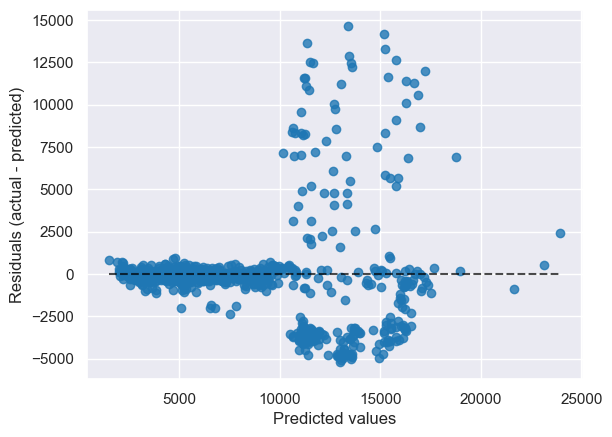

In [110]:
y_pred_gb_tuned = bayes_search_gb.predict(X_test)
PredictionErrorDisplay(y_true=y_test, y_pred=y_pred_gb_tuned).plot();

### Random Forest

In [111]:
# Define the parameter grid for BayesSearchCV
param_spaces_rf = {
    'randomforest_regressor__n_estimators': Integer(50, 500),
    'randomforest_regressor__max_depth': Integer(3, 30),
    'randomforest_regressor__min_samples_split': Integer(2, 20),
    'randomforest_regressor__min_samples_leaf': Integer(1, 20),
    'randomforest_regressor__max_features': ['sqrt', 'log2', None],
    'randomforest_regressor__criterion': ['squared_error', 'absolute_error', 'poisson', 'friedman_mse'],
    'randomforest_regressor__bootstrap': [True, False]
}

kfold_cv = KFold(n_splits = 5, shuffle = True, random_state = RANDOM_STATE)

pipe_rf = Pipeline(steps=[
        ('transformer', transformer),
        ('randomforest_regressor', RandomForestRegressor(random_state = RANDOM_STATE, n_jobs = -1))
    ])

# Initialize BayesSearchCV
bayes_search_rf = BayesSearchCV(
    estimator = pipe_rf,
    search_spaces = param_spaces_rf,
    n_iter = 25,
    scoring = adjusted_r2,
    cv = kfold_cv,
    random_state = RANDOM_STATE
)

# Fit RandomizedSearchCV to the training data
bayes_search_rf.fit(X_train, y_train)

BayesSearchCV(cv=KFold(n_splits=5, random_state=233, shuffle=True),
              estimator=Pipeline(steps=[('transformer',
                                         ColumnTransformer(transformers=[('onehot_encoding',
                                                                          OneHotEncoder(drop='first',
                                                                                        dtype=<class 'int'>),
                                                                          ['Vehicle '
                                                                           'Class',
                                                                           'EmploymentStatus',
                                                                           'Marital '
                                                                           'Status']),
                                                                         ('ordinal_encoding',
                                                                          OrdinalEncoder(categories=[['High '
                                                                                                      'School '
                                                                                                      'or '
                                                                                                      'Below',
                                                                                                      'College',
                                                                                                      'Bach...
                             'randomforest_regressor__max_features': ['sqrt',
                                                                      'log2',
                                                                      None],
                             'randomforest_regressor__min_samples_leaf': Integer(low=1, high=20, prior='uniform', transform='normalize'),
                             'randomforest_regressor__min_samples_split': Integer(low=2, high=20, prior='uniform', transform='normalize'),
                             'randomforest_regressor__n_estimators': Integer(low=50, high=500, prior='uniform', transform='normalize')})

In [126]:
# best score
print(f'Best Adjusted R2 Score in Train-Val : {bayes_search_rf.best_score_ * 100:.3f}')
# best n_neighbors
print(f'BEST Params in Train-Val : {bayes_search_rf.best_params_}')

Best Adjusted R2 Score in Train-Val : 68.586
BEST Params in Train-Val : OrderedDict({'randomforest_regressor__bootstrap': True, 'randomforest_regressor__criterion': 'poisson', 'randomforest_regressor__max_depth': 5, 'randomforest_regressor__max_features': None, 'randomforest_regressor__min_samples_leaf': 1, 'randomforest_regressor__min_samples_split': 11, 'randomforest_regressor__n_estimators': 475})


In [112]:
# best score
print(f'Best Adjusted R2 Score in Train-Val : {bayes_search_rf.best_score_ * 100:.3f}')
# best n_neighbors
print(f'BEST Params in Train-Val : {bayes_search_rf.best_params_}')

Best Adjusted R2 Score in Train-Val : 74.202
BEST Params in Train-Val : OrderedDict({'randomforest_regressor__bootstrap': True, 'randomforest_regressor__criterion': 'poisson', 'randomforest_regressor__max_depth': 5, 'randomforest_regressor__max_features': None, 'randomforest_regressor__min_samples_leaf': 1, 'randomforest_regressor__min_samples_split': 11, 'randomforest_regressor__n_estimators': 475})


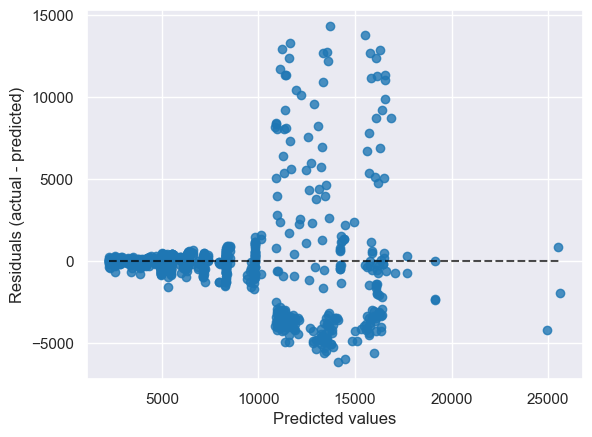

In [113]:
y_pred_rf_tuned = bayes_search_rf.predict(X_test)
PredictionErrorDisplay(y_true=y_test, y_pred=y_pred_rf_tuned).plot();

### LGBM

In [379]:
# Define the parameter grid for RandomizedSearchCV
param_spaces_lgbm = {
    'lightgbm_regressor__num_leaves': Integer(20, 50),
    'lightgbm_regressor__max_depth': Integer(5, 15),
    'lightgbm_regressor__learning_rate': Real(0.01, 0.3, 'log-uniform'),
    'lightgbm_regressor__n_estimators': Integer(50, 500),
    'lightgbm_regressor__min_child_samples': Integer(10, 50),
    'lightgbm_regressor__subsample': Real(0.6, 1.0),
    'lightgbm_regressor__colsample_bytree': Real(0.6, 1.0),
    'lightgbm_regressor__reg_alpha': Real(0, 10),
    'lightgbm_regressor__reg_lambda': Real(0, 10),
    # 'lightgbm_regressor__boosting_type': ['gbdt', 'rf', 'dart']
}

kfold_cv = KFold(n_splits = 5, shuffle = True, random_state = RANDOM_STATE)

pipe_lgbm = Pipeline(steps=[
        ('transformer', transformer_tree),
        ('selector', ColumnSelector(columns = features_selected)),
        ('lightgbm_regressor', LGBMRegressor(random_state = RANDOM_STATE, n_jobs = -1, force_col_wise = True, verbose = 0))
    ])

# Initialize BayesSearchCV
bayes_search_lgbm = BayesSearchCV(
    estimator = pipe_lgbm,
    search_spaces = param_spaces_lgbm,
    n_iter = 50,
    scoring = adjusted_r2,
    cv = kfold_cv,
    random_state = RANDOM_STATE
)

# Fit RandomizedSearchCV to the training data
bayes_search_lgbm.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

BayesSearchCV(cv=KFold(n_splits=5, random_state=233, shuffle=True),
              estimator=Pipeline(steps=[('transformer',
                                         ColumnTransformer(transformers=[('nominal_preprocess',
                                                                          Pipeline(steps=[('imputer_mode',
                                                                                           SimpleImputer(add_indicator=True,
                                                                                                         strategy='most_frequent')),
                                                                                          ('onehot_encoding',
                                                                                           OneHotEncoder(drop='first',
                                                                                                         dtype=<class 'int'>))]),
                                                                          ['Vehicle '
                                                                           'Class',
                                                                           'Employment...
                             'lightgbm_regressor__num_leaves': Integer(low=20, high=50, prior='uniform', transform='normalize'),
                             'lightgbm_regressor__reg_alpha': Real(low=0, high=10, prior='uniform', transform='normalize'),
                             'lightgbm_regressor__reg_lambda': Real(low=0, high=10, prior='uniform', transform='normalize'),
                             'lightgbm_regressor__subsample': Real(low=0.6, high=1.0, prior='uniform', transform='normalize')})

In [380]:
# best score
print(f'Best Adjusted R2 Score in Train-Val : {bayes_search_lgbm.best_score_ * 100:.3f}')
# best Parameters
print(f'BEST Params in Train-Val : {bayes_search_lgbm.best_params_}')

Best Adjusted R2 Score in Train-Val : 85.146
BEST Params in Train-Val : OrderedDict({'lightgbm_regressor__colsample_bytree': 1.0, 'lightgbm_regressor__learning_rate': 0.04355833691144516, 'lightgbm_regressor__max_depth': 5, 'lightgbm_regressor__min_child_samples': 50, 'lightgbm_regressor__n_estimators': 128, 'lightgbm_regressor__num_leaves': 39, 'lightgbm_regressor__reg_alpha': 3.4081460276464117, 'lightgbm_regressor__reg_lambda': 10.0, 'lightgbm_regressor__subsample': 1.0})


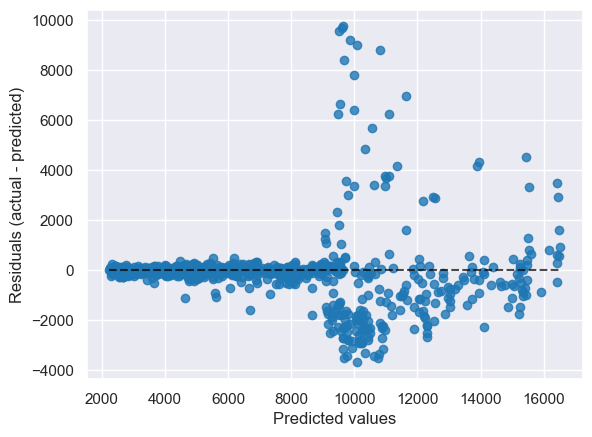

In [381]:
y_pred_lgbm_tuned = bayes_search_lgbm.predict(X_test)
PredictionErrorDisplay(y_true=y_test, y_pred=y_pred_lgbm_tuned).plot();

> There might be quite problem for the model to predict CLV around 8,000 to 14,000 as shown from the graph above, they tend to move away from the zero line of error. The most error itself centered around CLV 10,000.

### XGBoost

In [70]:
# Define the parameter grid for RandomizedSearchCV
param_spaces_xgb = {
    'xgboost_regressor__n_estimators': np.arange(100, 701, 50),  # Number of trees
    'xgboost_regressor__learning_rate': list(np.arange(1, 100)/100),   # Number of features to consider at every split
    'xgboost_regressor__max_depth': np.arange(1, 111, 10).tolist(),  # Maximum depth of the tree
    'xgboost_regressor__subsample': list(np.arange(2, 10)/10),   # Minimum number of samples required to split a node
    'xgboost_regressor__gamma': np.arange(1, 21),    # Minimum number of samples required at each leaf node
    'xgboost_regressor__colsample_bytree': list(np.arange(1, 10)/10),
    'xgboost_regressor__reg_alpha': list(np.logspace(-3, 1, 10))                 # Whether bootstrap samples are used when building trees
}

param_spaces_xgb = {
    'xgboost_regressor__n_estimators': Integer(50, 500),
    'xgboost_regressor__max_depth': Integer(3, 10),
    'xgboost_regressor__learning_rate': Real(0.01, 0.3, 'log-uniform'),
    'xgboost_regressor__subsample': Real(0.6, 1.0),
    'xgboost_regressor__colsample_bytree': Real(0.6, 1.0),
    'xgboost_regressor__gamma': Real(0, 10),
    'xgboost_regressor__reg_alpha': Real(0, 10),
    'xgboost_regressor__reg_lambda': Real(0, 10)
}

kfold_cv = KFold(n_splits = 5, shuffle = True, random_state = RANDOM_STATE)

pipe_xgb = Pipeline(steps=[
        ('transformer', transformer_tree),
        ('selector', ColumnSelector(columns = features_selected)),
        ('xgboost_regressor', XGBRegressor(random_state = RANDOM_STATE, n_jobs = -1))
    ])

# Initialize RandomizedSearchCV with the parameter grid
random_search_xgb = RandomizedSearchCV(
    estimator = pipe_xgb,
    param_distributions = param_spaces_xgb,
    n_iter = 25,
    scoring = adjusted_r2,
    cv = kfold_cv,
    random_state = RANDOM_STATE
)

# Initialize BayesSearchCV
bayes_search_xgb = BayesSearchCV(
    estimator = pipe_xgb,
    search_spaces = param_spaces_xgb,
    n_iter = 50,
    scoring = adjusted_r2,
    cv = kfold_cv,
    random_state = RANDOM_STATE
)

# Fit RandomizedSearchCV to the training data
bayes_search_xgb.fit(X_train, y_train)

BayesSearchCV(cv=KFold(n_splits=5, random_state=233, shuffle=True),
              estimator=Pipeline(steps=[('transformer',
                                         ColumnTransformer(transformers=[('nominal_preprocess',
                                                                          Pipeline(steps=[('imputer_mode',
                                                                                           SimpleImputer(add_indicator=True,
                                                                                                         strategy='most_frequent')),
                                                                                          ('onehot_encoding',
                                                                                           OneHotEncoder(drop='first',
                                                                                                         dtype=<class 'int'>))]),
                                                                          ['Vehicle '
                                                                           'Class',
                                                                           'Employment...
                             'xgboost_regressor__n_estimators': Integer(low=50, high=500, prior='uniform', transform='normalize'),
                             'xgboost_regressor__reg_alpha': Real(low=0, high=10, prior='uniform', transform='normalize'),
                             'xgboost_regressor__reg_lambda': Real(low=0, high=10, prior='uniform', transform='normalize'),
                             'xgboost_regressor__subsample': Real(low=0.6, high=1.0, prior='uniform', transform='normalize')})

In [71]:
# best score
print(f'Best Adjusted R2 Score in Train-Val : {random_search_xgb.best_score_ * 100:.3f}')
# best n_neighbors
print(f'BEST Params in Train-Val : {random_search_xgb.best_params_}')

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_score_'

In [73]:
# best score
print(f'Best Adjusted R2 Score in Train-Val : {bayes_search_xgb.best_score_ * 100:.3f}')
# best Parameters
print(f'BEST Params in Train-Val : {bayes_search_xgb.best_params_}')

Best Adjusted R2 Score in Train-Val : 85.728
BEST Params in Train-Val : OrderedDict({'xgboost_regressor__colsample_bytree': 1.0, 'xgboost_regressor__gamma': 0.0, 'xgboost_regressor__learning_rate': 0.024328630382726313, 'xgboost_regressor__max_depth': 3, 'xgboost_regressor__n_estimators': 356, 'xgboost_regressor__reg_alpha': 0.0, 'xgboost_regressor__reg_lambda': 10.0, 'xgboost_regressor__subsample': 0.779865342866279})


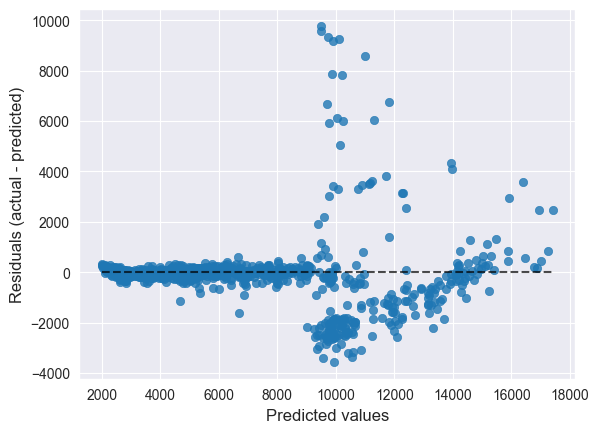

In [74]:
y_pred_xgb_tuned = bayes_search_xgb.predict(X_test)
PredictionErrorDisplay(y_true=y_test, y_pred=y_pred_xgb_tuned).plot();

> There might be quite problem for the model to predict CLV around 9,000 to 15,000 as shown from the graph above, they tend to move away from the zero line of error. The most error itself centered around CLV 10,000.

In [76]:
bayes_search_xgb.best_estimator_[-1]

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.024328630382726313,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=356, n_jobs=-1,
             num_parallel_tree=None, random_state=233, ...)

In [77]:
# model properties

importance_table = pd.DataFrame({
    'imp': bayes_search_xgb.best_estimator_[-1].feature_importances_
}, index = features_selected)

importance_table.sort_values(by='imp', ascending=False)

imp
Number of Policies              0.696205
Monthly Premium Auto            0.220222
Income                          0.017947
EmploymentStatus_Employed       0.013250
Vehicle Class_Two-Door Car      0.009918
Total Claim Amount              0.008887
Education                       0.008722
Marital Status_Single           0.007837
Marital Status_Married          0.007597
EmploymentStatus_Medical Leave  0.007014
EmploymentStatus_Unemployed     0.002401

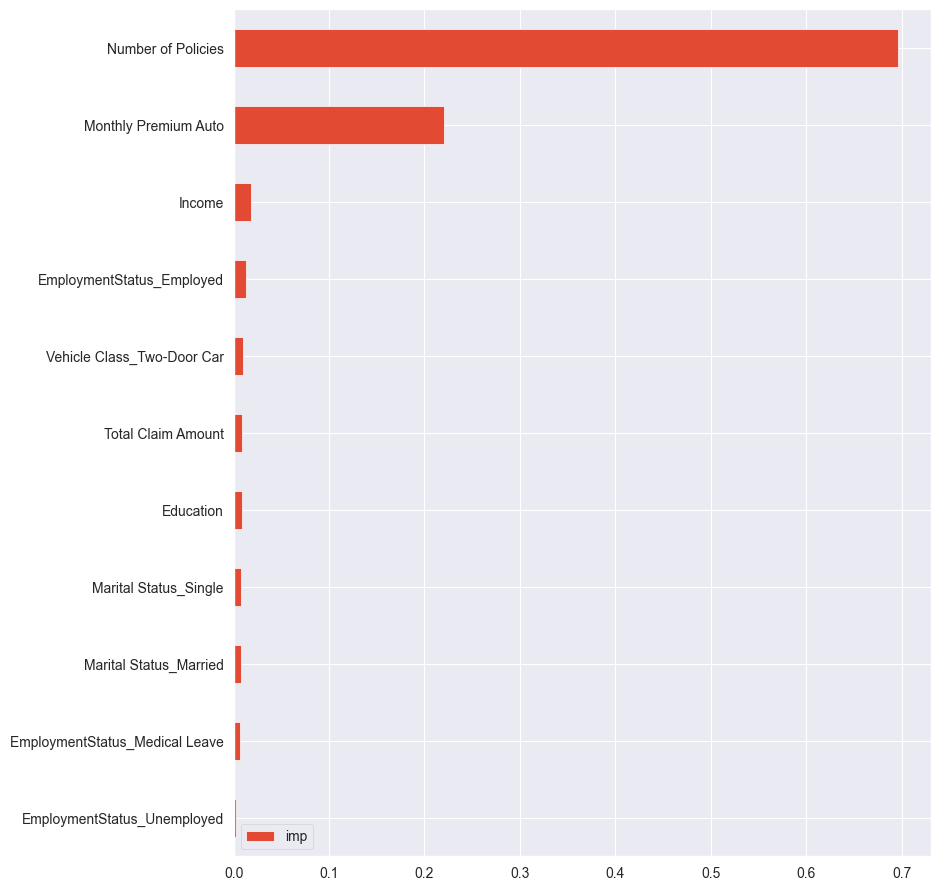

In [78]:
importance_table.sort_values(by='imp').plot(kind='barh', figsize=(9,11));

### Decision Tree

In [120]:
# Define the parameter grid for RandomizedSearchCV
param_spaces_dt = {
    'dtree_regressor__max_features': ['auto', 'sqrt', 'log2', None],   # Number of features to consider at every split
    'dtree_regressor__max_depth': np.arange(1, 111, 10).tolist() + [None],  # Maximum depth of the tree
    'dtree_regressor__min_samples_split': np.arange(2, 11, 2),   # Minimum number of samples required to split a node
    'dtree_regressor__min_samples_leaf': np.arange(1, 11, 2),    # Minimum number of samples required at each leaf node
    'dtree_regressor__max_leaf_nodes': np.arange(1, 21).tolist() + [None]                  # Whether bootstrap samples are used when building trees
}

# Define parameter space for Bayesian optimization
param_spaces_dt = {
    'dtree_regressor__max_features': ['sqrt', 'log2'],
    'dtree_regressor__max_depth': Integer(1, 111),
    'dtree_regressor__min_samples_split': Integer(2, 20),
    'dtree_regressor__min_samples_leaf': Integer(1, 20),
    'dtree_regressor__max_leaf_nodes': Integer(2, 21)
}

kfold_cv = KFold(n_splits = 5, shuffle = True, random_state = RANDOM_STATE)

pipe_dt = Pipeline(steps=[
        ('transformer', transformer),
        ('dtree_regressor', DecisionTreeRegressor(criterion = 'absolute_error', random_state = RANDOM_STATE))
    ])

# Initialize RandomizedSearchCV with the parameter grid
random_search_dt = RandomizedSearchCV(
    estimator = pipe_dt,
    param_distributions = param_spaces_dt,
    n_iter = 25,
    scoring = adjusted_r2,
    cv = kfold_cv,
    random_state = RANDOM_STATE
)

# Initialize BayesSearchCV
bayes_search_dt = BayesSearchCV(
    estimator = pipe_dt,
    search_spaces = param_spaces_dt,
    n_iter = 50,
    scoring = adjusted_r2,
    cv = kfold_cv,
    random_state = RANDOM_STATE
)

# Fit RandomizedSearchCV to the training data
bayes_search_dt.fit(X_train, y_train)

BayesSearchCV(cv=KFold(n_splits=5, random_state=233, shuffle=True),
              estimator=Pipeline(steps=[('transformer',
                                         ColumnTransformer(transformers=[('onehot_encoding',
                                                                          OneHotEncoder(drop='first',
                                                                                        dtype=<class 'int'>),
                                                                          ['Vehicle '
                                                                           'Class',
                                                                           'EmploymentStatus',
                                                                           'Marital '
                                                                           'Status']),
                                                                         ('ordinal_encoding',
                                                                          OrdinalEncoder(categories=[['High '
                                                                                                      'School '
                                                                                                      'or '
                                                                                                      'Below',
                                                                                                      'College',
                                                                                                      'Bach...
              search_spaces={'dtree_regressor__max_depth': Integer(low=1, high=111, prior='uniform', transform='normalize'),
                             'dtree_regressor__max_features': ['sqrt', 'log2'],
                             'dtree_regressor__max_leaf_nodes': Integer(low=2, high=21, prior='uniform', transform='normalize'),
                             'dtree_regressor__min_samples_leaf': Integer(low=1, high=20, prior='uniform', transform='normalize'),
                             'dtree_regressor__min_samples_split': Integer(low=2, high=20, prior='uniform', transform='normalize')})

In [90]:
# best score
print(f'Best Adjusted R2 Score in Train-Val : {random_search_dt.best_score_ * 100:.3f}')
# best n_neighbors
print(f'BEST Params in Train-Val : {random_search_dt.best_params_}')

Best Adjusted R2 Score in Train-Val : 89.341
BEST Params in Train-Val : {'dtree_regressor__min_samples_split': 8, 'dtree_regressor__min_samples_leaf': 7, 'dtree_regressor__max_leaf_nodes': None, 'dtree_regressor__max_features': None, 'dtree_regressor__max_depth': 91}


In [44]:
# best score
print(f'Best Adjusted R2 Score in Train-Val : {bayes_search_dt.best_score_ * 100:.3f}')
# best n_neighbors
print(f'BEST Params in Train-Val : {bayes_search_dt.best_params_}')

Best Adjusted R2 Score in Train-Val : 57.359
BEST Params in Train-Val : OrderedDict({'dtree_regressor__max_depth': 74, 'dtree_regressor__max_features': 'sqrt', 'dtree_regressor__max_leaf_nodes': 21, 'dtree_regressor__min_samples_leaf': 9, 'dtree_regressor__min_samples_split': 17})


In [121]:
# best score
print(f'Best Adjusted R2 Score in Train-Val : {bayes_search_dt.best_score_ * 100:.3f}')
# best n_neighbors
print(f'BEST Params in Train-Val : {bayes_search_dt.best_params_}')

Best Adjusted R2 Score in Train-Val : 40.008
BEST Params in Train-Val : OrderedDict({'dtree_regressor__max_depth': 110, 'dtree_regressor__max_features': 'log2', 'dtree_regressor__max_leaf_nodes': 21, 'dtree_regressor__min_samples_leaf': 10, 'dtree_regressor__min_samples_split': 14})


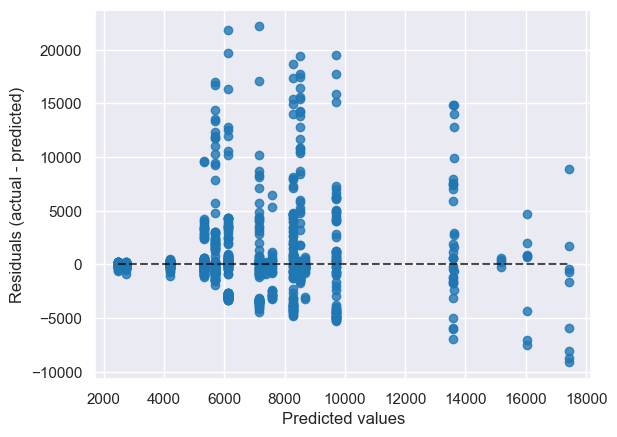

In [122]:
y_pred_dt_tuned = bayes_search_dt.predict(X_test)
PredictionErrorDisplay(y_true=y_test, y_pred=y_pred_dt_tuned).plot();

In [123]:
# model properties

importance_table = pd.DataFrame({
    'imp': bayes_search_dt.best_estimator_[1].feature_importances_
}, index = transform_results_df.columns)

importance_table.sort_values(by='imp', ascending=False)

imp
Number of Policies              0.518103
Monthly Premium Auto            0.136411
Total Claim Amount              0.095195
Coverage                        0.080536
Vehicle Class_SUV               0.056930
Vehicle Class_Luxury SUV        0.037350
Vehicle Class_Luxury Car        0.031139
Vehicle Class_Two-Door Car      0.027008
Vehicle Class_Sports Car        0.008785
EmploymentStatus_Unemployed     0.008544
Marital Status_Single           0.000000
Education                       0.000000
Marital Status_Married          0.000000
EmploymentStatus_Retired        0.000000
EmploymentStatus_Medical Leave  0.000000
EmploymentStatus_Employed       0.000000
Income                          0.000000

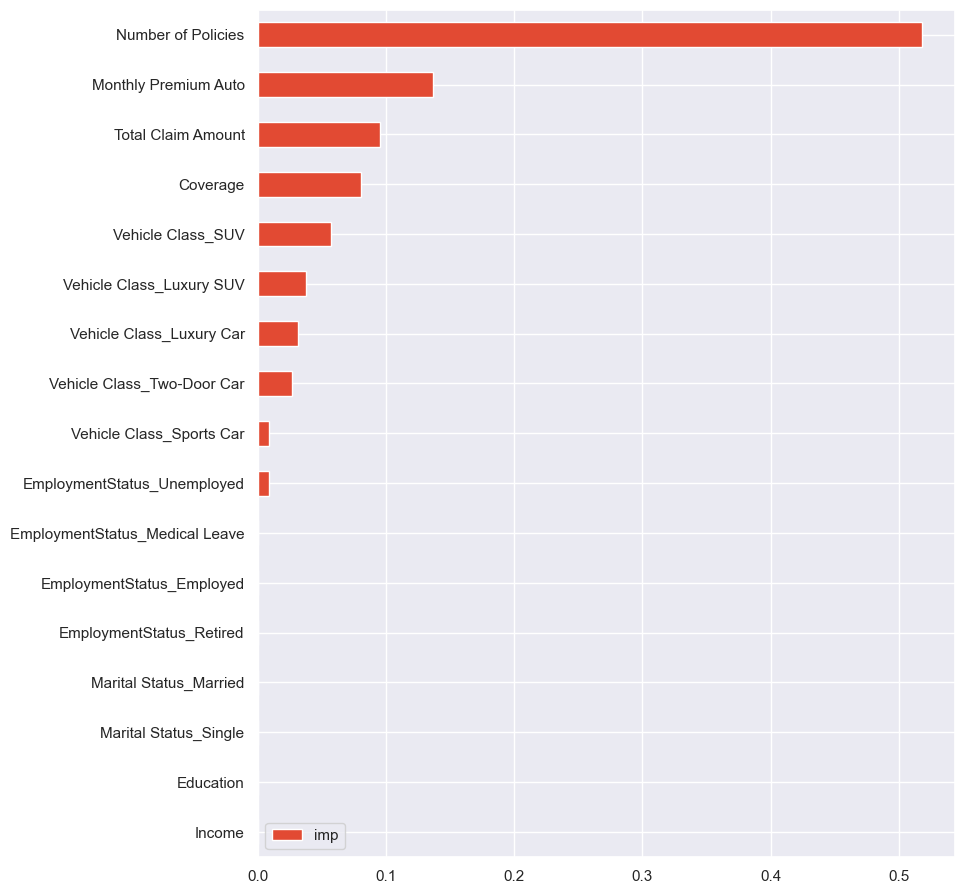

In [124]:
importance_table.sort_values(by='imp').plot(kind='barh', figsize=(9,11));

## Comparison Tuned vs NOT

In [390]:
# two models to compare before vs after
models_to_compare = {
    'XGBoost Default': XGBRegressor(random_state = RANDOM_STATE, n_jobs = -1),
    'XGBoost after Tuning': bayes_search_xgb.best_estimator_,
    'LightGBM Default GDBT': LGBMRegressor(random_state = RANDOM_STATE, n_jobs = -1, force_col_wise = True),
    'LightGBM Default Dart': LGBMRegressor(boosting_type = 'dart', random_state = RANDOM_STATE, n_jobs = -1, force_col_wise = True),
    'LightGBM after Tuning': bayes_search_lgbm.best_estimator_
}

# define the fold for cross validation
kfold_cv = KFold(n_splits = 5, shuffle=True, random_state = RANDOM_STATE)
# skfold = StratifiedKFold(n_splits = 5, random_state = RANDOM_STATE)

def get_model_size(model):
    """Return the size of the model in bytes."""
    return sys.getsizeof(pickle.dumps(model))

# model benchmarking
dropped_cols = [
    'EmploymentStatus_Retired', 'EmploymentStatus_Medical Leave',
    'EmploymentStatus_Unemployed','Vehicle Class_Luxury Car',
    'Marital Status_Single']

# define an evaluation metric - TRAIN, VAL Data
adjusted_r2_cross_mean, mape_cross_mean = [], []
adjusted_r2_cross_std, mape_cross_std = [], []
adjusted_r2_cross_all, mape_cross_all = [], []
fit_cross_time, test_score_time = [], []
cross_val_time = []
model_train_name = []

# looping for performance
for name, model in models_to_compare.items():
    if 'Default' in name:
        pipeline_model = Pipeline(steps=[
            ('transformer', transformer_tree),
            ('selector', ColumnSelector(columns = features_selected)),
            ('regressor', model)
        ])
    elif 'after' in name:
        pipeline_model = model

    start_time_cross = time.time()
    # find the best model - train cross val
    model_cv = cross_validate(
        pipeline_model,
        X_train,
        # transform_X_train_df.drop(columns=dropped_cols),
        y_train,
        cv = kfold_cv,
        # scoring = 'r2',
        scoring = {
            'adjusted_r2': adjusted_r2,
            # 'mean_absolute_percentage_error': make_scorer(mean_absolute_percentage_error, greater_is_better=False),
            'mean_absolute_percentage_error': 'neg_mean_absolute_percentage_error'
        },
        error_score = 'raise'
    )
    end_time_cross = time.time()
    execution_time_cross = end_time_cross - start_time_cross

    adjusted_r2_cross_mean.append(model_cv['test_adjusted_r2'].mean())
    adjusted_r2_cross_std.append(model_cv['test_adjusted_r2'].std())
    # metrics_cross_all.append(model_cv.round(4))

    mape_cross_mean.append(model_cv['test_mean_absolute_percentage_error'].mean())
    mape_cross_std.append(model_cv['test_mean_absolute_percentage_error'].std())


    fit_cross_time.append(model_cv['fit_time'])
    test_score_time.append(model_cv['score_time'])
    cross_val_time.append(execution_time_cross)
    # model_train_name.append(pipeline_model[1].__class__.__name__)
    model_train_name.append(name)
    # model_train_name.append(model.__class__.__name__)

# On Test Data (Score)
# evaluation
adjusted_r2_test_score_list, mape_test_score_list = [], []
model_test_name = []
model_test_size = []
predict_time = []

# On Test Data (Score)
for name, model in models_to_compare.items():
    if 'Default' in name:
        pipeline_model = Pipeline(steps=[
            ('transformer', transformer_tree),
            ('selector', ColumnSelector(columns = features_selected)),
            ('regressor', model)
        ])
    elif 'after' in name:
        pipeline_model = model

    start_time_test = time.time()
    # fitting
    pipeline_model.fit(X_train, y_train)
    # model.fit(transform_X_train_df.drop(columns=dropped_cols), y_train)

    # Measure the model size
    model_size = get_model_size(pipeline_model)
    model_test_size.append(model_size)

    # model predict
    y_pred_test = pipeline_model.predict(X_test)
    # y_pred_test = model.predict(transform_X_test_df.drop(columns=dropped_cols))

    end_time_test = time.time()
    execution_time_test = end_time_test - start_time_test

    # evaluate
    adjusted_r2_test_score = adjusted_r2_score(y_test, y_pred_test, X_test)
    adjusted_r2_test_score_list.append(adjusted_r2_test_score)

    mape_test_score = mean_absolute_percentage_error(y_test, y_pred_test)
    mape_test_score_list.append(mape_test_score)

    predict_time.append(execution_time_test)
    # model_test_name.append(pipeline_model[1].__class__.__name__)
    model_test_name.append(name)
        # model_test_name.append(model.__class__.__name__)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 653
[LightGBM] [Info] Number of data points in the train set: 3025, number of used features: 11
[LightGBM] [Info] Start training from score 6622.958973
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 652
[LightGBM] [Info] Number of data points in the train set: 3025, number of used features: 11
[LightGBM] [Info] Start training from score 6633.824860
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 654
[LightGBM] [Info] Number of data points in the train set: 3026, number of used features: 11
[LightGBM] [Info] Start training from score 6675.410609
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Total Bins 654
[LightGBM] [Info] Number of data points in the train set: 3026, number of used features: 11
[LightGBM] [

### The Result Tuned vs NOT

In [355]:
# show the output
r2_val_rounded = np.array([round(i * 100, 2) for i in adjusted_r2_cross_mean])
r2_test_rounded = np.array([round(i * 100, 2) for i in adjusted_r2_test_score_list])
mape_val_rounded = np.array([round(abs(i) * 100, 2) for i in mape_cross_mean])
mape_test_rounded = np.array([round(i * 100, 2) for i in mape_test_score_list])
fit_time_total = np.array([np.sum(i) for i in fit_cross_time])
test_score_time_total = np.array([np.sum(i) for i in test_score_time])

# show the comparison results as dataframe
eval_results = pd.DataFrame({
    'Model Name': model_train_name,
    'Adjusted R2 Validation Mean (%)': r2_val_rounded,
    'Adjusted R2 Test Score (%)': r2_test_rounded,
    'Adjusted R2 Difference': r2_test_rounded - r2_val_rounded,
    'MAPE Validation Mean (%)': mape_val_rounded,
    'MAPE Test Score (%)': mape_test_rounded,
    'MAPE Difference': -(mape_test_rounded - mape_val_rounded),
    # 'std': adjusted_r2_cross_std,
    # 'all RMSE value': metrics_cross_all,
    # 'Model Test': model_test_name,
    # 'Computation Time (second)': cross_val_time,
    'Computation Time (second)': fit_time_total + test_score_time_total + np.array(predict_time),
    'Model Size (MB)': [round(i/1_000_000, 4) for i in model_test_size]
})

eval_results = eval_results.sort_values(by=['Adjusted R2 Test Score (%)', 'Adjusted R2 Difference'], ascending = [False, True], key=abs, ignore_index=True)
eval_results.index = np.array([str(i+1) + '} ' for i in eval_results.index]) + eval_results['Model Name']
eval_results.iloc[:, 1:]

Adjusted R2 Validation Mean (%)  \
Model Name                                                  
1} XGBoost after Tuning                             85.78   
2} LightGBM after Tuning                            85.42   
3} LightGBM Default GDBT                            83.24   
4} XGBoost Default                                  81.25   
5} LightGBM Default Dart                            75.50   

                          Adjusted R2 Test Score (%)  Adjusted R2 Difference  \
Model Name                                                                     
1} XGBoost after Tuning                        87.11                    1.33   
2} LightGBM after Tuning                       86.84                    1.42   
3} LightGBM Default GDBT                       86.08                    2.84   
4} XGBoost Default                             85.93                    4.68   
5} LightGBM Default Dart                       79.06                    3.56   

                          MAPE Validation Mean (%)  MAPE Test Score (%)  \
Model Name                                                                
1} XGBoost after Tuning                       7.03                 6.89   
2} LightGBM after Tuning                      6.41                 6.31   
3} LightGBM Default GDBT                      7.52                 6.92   
4} XGBoost Default                           10.53                 9.09   
5} LightGBM Default Dart                     18.13                17.58   

                          MAPE Difference  Computation Time (second)  \
Model Name                                                             
1} XGBoost after Tuning              0.14                   1.828853   
2} LightGBM after Tuning             0.10                   0.754770   
3} LightGBM Default GDBT             0.60                   0.933001   
4} XGBoost Default                   1.44                   2.059043   
5} LightGBM Default Dart             0.55                   1.202206   

                          Model Size (MB)  
Model Name                                 
1} XGBoost after Tuning            0.4645  
2} LightGBM after Tuning           0.1035  
3} LightGBM Default GDBT           0.2850  
4} XGBoost Default                 0.4241  
5} LightGBM Default Dart           0.2846

In [391]:
# show the output
r2_val_rounded = np.array([round(i * 100, 2) for i in adjusted_r2_cross_mean])
r2_test_rounded = np.array([round(i * 100, 2) for i in adjusted_r2_test_score_list])
mape_val_rounded = np.array([round(abs(i) * 100, 2) for i in mape_cross_mean])
mape_test_rounded = np.array([round(i * 100, 2) for i in mape_test_score_list])
fit_time_total = np.array([np.sum(i) for i in fit_cross_time])
test_score_time_total = np.array([np.sum(i) for i in test_score_time])

# show the comparison results as dataframe
eval_results = pd.DataFrame({
    'Model Name': model_train_name,
    'Adjusted R2 Validation Mean (%)': r2_val_rounded,
    'Adjusted R2 Test Score (%)': r2_test_rounded,
    'Adjusted R2 Difference': r2_test_rounded - r2_val_rounded,
    'MAPE Validation Mean (%)': mape_val_rounded,
    'MAPE Test Score (%)': mape_test_rounded,
    'MAPE Difference': -(mape_test_rounded - mape_val_rounded),
    # 'std': adjusted_r2_cross_std,
    # 'all RMSE value': metrics_cross_all,
    # 'Model Test': model_test_name,
    # 'Computation Time (second)': cross_val_time,
    'Computation Time (second)': fit_time_total + test_score_time_total + np.array(predict_time),
    'Model Size (MB)': [round(i/1_000_000, 4) for i in model_test_size]
})

eval_results = eval_results.sort_values(by=['Adjusted R2 Test Score (%)', 'Adjusted R2 Difference'], ascending = [False, True], key=abs, ignore_index=True)
eval_results.index = np.array([str(i+1) + '} ' for i in eval_results.index]) + eval_results['Model Name']
eval_results.iloc[:, 1:]

Adjusted R2 Validation Mean (%)  \
Model Name                                                  
1} XGBoost after Tuning                             85.76   
2} LightGBM after Tuning                            85.15   
3} LightGBM Default GDBT                            83.17   
4} XGBoost Default                                  81.12   
5} LightGBM Default Dart                            75.52   

                          Adjusted R2 Test Score (%)  Adjusted R2 Difference  \
Model Name                                                                     
1} XGBoost after Tuning                        87.16                    1.40   
2} LightGBM after Tuning                       86.69                    1.54   
3} LightGBM Default GDBT                       86.07                    2.90   
4} XGBoost Default                             85.70                    4.58   
5} LightGBM Default Dart                       78.90                    3.38   

                          MAPE Validation Mean (%)  MAPE Test Score (%)  \
Model Name                                                                
1} XGBoost after Tuning                       7.13                 7.01   
2} LightGBM after Tuning                      6.66                 6.53   
3} LightGBM Default GDBT                      7.51                 6.95   
4} XGBoost Default                           10.38                 9.52   
5} LightGBM Default Dart                     18.16                17.64   

                          MAPE Difference  Computation Time (second)  \
Model Name                                                             
1} XGBoost after Tuning              0.12                   1.188998   
2} LightGBM after Tuning             0.13                   0.786999   
3} LightGBM Default GDBT             0.56                   0.879073   
4} XGBoost Default                   0.86                   1.331086   
5} LightGBM Default Dart             0.52                   1.157083   

                          Model Size (MB)  
Model Name                                 
1} XGBoost after Tuning            0.2794  
2} LightGBM after Tuning           0.2045  
3} LightGBM Default GDBT           0.2829  
4} XGBoost Default                 0.4283  
5} LightGBM Default Dart           0.2825

> Model XGBoost Regressor Choosen as our best model with its best parameters.

### Save The Best Model

In [82]:
# the best model is XGBoost after tuning
# best_model_regression = bayes_search_xgb.best_estimator_.named_steps['xgboost_regressor']
best_model_regression = bayes_search_xgb.best_estimator_

model_filepath = 'models'
today_date = time.strftime('%Y%m%d%H%M%S')
model_filename = f'best_model_clv_xgb_{today_date}'

# sav format
with open(f'{model_filepath}/{model_filename}.sav', 'wb') as wtm:
    pickle.dump(best_model_regression, wtm)

# pkl format
with open(f'{model_filepath}/{model_filename}.pkl', 'wb') as wtm:
    pickle.dump(best_model_regression, wtm)

In [89]:
# check either the models saved successfully or not!
# !dir models

name_model = 'best_model_clv_xgb_20240715003424.sav'
 
# Check whether the specified
# path exists or not
isExist = os.path.exists(f'models/{name_model}')
print(isExist)

True


# 9. Explain of The Best Model on Data Prediction

In [90]:
# the best model for this case
best_model_param = bayes_search_xgb.best_estimator_.named_steps['xgboost_regressor']
best_model_regression = bayes_search_xgb.best_estimator_
best_model_regression

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('nominal_preprocess',
                                                  Pipeline(steps=[('imputer_mode',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='most_frequent')),
                                                                  ('onehot_encoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype=<class 'int'>))]),
                                                  ['Vehicle Class',
                                                   'EmploymentStatus',
                                                   'Marital Status']),
                                                 ('ordinal_preprocess',
                                                  Pipeline(steps=[('imputer_mod...
                              feature_types=None, gamma=0.0, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None,
                              learning_rate=0.024328630382726313, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=356, n_jobs=-1,
                              num_parallel_tree=None, random_state=233, ...))])

In [405]:
num_inverse_X_train_df = transform_X_train_df.copy()
num_inverse_X_test_df = transform_X_test_df.copy()

num_inverse_X_train_df[
    ['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income']
    ] = transformer['numerical_preprocess'].inverse_transform(num_inverse_X_train_df[
    ['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income']
    ])

num_inverse_X_test_df[
    ['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income']
    ] = transformer['numerical_preprocess'].inverse_transform(num_inverse_X_test_df[
    ['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income']
    ])

In [92]:
# # Use SHAP to explain the model predictions (before scaled)
# explainer_ori = shap.TreeExplainer(best_model_regression, num_inverse_X_train_df)
# shap_values_ori = explainer(num_inverse_X_test_df)

# Use SHAP to explain the model predictions (after scaled)
explainer = shap.TreeExplainer(best_model_param, transform_X_train_tree_df)
shap_values = explainer(transform_X_test_tree_df)

# # Use SHAP to explain the model predictions (after scaled)
# explainer = shap.TreeExplainer(best_model_regression, X_train)
# shap_values = explainer(X_test)

## General Shap Meaning

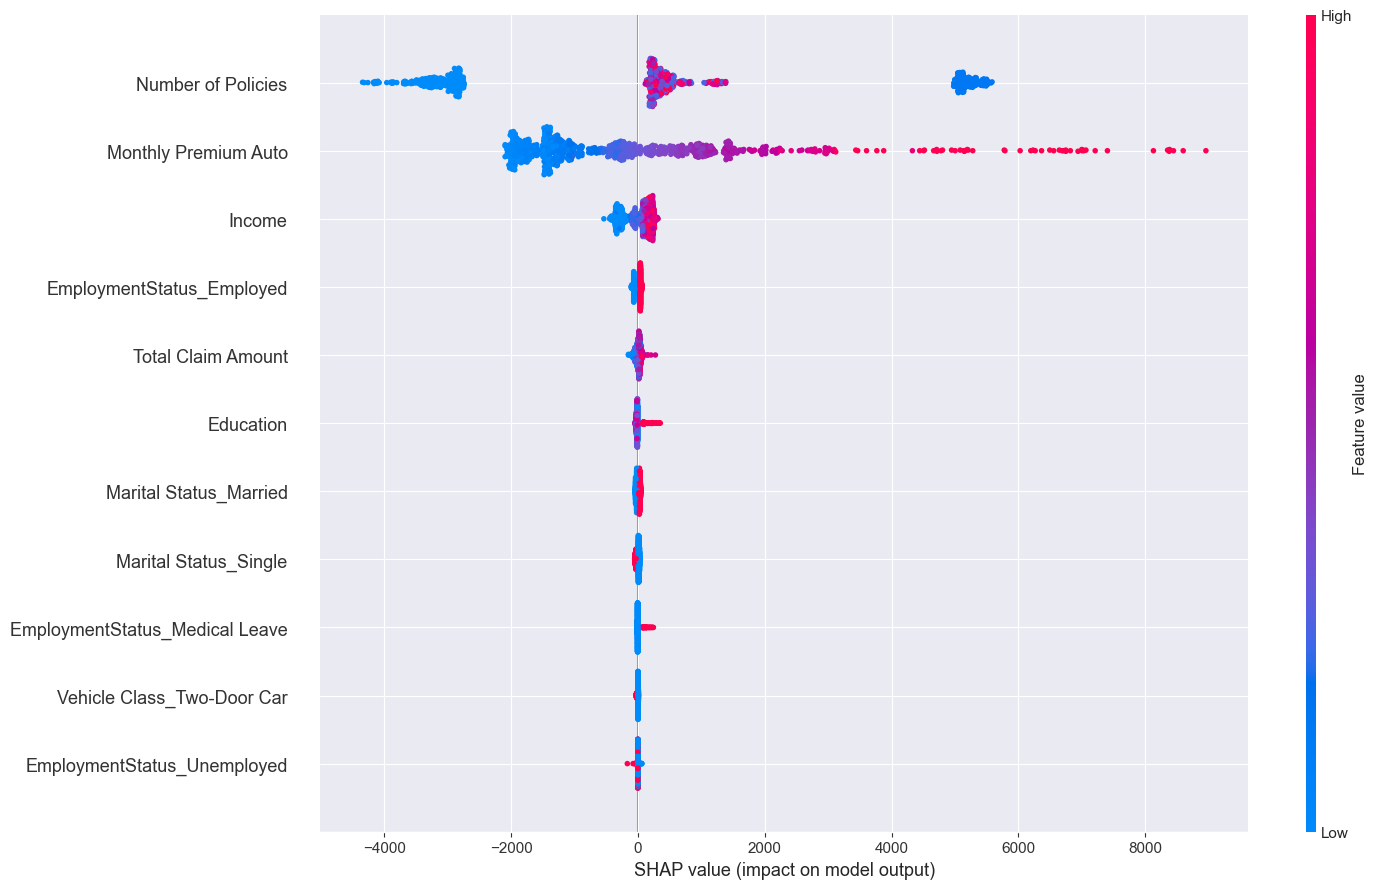

In [93]:
# Plot feature importance
shap.summary_plot(shap_values, transform_X_test_tree_df, plot_size=[15,9])

**Top Features:**

* Number of Policies: This feature shows a wide range of SHAP values, with many blue dots on the left (negative impact) and red dots on the right (positive impact). This suggests that having more policies can both significantly decrease and increase customer lifetime value depending on other factors.

* Monthly Premium Auto: This feature also has a broad range of SHAP values, indicating a significant impact on the model's prediction. Higher values (red) generally increase the prediction, while lower values (blue) tend to decrease it.

* Income: This feature has a mix of positive and negative impacts on the prediction. Higher incomes (red) tend to increase customer lifetime value, while lower incomes (blue) have a negative impact.

In [94]:
shap.force_plot(shap_values, transform_X_test_tree_df)

In [106]:
transform_X_test_tree_df[transform_X_test_tree_df['Number of Policies'] == 2]

EmploymentStatus_Unemployed  Monthly Premium Auto  Number of Policies  \
0                            1.0                  68.0                 2.0   
17                           0.0                  72.0                 2.0   
25                           1.0                  66.0                 2.0   
26                           0.0                  63.0                 2.0   
32                           0.0                  69.0                 2.0   
..                           ...                   ...                 ...   
925                          0.0                  69.0                 2.0   
929                          0.0                 101.0                 2.0   
931                          1.0                  74.0                 2.0   
933                          1.0                 119.0                 2.0   
945                          0.0                 112.0                 2.0   

     Education  Marital Status_Single  Marital Status_Married  \
0          2.0                    1.0                     0.0   
17         2.0                    0.0                     1.0   
25         1.0                    1.0                     0.0   
26         1.0                    0.0                     1.0   
32         0.0                    0.0                     0.0   
..         ...                    ...                     ...   
925        0.0                    0.0                     1.0   
929        0.0                    0.0                     0.0   
931        2.0                    0.0                     1.0   
933        1.0                    1.0                     0.0   
945        1.0                    0.0                     1.0   

     Total Claim Amount   Income  EmploymentStatus_Medical Leave  \
0            489.600000      0.0                             0.0   
17            68.179721  63110.0                             0.0   
25           316.800000      0.0                             0.0   
26           205.957043  93004.0                             0.0   
32           331.200000  23671.0                             0.0   
..                  ...      ...                             ...   
925          173.956072  36014.0                             0.0   
929          523.815839  20228.0                             0.0   
931          246.489123      0.0                             0.0   
933          856.800000      0.0                             0.0   
945          537.600000  69693.0                             0.0   

     EmploymentStatus_Employed  Vehicle Class_Two-Door Car  
0                          0.0                         1.0  
17                         1.0                         0.0  
25                         0.0                         0.0  
26                         1.0                         0.0  
32                         1.0                         0.0  
..                         ...                         ...  
925                        1.0                         0.0  
929                        0.0                         0.0  
931                        0.0                         0.0  
933                        0.0                         0.0  
945                        1.0                         0.0  

[192 rows x 11 columns]

In [104]:
row_position = 17

real_test_peek_no_scaled = pd.Series(
    transform_X_test_tree_df.iloc[row_position]
).T

real_test_peek_no_scaled['True CLV Value'] = y_test.iloc[row_position]
real_test_peek_no_scaled.T

EmploymentStatus_Unemployed           0.000000
Monthly Premium Auto                 72.000000
Number of Policies                    2.000000
Education                             2.000000
Marital Status_Single                 0.000000
Marital Status_Married                1.000000
Total Claim Amount                   68.179721
Income                            63110.000000
EmploymentStatus_Medical Leave        0.000000
EmploymentStatus_Employed             1.000000
Vehicle Class_Two-Door Car            0.000000
True CLV Value                     8590.334983
Name: 17, dtype: float64

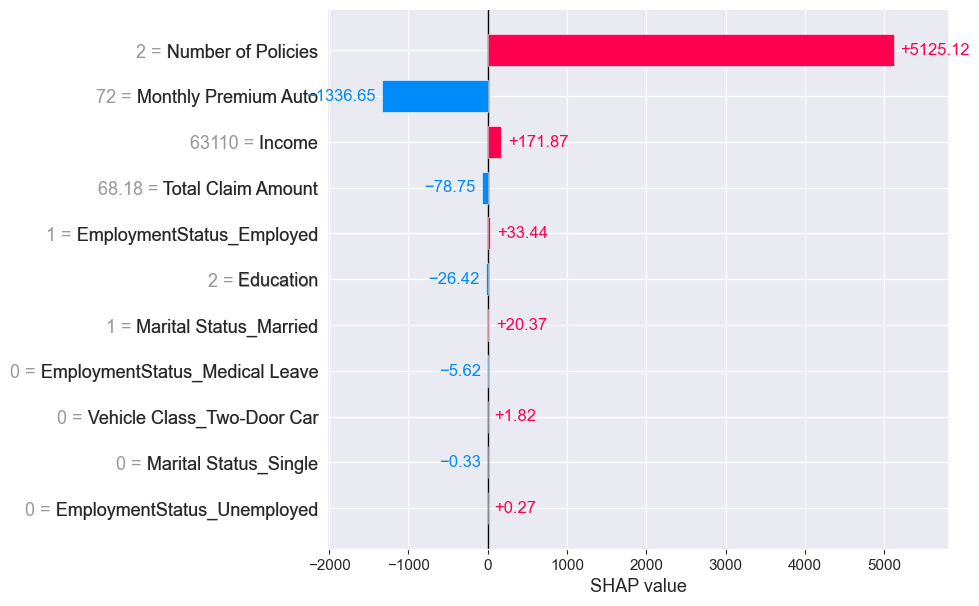

In [107]:
shap.plots.bar(shap_values[17], max_display=19)

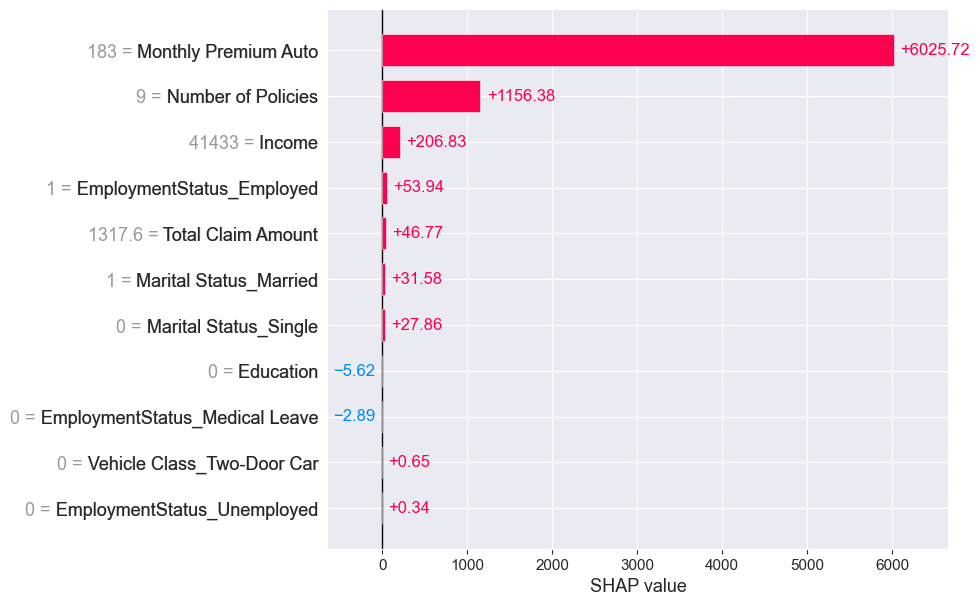

In [108]:
# shap.plots.bar(shap_values_ori[14], max_display=19)
shap.plots.bar(shap_values[99], max_display=19)

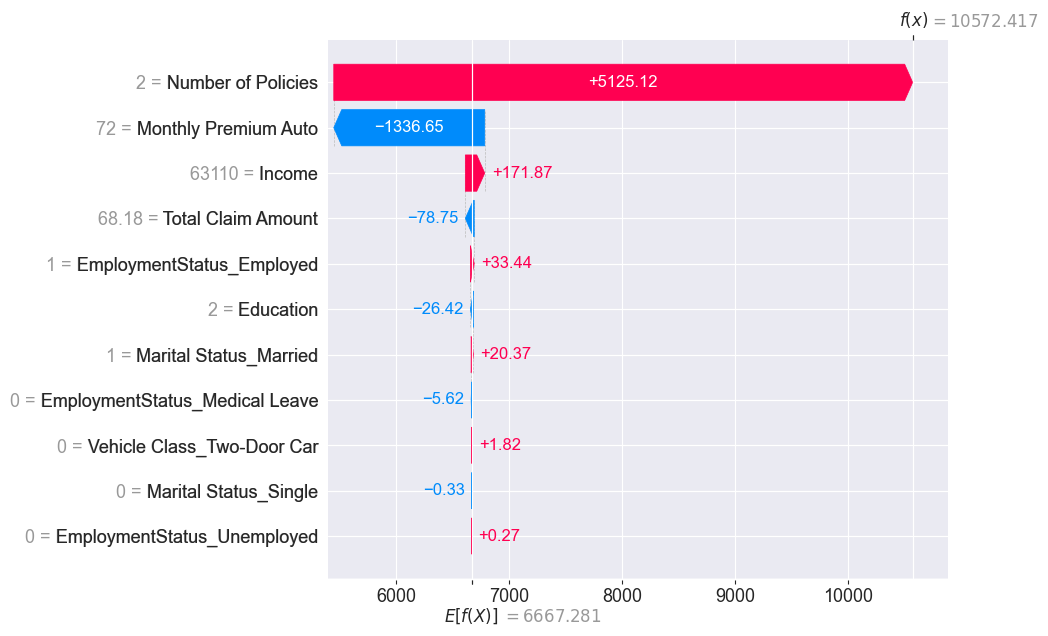

In [109]:
shap.plots.waterfall(shap_values[17], max_display=19)

In [112]:
y_pred_xgb_tuned[17], y_pred_xgb_tuned[99]

(10572.411, 14208.819)

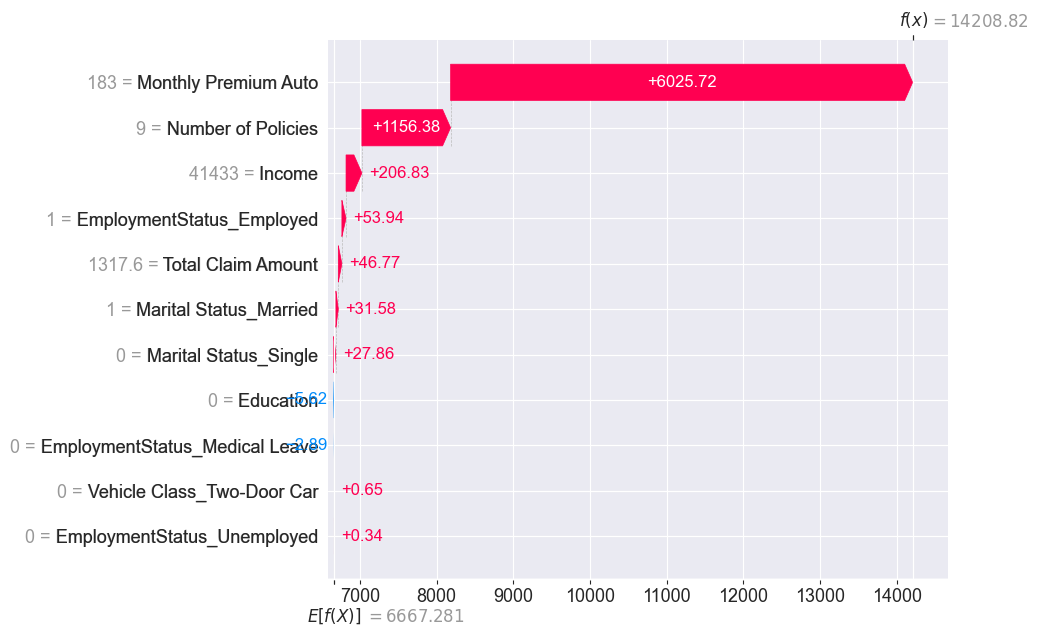

In [111]:
shap.plots.waterfall(shap_values[99], max_display=19)

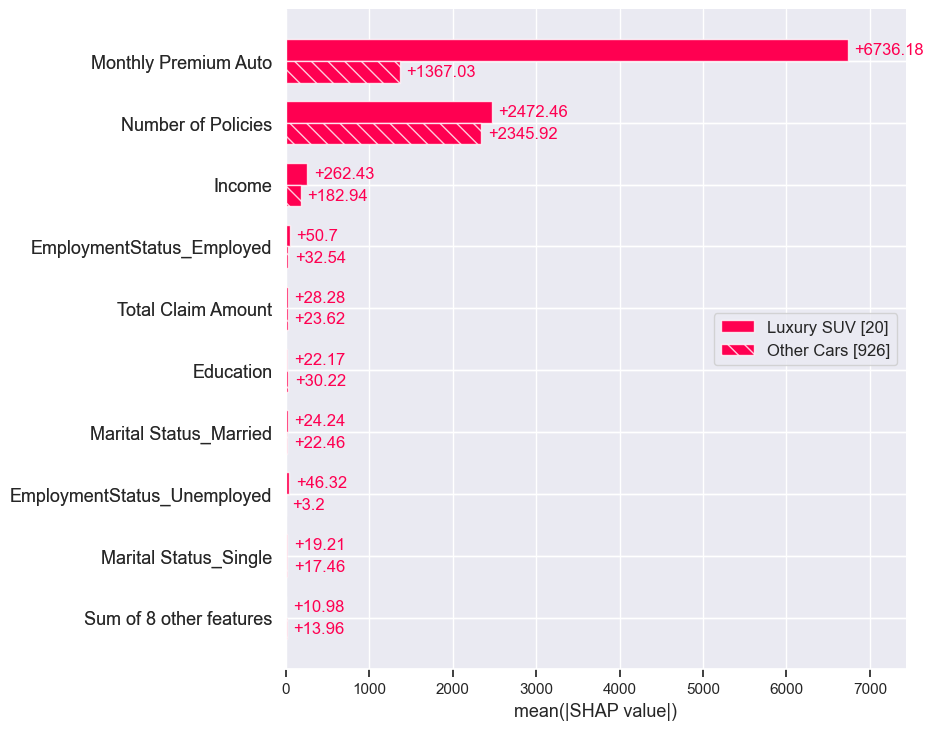

In [236]:
vhc_lux = ["Other Cars" if shap_values[i, "Vehicle Class_Luxury SUV"].data == 0 else "Luxury SUV" for i in range(shap_values.shape[0])]
shap.plots.bar(shap_values.cohorts(vhc_lux).abs.mean(0))

## Insights on the Relation of Features to the Target

So

In [424]:
transform_X_test_tree_df.iloc[0]

EmploymentStatus_Unemployed         1.0
Monthly Premium Auto               68.0
Number of Policies                  2.0
Education                           2.0
Marital Status_Single               1.0
Marital Status_Married              0.0
Total Claim Amount                489.6
Income                              0.0
EmploymentStatus_Medical Leave      0.0
EmploymentStatus_Employed           0.0
Vehicle Class_Two-Door Car          1.0
Name: 0, dtype: float64

IndexError: index 0 is out of bounds for axis 0 with size 0

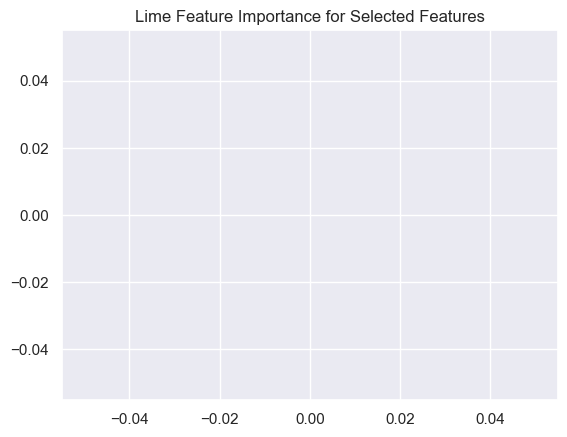

In [428]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
import lime
import lime.lime_tabular

# Assuming `model` is your trained regression model and `X` is your feature matrix
# Also assuming `X_train` and `y_train` are your training data
explainer = lime.lime_tabular.LimeTabularExplainer(transform_X_train_tree_df.values, mode='regression')

# Example features of interest
features_of_interest = ['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount']

# Selecting a single instance to explain (adjust as needed)
instance = transform_X_test_tree_df.iloc[2]

# Generating explanations for the instance
explanation = explainer.explain_instance(instance.values, best_model_regression.predict)

# Extracting feature importance from Lime explanation
lime_features = explanation.as_list()

# Creating a DataFrame from Lime features
lime_df = pd.DataFrame(lime_features, columns=['Feature', 'Importance'])

# Filtering to include only the features of interest
lime_df_filtered = lime_df[lime_df['Feature'].isin(features_of_interest)]

# Plotting the ordered Lime feature importance
lime_df_filtered.set_index('Feature')['Importance'].sort_values().plot(kind='barh', title='Lime Feature Importance for Selected Features')
plt.xlabel('Lime Feature Importance')
plt.ylabel('Feature')
plt.show()


# 10. New Real Data Example

In [113]:
bayes_search_xgb.best_estimator_.predict(X_test.iloc[45:47])

array([9436.23  , 3426.0251], dtype=float32)

In [47]:
new_test_data = pd.DataFrame({
    'Vehicle Class': ['Luxury SUV', 'Luxury Car'],
    'Coverage': ['Premium', 'Premium'],
    'Renew Offer Type': ['Offer3', 'Offer1'],
    'EmploymentStatus': ['Retired', 'Employed'],
    'Marital Status': ['Divorced', 'Single'],
    'Education': ['Master', 'College'],
    'Number of Policies': [5.0, 2.0],
    'Monthly Premium Auto': [10.0, 320.0],
    'Total Claim Amount': [10_000.0, 2_000.0],
    'Income': [50_000.00, 13_000.0]
})

new_test_data

Vehicle Class Coverage Renew Offer Type EmploymentStatus Marital Status  \
0    Luxury SUV  Premium           Offer3          Retired       Divorced   
1    Luxury Car  Premium           Offer1         Employed         Single   

  Education  Number of Policies  Monthly Premium Auto  Total Claim Amount  \
0    Master                 5.0                  10.0             10000.0   
1   College                 2.0                 320.0              2000.0   

    Income  
0  50000.0  
1  13000.0

In [114]:
bayes_search_xgb.best_estimator_.predict(new_test_data)

array([ 5473.4824, 18578.656 ], dtype=float32)

In [108]:
#merge two dataFrames and add indicator column
all_df = pd.merge(X_train, new_test_data, on=list(new_test_data.columns), how='left', indicator='exists')

#add column to show if each row in first DataFrame exists in second
all_df['exists'] = np.where(all_df.exists == 'both', 'exists', 'not exists')

#view updated DataFrame
all_df[all_df['exists'] == 'both']

Empty DataFrame
Columns: [Vehicle Class, Coverage, Renew Offer Type, EmploymentStatus, Marital Status, Education, Number of Policies, Monthly Premium Auto, Total Claim Amount, Income, exists]
Index: []

In [112]:
# new outlier test

y_pred_out = random_search_xgb.best_estimator_.predict(life_out.drop(columns='Customer Lifetime Value'))
print(adjusted_r2_score(life_out['Customer Lifetime Value'], y_pred_out, life_out.drop(columns='Customer Lifetime Value')))
print(mean_absolute_percentage_error(life_out['Customer Lifetime Value'], y_pred_out))

-1.8766994621247828
0.48531513575296864


## Upload to Google Cloud Storage

In [ ]:
#import google cloud library
from google.cloud import bigquery
from google.cloud import storage
from google.cloud import aiplatform

In [ ]:
## set up authentication using services account 
# Authenticate using service account
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "../vertex-ai-ml/sa-development.json"
# os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = "../vertex-ai-ml/dti-ds-31329ac0651d.json"

In [119]:
project_id = 'dti-ds'
dataset_id = 'difgam_dataset_035'
table_id = '..._dataset_difgam'
region = 'us-central1'
bucket_name = 'difgam_gcs_035'
blob_name = 'data/---.csv'

model_name = 'best_model_clv_xgb_20240715003424.sav'

In [ ]:
# Upload the model to Google Cloud Storage
try : 
    storage_client = storage.Client(project=project_id)
    bucket = storage_client.get_bucket(bucket_name) # Add bucket name
    blob_model = bucket.blob(f'model/{model_name}')
    blob_model.upload_from_filename(f'{model_name}')

    print ("Uploading model succeeded")
except:
    raise TypeError("An exception occurred")

## Retrieve from Google Cloud Storage

In [ ]:
# Retrieve the model to Google Cloud Storage
try : 
    storage_client = storage.Client(project=project_id)
    bucket = storage_client.get_bucket(bucket_name) # Add bucket name
    blob_model = bucket.blob(f'model/{model_name}')
    blob_model.download_to_filename('final_model_xgb.sav')

    print ("Read model succeeded")
except:
    raise TypeError("An exception occurred")

In [120]:
# local test
with open(f'models/{model_name}', 'rb') as f:
    loaded_model = pickle.load(f)
loaded_model

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('nominal_preprocess',
                                                  Pipeline(steps=[('imputer_mode',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='most_frequent')),
                                                                  ('onehot_encoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype=<class 'int'>))]),
                                                  ['Vehicle Class',
                                                   'EmploymentStatus',
                                                   'Marital Status']),
                                                 ('ordinal_preprocess',
                                                  Pipeline(steps=[('imputer_mod...
                              feature_types=None, gamma=0.0, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None,
                              learning_rate=0.024328630382726313, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=356, n_jobs=-1,
                              num_parallel_tree=None, random_state=233, ...))])

In [ ]:
# Load the model
with open('final_model_xgb.sav', 'rb') as f:
    loaded_model = pickle.load(f)

loaded_model.predict(new_test_data)

# loaded_model.predict([
#     [50_000, 1, 3, 1, 23, 131895, 132154, 129237],
#     [50_000, 0, 0, 1, 33, 1762, 881, 24842]
# ])

In [121]:
loaded_model.predict(new_test_data)

array([ 5473.4824, 18578.656 ], dtype=float32)

In [122]:
loaded_model.predict(X_test.iloc[3:13])

array([ 5000.517 ,  4823.208 ,  4986.2456,  5526.4106, 17419.64  ,
        4266.046 ,  2901.103 ,  9038.381 ,  4334.2217,  6653.623 ],
      dtype=float32)

# Summary 💎

## Model Selection and Performance

The chosen model for predicting CLV is a XGBoost Regressor, which has demonstrated promising results. The model achieved an R² score of 87.16% on the validation set and 85.76% on the test set. These scores indicate that the model explains a significant portion of the variance in the target variable (Customer Lifetime Value), showcasing its effectiveness in predicting CLV.

## Interpretation of the Decision Tree Regressor Model

- **R² Score Interpretation:**
  - **Validation Set (87.16%):** This high R² score means that 87.16% of the variance in Customer Lifetime Value for the validation set is explained by the model. It suggests that the model has been well-trained and is capable of making accurate predictions on unseen data.
  - **Test Set (85.76%):** The slightly lower R² score on the test set indicates that the model maintains good performance when applied to new, unseen data, with 85.76% of the variance in CLV being explained. This slight drop is typical and indicates that the model generalizes well.

- **Model Strengths:**
  - **Interpretability:** Decision trees are easy to interpret, allowing business stakeholders to understand the decision-making process and the factors influencing CLV predictions.
  - **Non-linearity:** The model can capture complex relationships between the features and the target variable, which is beneficial given the diverse and nuanced nature of luxury vehicle owners' behaviors and characteristics.

- **Model Limitations:**
  - **Overfitting Risk:** Decision trees can overfit the training data, especially if not properly pruned. Overfitting can lead to high variance and reduced performance on new data. Regular validation and pruning techniques are necessary to mitigate this risk.
  - **Data Sensitivity:** The model’s performance is highly dependent on the quality and quantity of the input data. Inconsistent or biased data can adversely affect predictions.

## Conclusion

The Decision Tree Regressor model has shown to be a robust tool for predicting Customer Lifetime Value for LuxeDrive Insurance’s luxury vehicle segments. With high R² scores on both validation and test sets, the model is well-suited for driving business decisions and strategies aimed at maximizing profitability and customer satisfaction. However, careful attention must be paid to potential overfitting and the inherent limitations of the model to ensure sustainable and reliable predictions.

# Recommendation

1. **Enhance Data Collection and Quality:**
   - **Specific:** Implement a comprehensive data collection framework that captures detailed information on customer demographics, vehicle details, and driving behavior.
   - **Measurable:** Aim to increase data completeness and accuracy by 20% within the next 6 months.
   - **Achievable:** Utilize automated data validation tools and integrate multiple data sources (e.g., telematics, customer surveys) to enrich the dataset.
   - **Impactful:** Improved data quality will lead to more accurate CLV predictions, enabling better-targeted marketing campaigns and personalized insurance products, ultimately increasing customer retention and profitability.

2. **Implement Targeted Marketing Campaigns:**
   - **Specific:** Develop and launch targeted marketing campaigns for high CLV customers in the luxury car, luxury SUV, and sports car segments.
   - **Measurable:** Increase the conversion rate of targeted campaigns by 15% over the next 12 months.
   - **Achievable:** Use the refined CLV model to identify and segment high-value customers and tailor marketing messages to their specific needs and preferences.
   - **Impactful:** Targeted campaigns will enhance customer acquisition and retention, driving higher revenues and market share in the luxury vehicle insurance segment.

3. **Personalize Insurance Products:**
   - **Specific:** Design and offer customized insurance packages tailored to the unique needs of luxury car, luxury SUV, and sports car owners.
   - **Measurable:** Achieve a 10% increase in the uptake of personalized insurance products within the next year.
   - **Achievable:** Use insights from the CLV model to identify key features and benefits valued by high CLV customers and incorporate them into new product offerings.
   - **Impactful:** Personalized products will improve customer satisfaction and loyalty, leading to longer customer lifetimes and increased profitability.

4. **Optimize Pricing Strategies:**
   - **Specific:** Develop dynamic pricing models that adjust premiums based on the predicted CLV and risk profiles of luxury vehicle owners.
   - **Measurable:** Increase overall premium revenue by 8% within 12 months through optimized pricing strategies.
   - **Achievable:** Leverage machine learning algorithms to analyze customer data and implement real-time pricing adjustments.
   - **Impactful:** Optimized pricing will attract and retain high-value customers, enhancing revenue and maintaining a competitive edge in the luxury vehicle insurance market.

5. **Improve Customer Service and Engagement:**
   - **Specific:** Enhance customer service by implementing a dedicated support team for high-value customers and introducing regular engagement initiatives.
   - **Measurable:** Increase customer satisfaction scores by 10% and reduce churn rate by 5% over the next year.
   - **Achievable:** Provide specialized training for support staff and use customer engagement tools (e.g., personalized communications, loyalty programs) to strengthen relationships.
   - **Impactful:** Superior customer service and engagement will foster stronger customer loyalty, reduce churn, and contribute to a more stable and profitable customer base.

By focusing on these specific, measurable, and achievable recommendations, LuxeDrive Insurance can significantly enhance its business operations and profitability while providing exceptional value to its high-end clientele.

---
<center>Thank You</center>

---